In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

## Data cleaning and formatting

In [37]:
import warnings
warnings.filterwarnings('ignore')

def to_iob(input_string):
    # Split the input string into words
    words = input_string.split()
    # Initialize a list to store the IOB tagged words
    iob_tags = []
    # Iterate through the words and generate IOB tags
    for word in words:
        if "@@" in word:
            iob_tags.append("B")
        elif "##" in word:
            iob_tags.append("I")
        else:
            iob_tags.append("O")
    return iob_tags



langs = ["en", "fr", "nl"]
dataframes = {}

for lang in langs:

    df = pd.read_csv(f"../results/prompt_results/{lang}_htfl_preds.csv")
    
    def transform_string(input_string):
        cleaned_string = str(input_string).replace("[", "").replace("]", "").replace("'", "").replace("\"", "")
        result_list = cleaned_string.split(", ")
        return result_list
    
    def split_on_space(input_string):
        #print(str(input_string))
        return input_string[0].split()
    
    total_len = len(df["words"])
    keys_string = ["words", f"{lang}_ann_output2", f"{lang}_nes_output2", "ann", "nes", f"{lang}_ann_output1", f"{lang}_nes_output1"]
    for key in keys_string:
        df[key] = df[key].apply(transform_string)
        if key in [f"{lang}_ann_output1", f"{lang}_nes_output1"]:
            for i in range(total_len):
                df[key][i] = df[key][i][0].split()
    df[f"{lang}_ann_output3"] = df[f"{lang}_ann_output3"].values.astype('str')
    df[f"{lang}_nes_output3"] = df[f"{lang}_nes_output3"].values.astype('str')
    df[f"{lang}_ann_output3_iob"] = df[f"{lang}_ann_output3"].apply(to_iob)
    df[f"{lang}_nes_output3_iob"] = df[f"{lang}_nes_output3"].apply(to_iob)
    
    print(f"The dataframe {lang} contains {total_len} entries.")
    dataframes[lang] = df


The dataframe en contains 2432 entries.
The dataframe fr contains 2177 entries.
The dataframe nl contains 2881 entries.


In [38]:
dataframes["en"].head()

words  \
0  [National, trends, in, patient, safety, for, f...   
1  [The, effects, of, more, than, a, decade, of, ...   
2  [This, study, used, the, Medicare, Patient, Sa...   
3  [The, analysis, included, a, large, study, sam...   
4  [The, results, show, a, significant, decline, ...   

                                                text  \
0  National trends in patient safety for four com...   
1  The effects of more than a decade of national ...   
2  This study used the Medicare Patient Safety Mo...   
3  The analysis included a large study sample wit...   
4  The results show a significant decline in adve...   

                                                 ann  \
0         [O, O, O, B, O, O, O, O, B, O, O, O, O, O]   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, B, O, ...   
2  [O, O, O, O, O, B, O, O, O, O, O, O, O, O, O, ...   
3   [O, O, O, O, O, O, O, O, O, O, O, B, O, O, B, O]   
4  [O, O, O, O, B, O, O, B, I, O, O, B, I, I, O, ...   

                                                 nes  difference  \
0         [O, O, O, B, O, O, O, O, B, O, O, O, O, O]           0   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, B, O, ...           0   
2  [O, O, O, O, B, I, I, I, I, O, B, O, O, O, O, ...           1   
3   [O, O, O, O, O, O, O, O, O, O, O, B, O, O, B, O]           0   
4  [O, O, O, O, B, O, O, B, I, O, O, B, I, I, O, ...           0   

                                      en_ann_output2  \
0  [National trends, patient safety, common condi...   
1         [decade, national efforts, patient safety]   
2  [study, Medicare Patient Safety Monitoring Sys...   
3  [analysis, large study sample, patients, hospi...   
4  [adverse event rates, acute myocardial infarct...   

                                      en_ann_output3  \
0  National trends in patient safety for four com...   
1  The effects of more than a decade of national ...   
2  This study used the Medicare Patient Safety Mo...   
3  The analysis included a large study sample wit...   
4  The results show a significant decline in adve...   

                                      en_ann_output1  \
0  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
1  [O, O, O, O, O, O, O, O, O, B, I, O, O, O, O, ...   
2  [O, O, O, B, I, I, I, I, I, O, O, O, O, O, B, ...   
3  [O, O, O, O, O, O, B, O, O, O, O, O, B, O, O, ...   
4  [O, O, O, O, O, O, O, O, O, O, B, O, O, O, O, ...   

                                      en_nes_output2  \
0  [National trends, patient safety, common condi...   
1  [effects, decade, national efforts, patient sa...   
2  [study, Medicare Patient Safety Monitoring Sys...   
3  [analysis, large study sample, 60,000 patients...   
4  [results, decline, adverse event rates, acute ...   

                                      en_nes_output3  \
0  National trends in patient safety for four com...   
1  The effects of more than a decade of national ...   
2  This study used the @@Medicare Patient Safety ...   
3  The analysis included a large study sample wit...   
4  The results show a significant decline in @@ad...   

                                      en_nes_output1  \
0            [O, O, O, O, B, O, O, O, B, O, O, O, O]   
1   [O, O, O, O, O, B, I, I, I, I, O, O, O, O, O, O]   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4  [B, O, O, O, O, O, O, O, O, O, O, I, I, I, O, ...   

                                  en_ann_output3_iob  \
0         [O, O, O, O, O, O, O, O, O, O, O, O, O, O]   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3   [O, O, O, O, O, O, O, O, O, O, O, B, O, O, B, O]   
4  [O, O, O, O, O, O, O, O, O, O, O, B, O, I, O, ...   

                                  en_nes_output3_iob  
0         [O, O, O, O, O, O, O, O, O, O, O, O, O, O]  
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
2  [O, O, O, O, B, O, O, O, O, I, O, O, O, O, O, ...  
3   [O, O, O, O, O, O, O, O, O, O, O, B, O, O, B

In [39]:
dataframes["fr"].head()

words  \
0  [Épidémiologie, et, impact, économique, de, l,...   
1  [L, épidémiologie, de, l, insuffisance, cardia...   
2  [Quelques, chiffres, français, importants, :, ...   
3  [L, incidence, passe, de, 4, ‰, chez, les, hom...   
4  [L, âge, moyen, de, survenue, de, l, insuffisa...   

                                                text  \
0  Épidémiologie et impact économique de l' insuf...   
1  L' épidémiologie de l' insuffisance cardiaque ...   
2  Quelques chiffres français importants : le nom...   
3  L' incidence passe de 4 ‰ chez les hommes et 3...   
4  L' âge moyen de survenue de l' insuffisance ca...   

                                                 ann  \
0                     [B, O, O, O, O, O, B, I, O, O]   
1  [O, B, O, O, B, I, O, O, O, O, O, O, O, O, O, ...   
2  [O, O, O, O, O, O, O, O, B, I, O, O, O, O, O, ...   
3  [O, B, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4  [O, O, O, O, O, O, O, B, I, O, O, O, O, O, O, ...   

                                                 nes  difference  \
0                     [B, O, O, O, O, O, B, I, O, B]           1   
1  [O, B, O, O, B, I, O, O, O, O, O, B, O, O, O, ...           1   
2  [O, O, O, O, O, O, O, O, B, I, O, O, O, O, O, ...           0   
3  [O, B, O, O, O, O, O, O, O, O, O, O, O, O, O, ...           0   
4  [O, O, O, O, O, O, O, B, I, O, O, O, O, O, O, ...           0   

                                      fr_ann_output2  \
0  [Épidémiologie, impact économique, insuffisanc...   
1  [épidémiologie, insuffisance cardiaque, France...   
2  [chiffres français importants, insuffisants ca...   
3                        [incidence, hommes, femmes]   
4  [âge moyen, survenue, insuffisance cardiaque, ...   

                                      fr_ann_output3  \
0  Épidémiologie et impact économique de l' @@ins...   
1  L' épidémiologie de l' @@insuffisance cardiaqu...   
2  Quelques chiffres français importants : le nom...   
3  L' incidence passe de 4 ‰ chez les hommes et 3...   
4  L' âge moyen de survenue de l' @@insuffisance ...   

                                      fr_ann_output1  \
0                  [B, O, B, I, I, O, O, O, B, I, O]   
1  [O, O, O, B, I, O, O, O, O, O, O, O, O, O, O, ...   
2  [B, O, B, I, O, O, O, O, B, O, O, O, O, O, O, ...   
3  [B, O, O, O, O, O, O, O, B, I, I, I, O, O, O, ...   
4  [O, O, O, O, O, O, B, I, I, O, O, O, O, O, O, ...   

                                      fr_nes_output2  \
0  [Épidémiologie, impact économique, insuffisanc...   
1  [épidémiologie, insuffisance cardiaque, France...   
2  [insuffisants cardiaques, nombre, 500 000, 120...   
3  [incidence, hommes, femmes, SS, 64 ans, 50, 85...   
4  [âge moyen, survenue, insuffisance cardiaque, ...   

                                      fr_nes_output3  \
0  '@@Épidémiologie## et impact économique de l' ...   
1  L' épidémiologie de l' @@insuffisance cardiaqu...   
2  Quelques chiffres français importants : le nom...   
3  L' @@incidence## passe de 4 ‰ chez les hommes ...   
4  L' âge moyen de survenue de l' @@insuffisance ...   

                                      fr_nes_output1  \
0                  [B, O, O, O, O, O, O, O, O, O, O]   
1  [B, O, O, O, O, B, O, O, O, O, O, O, O, O, O, ...   
2  [O, B, O, O, O, O, B, O, O, O, O, O, O, O, O, ...   
3  [B, O, O, O, O, B, I, O, O, O, O, O, O, B, O, ...   
4  [O, O, O, B, I, I, O, O, O, O, O, O, O, O, O, ...   

                                  fr_ann_output3_iob  \
0                     [O, O, O, O, O, O, B, I, O, O]   
1  [O, O, O, O, B, I, O, O, O, O, O, O, O, O, O, ...   
2  [O, O, O, O, O, O, O, O, B, I, O, O, O, O, O, ...   
3  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4  [O, O, O, O, O, O, O, B, I, O, O, O, O, O, O, ...   

                                  fr_nes_output3_iob  
0                     [B, O, O, O, O, O, B, I, O, B]  
1  [O, O, O, O, B, I, O, O, O, O, O, B, O, O, O, ...  
2  [O, O, O, O, O, O, O, O, B, I, O, O, O, O, O, ...  
3  [O, B, O, O, O, O, O, O, O, O, O, O, O, O, O,

In [40]:
dataframes["nl"].head()

words  \
0  [Diureticatoediening, bij, oedemateuze, patiën...   
1  [Aangenomen, wordt, dat, bij, gedecompenseerd,...   
2  [Dit, zou, onder, andere, komen, ,, doordat, o...   
3  [Bovendien, zou, de, werkzaamheid, van, diuret...   
4  [Er, is, echter, weinig, onderzoek, hiernaar, ...   

                                                text  \
0  Diureticatoediening bij oedemateuze patiënten ...   
1  Aangenomen wordt dat bij gedecompenseerd hartf...   
2  Dit zou onder andere komen , doordat oedeem va...   
3  Bovendien zou de werkzaamheid van diuretica be...   
4    Er is echter weinig onderzoek hiernaar gedaan .   

                                                 ann  \
0                  [B, O, B, B, O, B, O, B, O, B, O]   
1   [O, O, O, O, B, I, B, O, O, B, O, O, O, O, B, O]   
2  [O, O, O, O, O, O, O, B, O, O, B, O, O, O, O, ...   
3         [O, O, O, O, O, B, O, O, O, O, O, O, O, O]   
4                           [O, O, O, O, O, O, O, O]   

                                                 nes  difference  \
0                  [B, O, B, B, O, B, O, B, O, B, O]         0.0   
1   [O, O, O, O, B, I, B, O, O, B, O, O, O, O, B, O]         0.0   
2  [O, O, O, O, O, O, O, B, O, O, B, O, O, O, O, ...         0.0   
3         [O, O, O, O, O, B, O, O, O, O, O, O, O, O]         0.0   
4                           [O, O, O, O, O, O, O, O]         0.0   

                                      nl_ann_output2  \
0  [Diureticatoediening, oedemateuze patiënten, h...   
1  [hartfalen, orale toediening, diuretica, intra...   
2    [oedeem, darmwand, absorptie, piekconcentratie]   
3                             [diuretica, absorptie]   
4                                                 []   

                                      nl_ann_output3  \
0  Diureticatoediening bij oedemateuze patiënten ...   
1  Aangenomen wordt dat bij gedecompenseerd hartf...   
2  Dit zou onder andere komen , doordat oedeem va...   
3  Bovendien zou de werkzaamheid van diuretica be...   
4    Er is echter weinig onderzoek hiernaar gedaan .   

                                      nl_ann_output1  \
0                  [O, B, O, O, O, O, O, O, O, O, O]   
1  [O, O, O, O, O, O, O, O, O, O, B, O, O, O, B, ...   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3  [O, O, O, O, O, B, O, O, O, O, O, O, O, O, O, ...   
4                           [O, O, O, O, O, O, O, O]   

                                      nl_nes_output2  \
0  [Diureticatoediening, oedemateuze patiënten, h...   
1  [gedecompenseerd hartfalen, orale toediening, ...   
2  [oedeem, darmwand, vertraagde absorptie, piekc...   
3                             [diuretica, absorptie]   
4                                        [onderzoek]   

                                      nl_nes_output3  \
0  Diureticatoediening bij oedemateuze patiënten ...   
1  Aangenomen wordt dat bij gedecompenseerd @@har...   
2  Dit zou onder andere komen, doordat @@oedeem##...   
3  'Bovendien zou de werkzaamheid van @@diuretica...   
4  'Er is echter weinig onderzoek hiernaar gedaan .'   

                                      nl_nes_output1  \
0            [O, B, O, O, O, B, O, O, O, O, B, I, O]   
1  [O, O, O, O, B, B, I, B, B, B, B, B, B, O, O, ...   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3  [O, O, O, O, O, B, O, O, O, O, O, O, O, O, O, ...   
4                           [O, O, O, O, O, O, O, O]   

                                  nl_ann_output3_iob  \
0                  [O, O, O, O, O, B, O, B, O, B, O]   
1   [O, O, O, O, O, O, O, O, O, B, O, O, O, O, O, O]   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3         [O, O, O, O, O, O, O, O, O, O, O, O, O, O]   
4                           [O, O, O, O, O, O, O, O]   

                                  nl_nes_output3_iob  
0                  [O, O, O, O, O, B, O, B, O, B, O]  
1   [O, O, O, O, O, B, O, O, O, B, O, O, O, O, O, O]  
2  [O, O, O, O, O, O, B, O, O, O, O, O, O, O, O, ...  
3         [O, O, O, O, O, B, O, O, O, O, O, O, B

ANN contains only terms, when NES contains both terms and named entities.

In [45]:
for key in dataframes['en']:
    print(key, ":", dataframes['en'][key][2])
    
for i in range(len(dataframes['en']['ann'])):
    print(i)
    assert len(dataframes['en']['ann'][i]) == len(dataframes['en']['en_ann_output3_iob'][i])

words : ['This', 'study', 'used', 'the', 'Medicare', 'Patient', 'Safety', 'Monitoring', 'System', '(', 'MPSMS', ')', 'database', 'to', 'assess', 'national', 'trends', 'in', 'adverse', 'event', 'rates', 'between', '2005', 'through', '2011', 'for', 'patients', 'hospitalized', 'with', 'acute', 'myocardial', 'infarction', ',', 'congestive', 'heart', 'failure', ',', 'pneumonia', ',', 'or', 'conditions', 'requiring', 'surgery', '.']
text : This study used the Medicare Patient Safety Monitoring System ( MPSMS ) database to assess national trends in adverse event rates between 2005 through 2011 for patients hospitalized with acute myocardial infarction , congestive heart failure , pneumonia , or conditions requiring surgery .
ann : ['O', 'O', 'O', 'O', 'O', 'B', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'B', 'O', 'B', 'I', 'I', 'O', 'B', 'I', 'I', 'O', 'B', 'O', 'O', 'B', 'O', 'B', 'O']
nes : ['O', 'O', 'O', 'O', 'B', 'I', 'I', 'I'

AssertionError: 

# 1. IOB sequences (ann_output1 and nes_output1) with GT
## Length comparison for IOB sequences (ann_output1 and nes_output1)

In [141]:
def count_and_normalize(len_diff):
    # Count the occurrences of each value in len_diff
    len_diff_counts = {}
    for diff in len_diff:
        len_diff_counts[diff] = len_diff_counts.get(diff, 0) + 1

    normalized_values = [count / len(len_diff) for count in len_diff_counts.values()]
    return len_diff_counts, normalized_values

def print_len_diff_distribution(len_diff, key_name, quantile=None):
    if quantile:
        key_name = f"{key_name}, q = {quantile}"
    len_diff_counts, normalized_values = count_and_normalize(len_diff)
    # Extract x and y data for the bar chart
    x_values = list(len_diff_counts.keys())
    y_values = list(len_diff_counts.values())   
    # Create the bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(x_values, normalized_values)
    plt.xlabel("Length Difference")
    plt.ylabel("Frequency")
    plt.title(f"Normalized Length Difference Distribution for {key_name}")
    plt.show()
    cumulative_sum = np.cumsum(normalized_values)
    # Create the cumsum chart
    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_sum)
    plt.xlabel("Iteration")
    plt.ylabel("Cumulative Sum of Length Differences")
    plt.title(f"Cumulative Sum Chart for Length Differences for {key_name}")
    plt.show()

def create_df_quantile(dataframes, lang, quantile):
    if quantile:
        seq_lengths = []
        for i in range(len(dataframes[lang][ground_truth_key_name].tolist())):
            seq_lengths.append(len(dataframes[lang][ground_truth_key_name][i]))
        df = dataframes[lang][dataframes[lang][ground_truth_key_name].str.len() < np.quantile(seq_lengths, quantile)]
        quantile_low = quantile-0.25
        if quantile_low > 0:
            df_low = dataframes[lang][dataframes[lang][ground_truth_key_name].str.len() < np.quantile(seq_lengths, quantile_low)]
            df = df.drop(df_low.index)
        return df.reset_index(drop=True)

Mean difference for en_ann_output1, q=None: 9.580592105263158
Median of the difference for en_ann_output1, q=None: 5.0


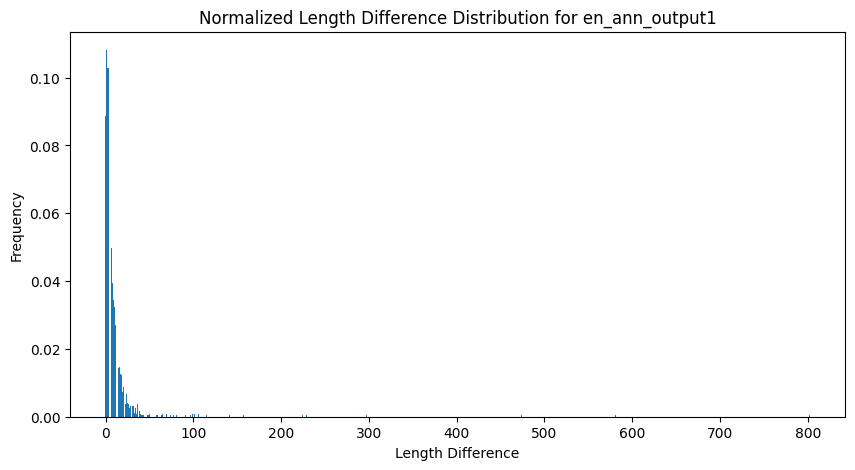

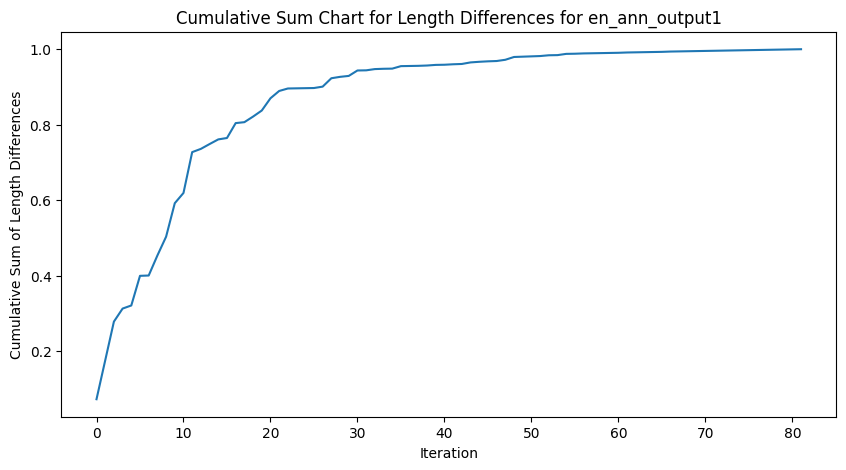

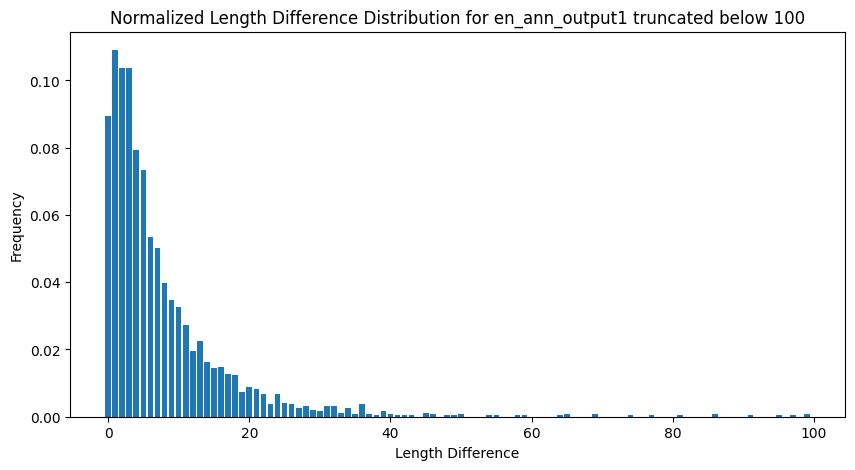

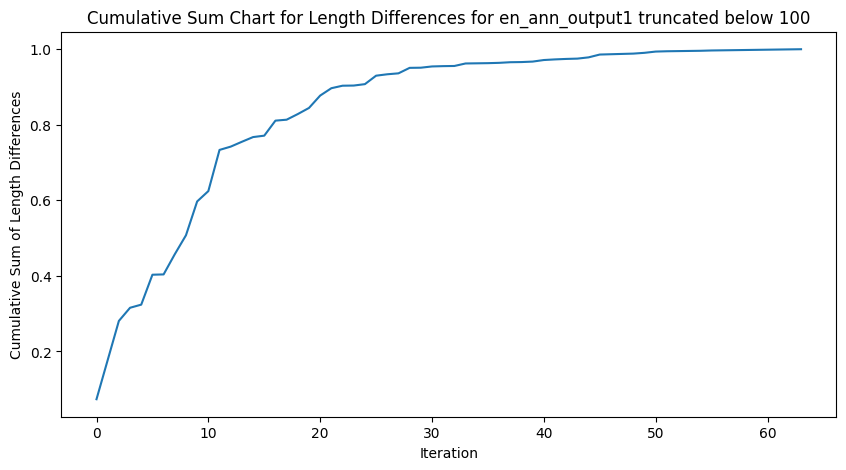

Mean difference for en_nes_output1, q=None: 8.344983552631579
Median of the difference for en_nes_output1, q=None: 4.0


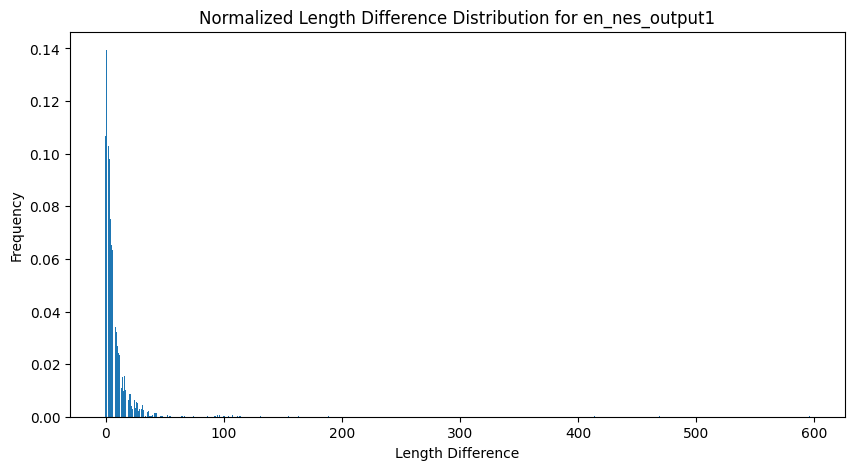

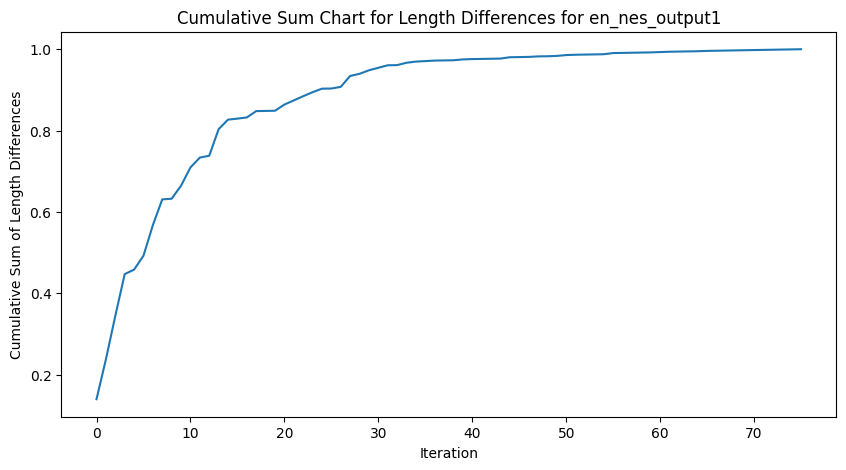

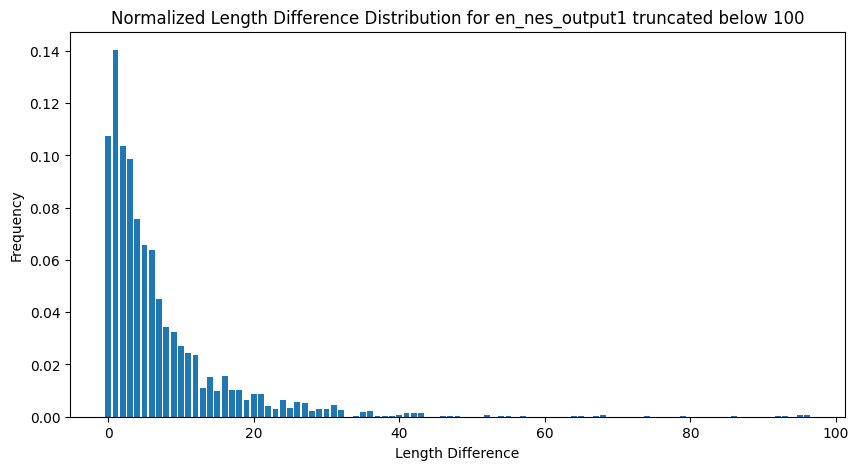

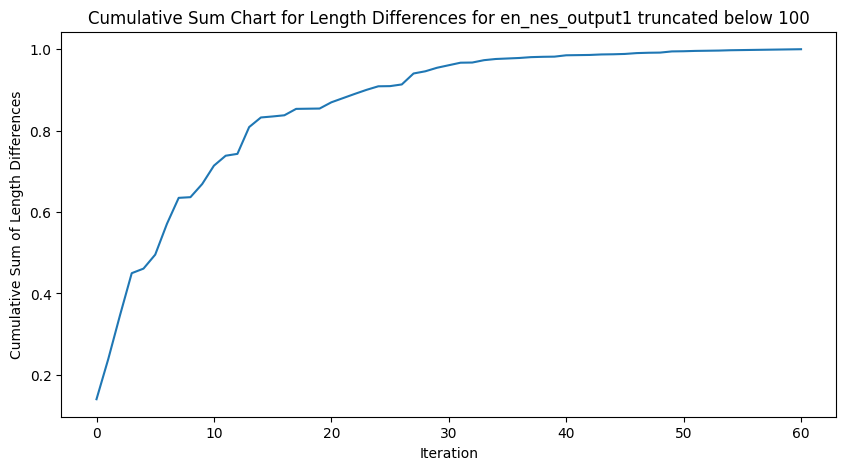

Mean difference for en_ann_output3_iob, q=None: 1.1768092105263157
Median of the difference for en_ann_output3_iob, q=None: 0.0


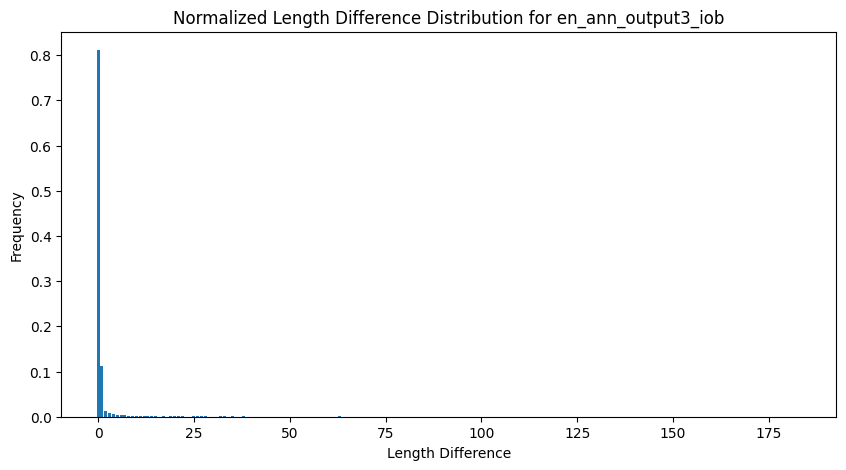

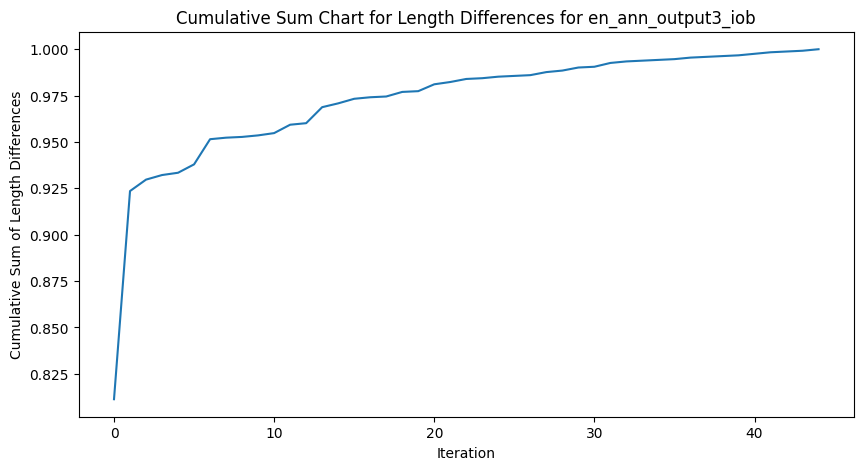

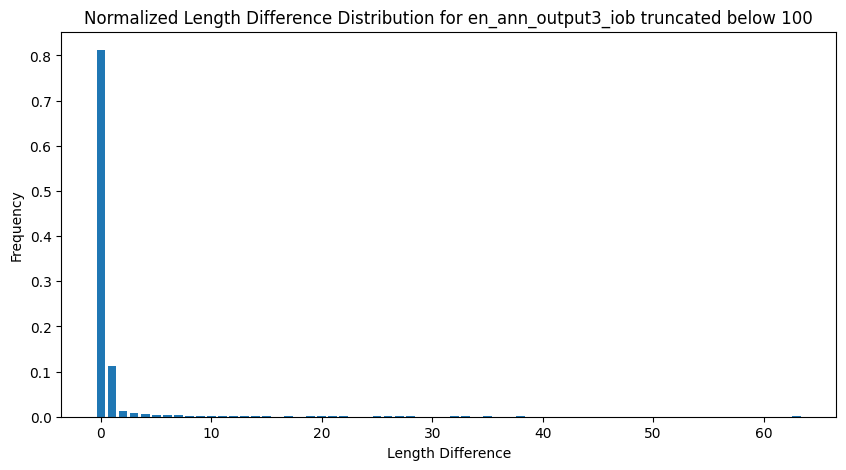

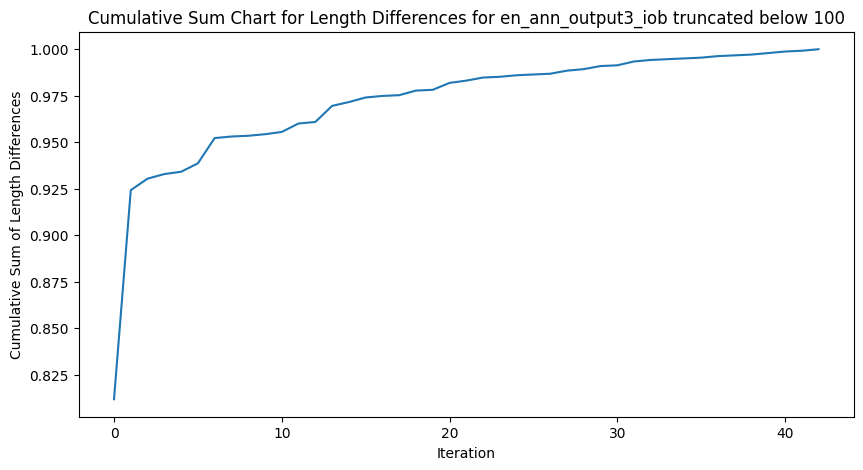

Mean difference for en_nes_output3_iob, q=None: 1.240953947368421
Median of the difference for en_nes_output3_iob, q=None: 0.0


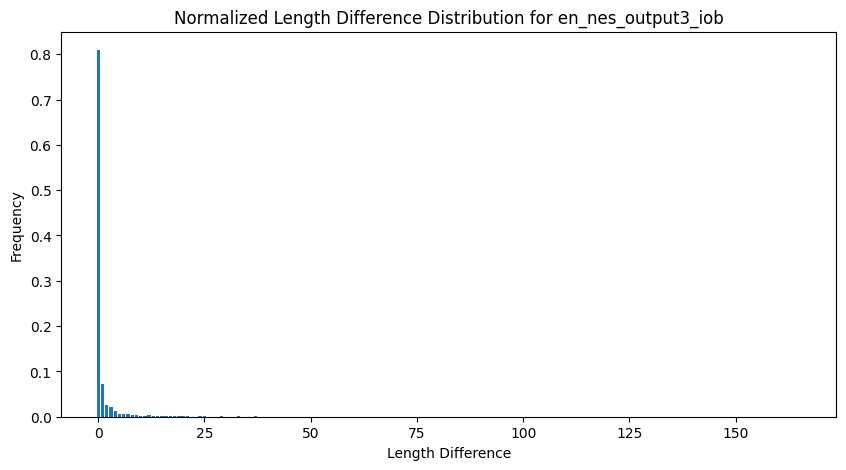

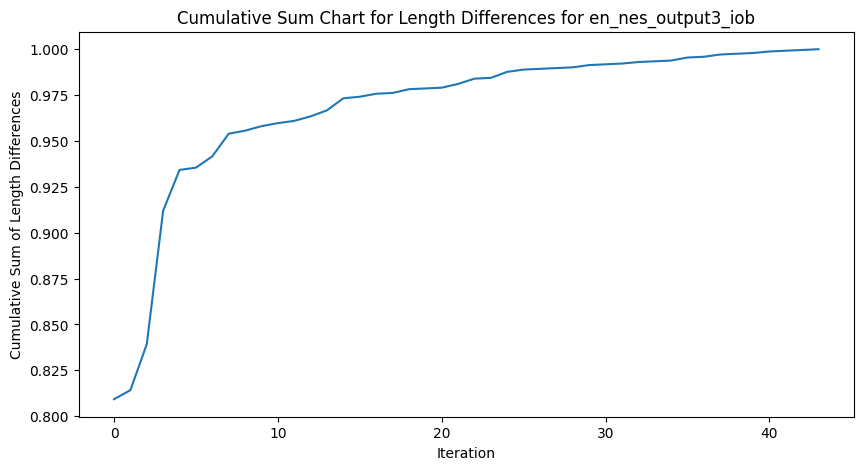

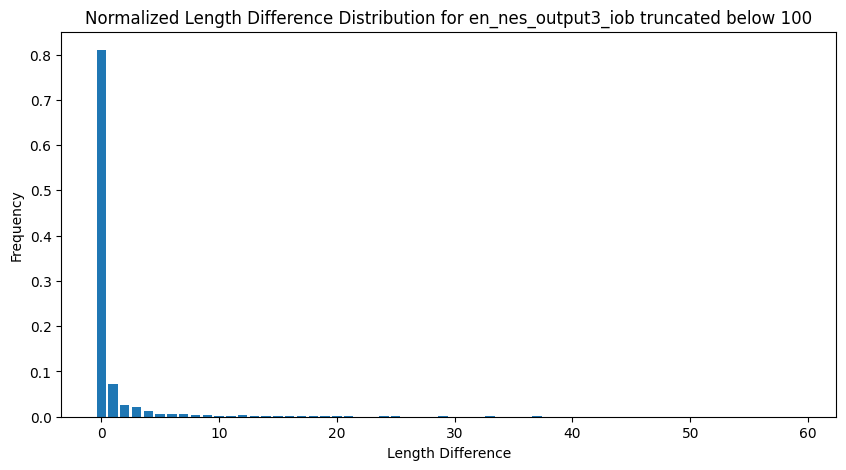

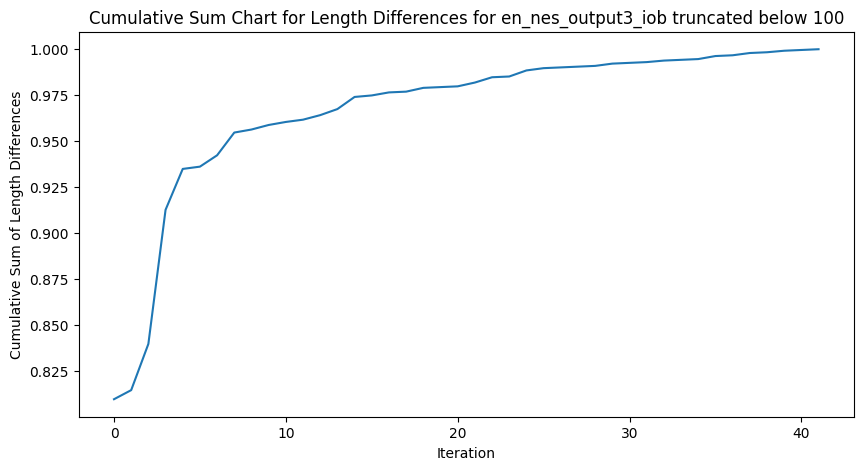

Mean difference for en_ann_output1, q=0.25: 3.5126050420168067
Median of the difference for en_ann_output1, q=0.25: 2.0


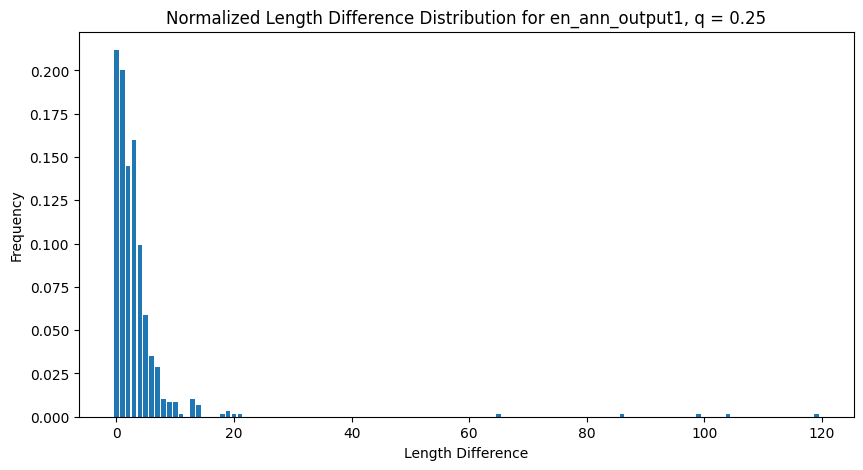

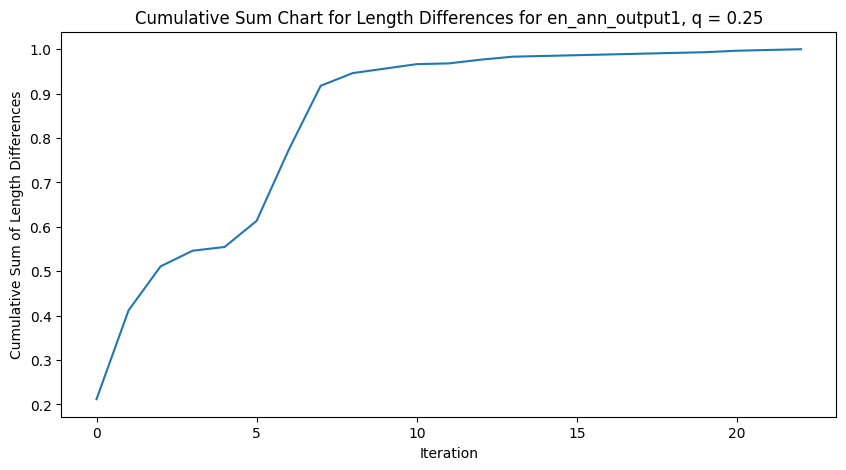

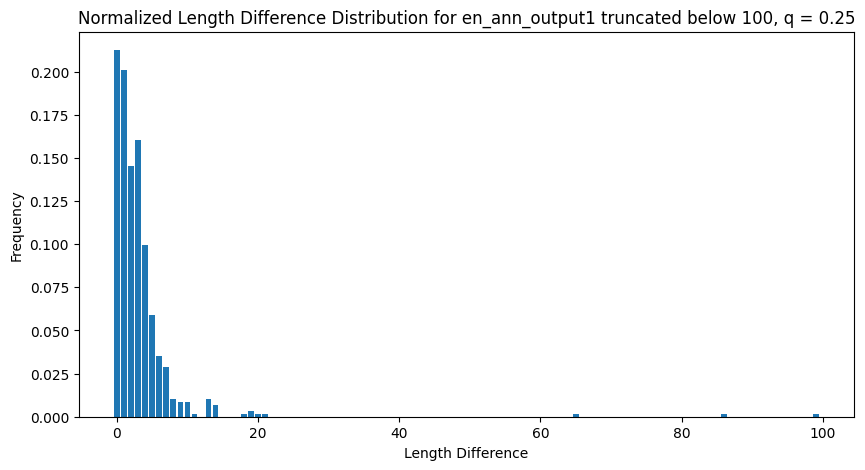

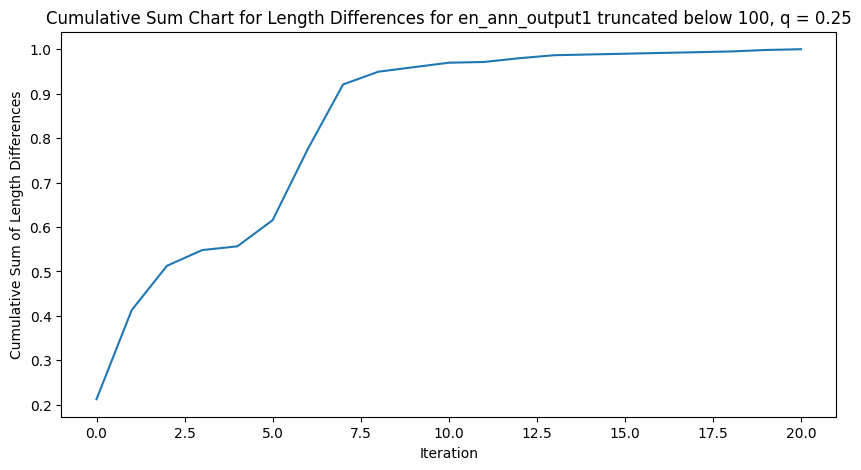

Mean difference for en_nes_output1, q=0.25: 2.3361344537815127
Median of the difference for en_nes_output1, q=0.25: 1.0


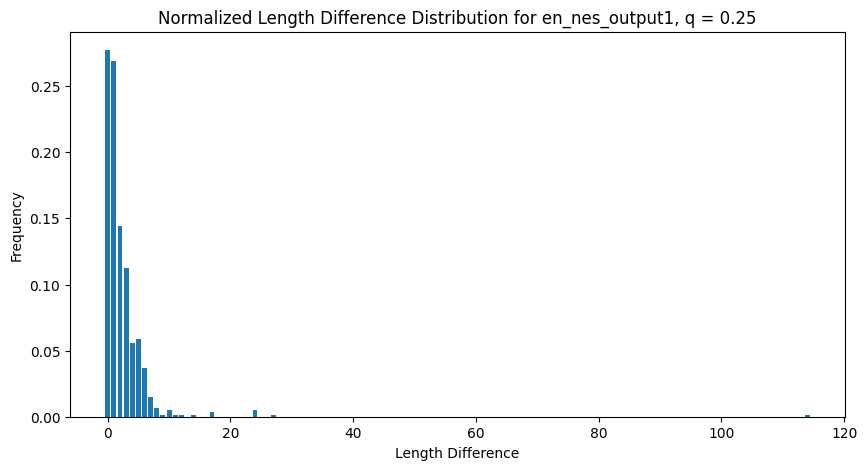

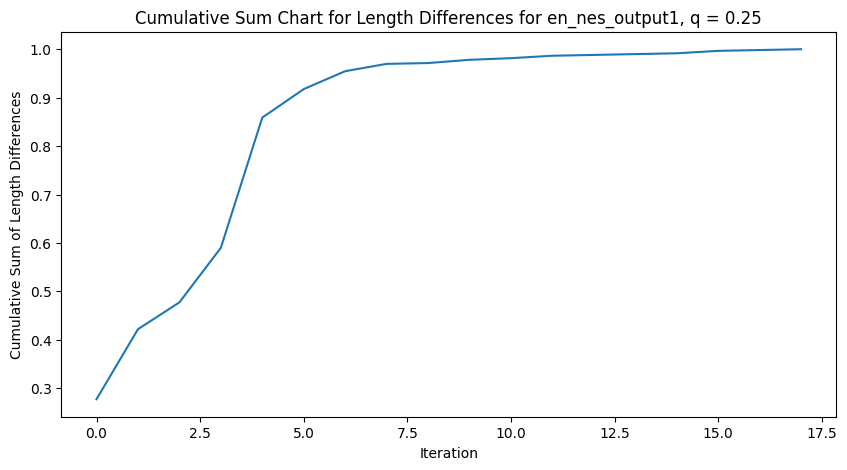

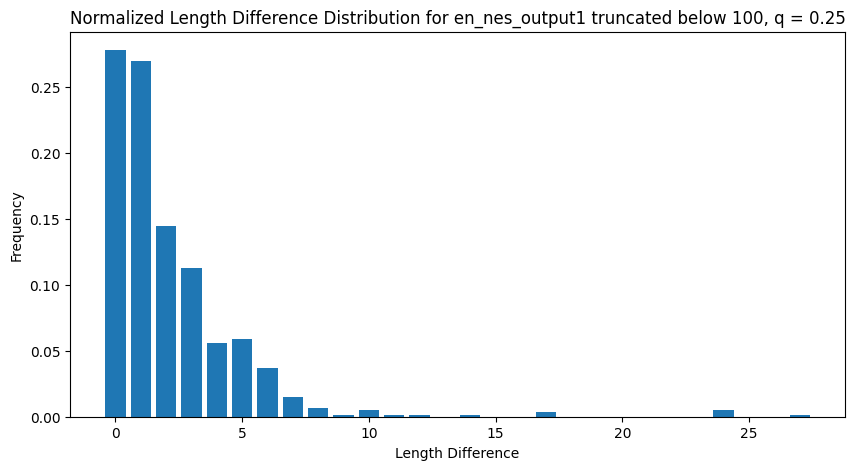

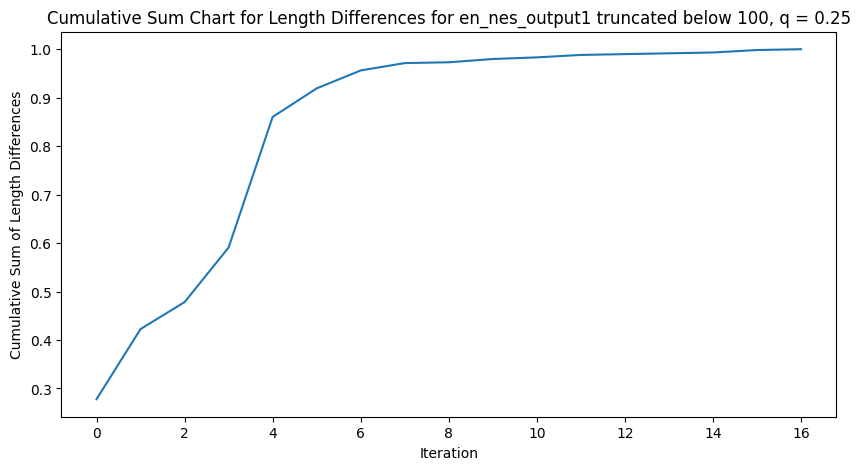

Mean difference for en_ann_output3_iob, q=0.25: 0.9243697478991597
Median of the difference for en_ann_output3_iob, q=0.25: 0.0


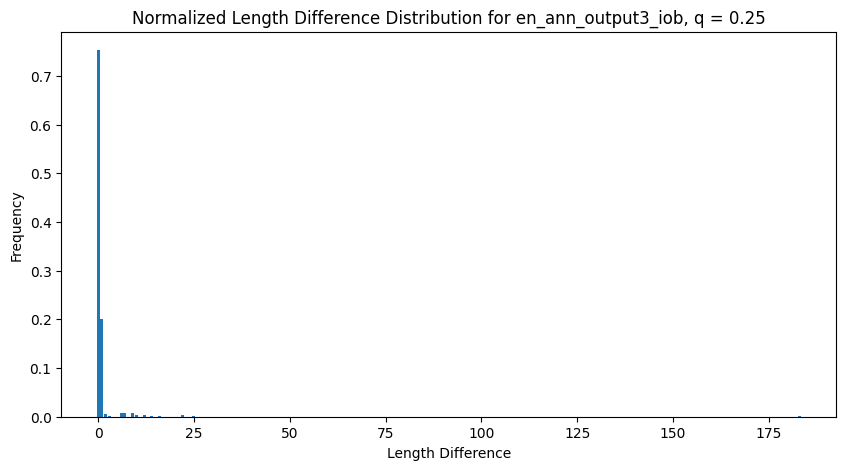

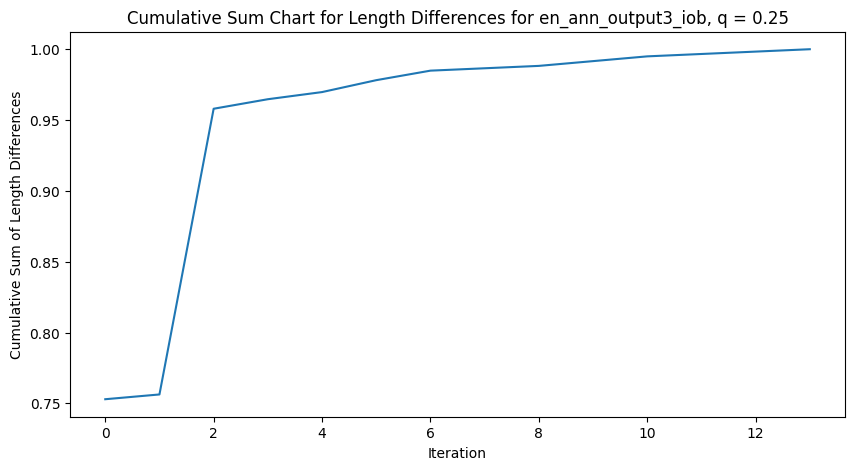

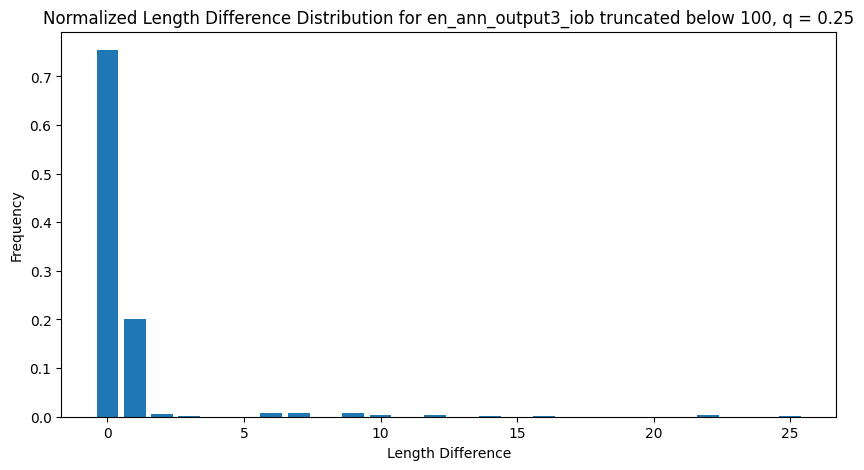

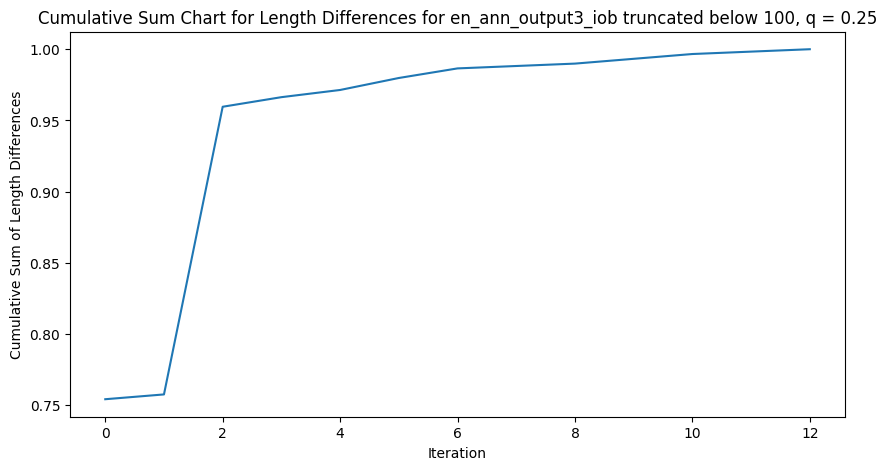

Mean difference for en_nes_output3_iob, q=0.25: 0.5445378151260504
Median of the difference for en_nes_output3_iob, q=0.25: 0.0


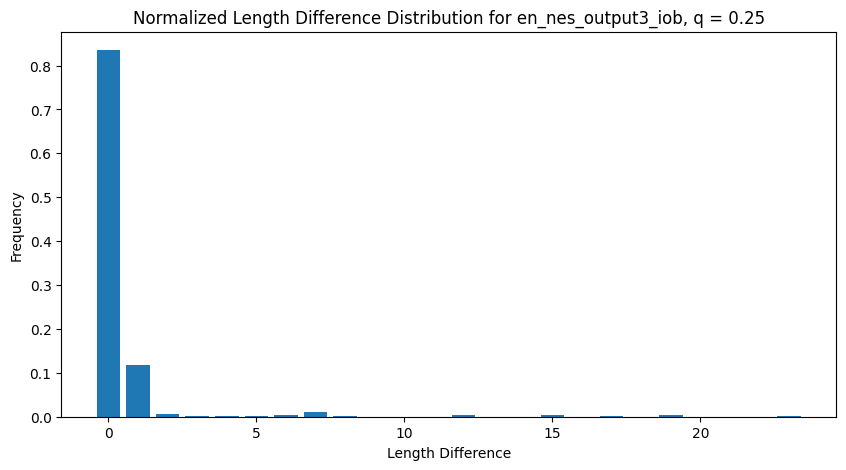

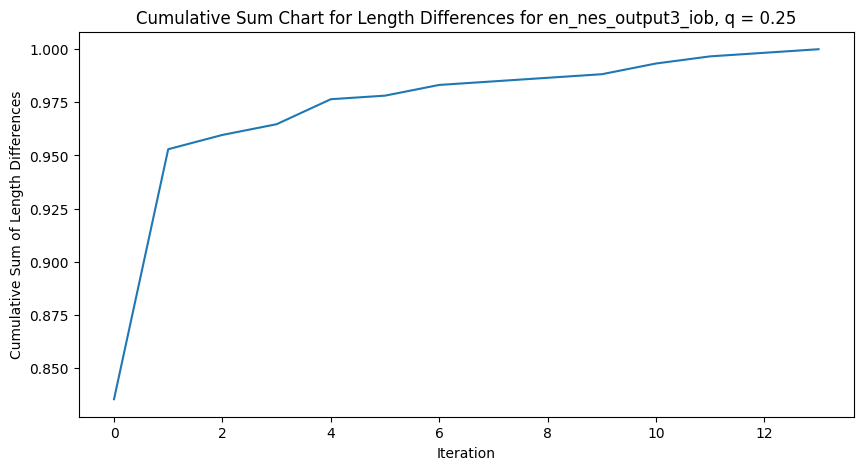

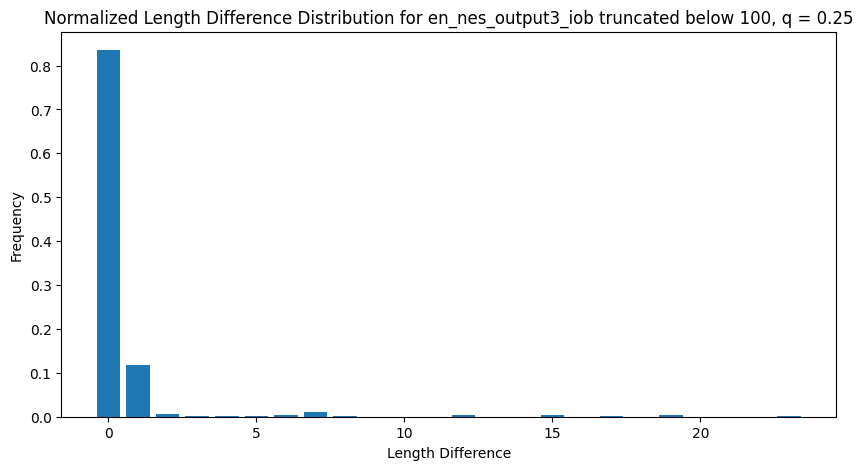

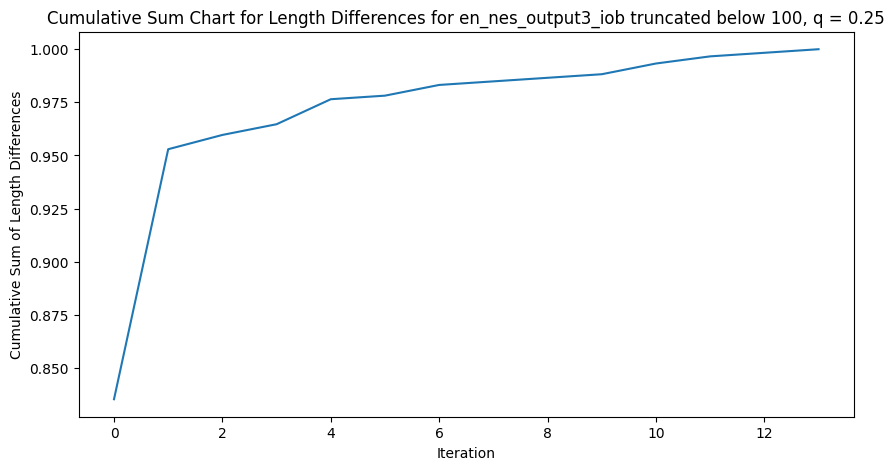

Mean difference for en_ann_output1, q=0.5: 6.81549815498155
Median of the difference for en_ann_output1, q=0.5: 5.0


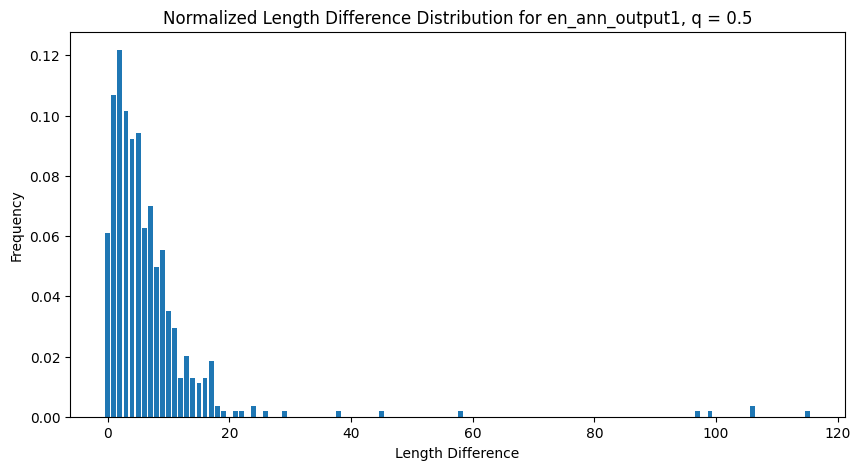

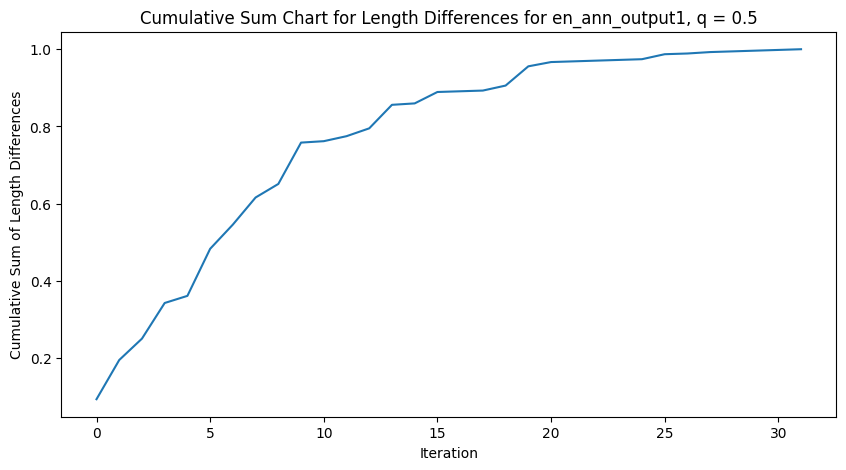

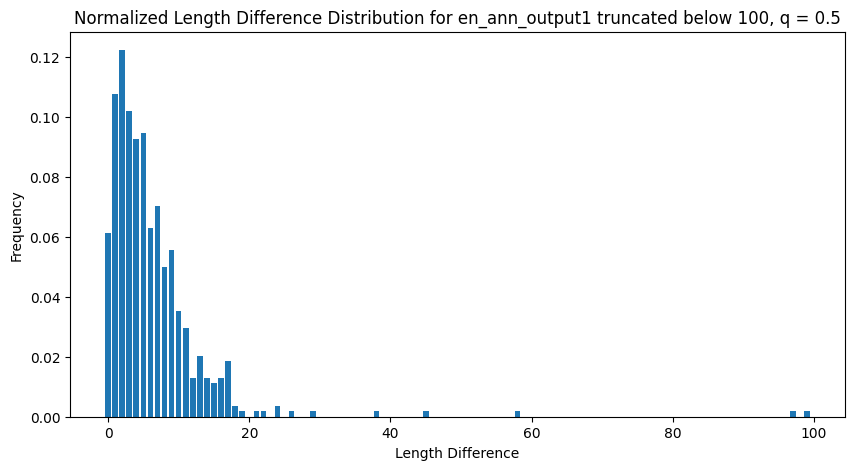

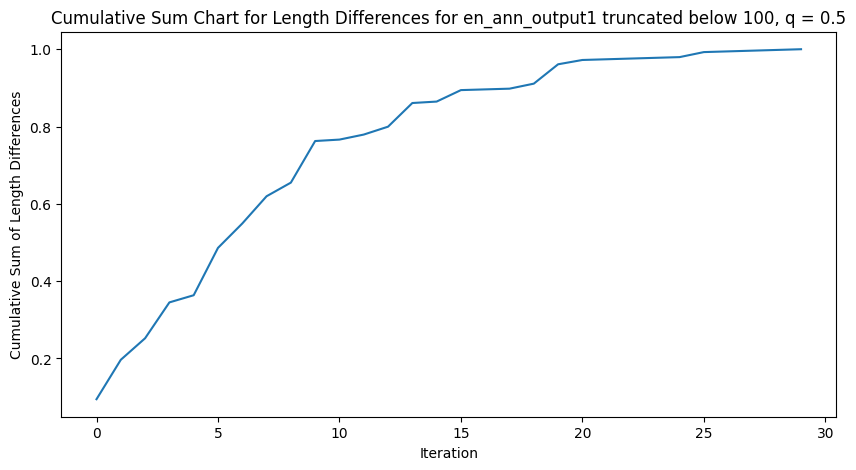

Mean difference for en_nes_output1, q=0.5: 5.885608856088561
Median of the difference for en_nes_output1, q=0.5: 4.0


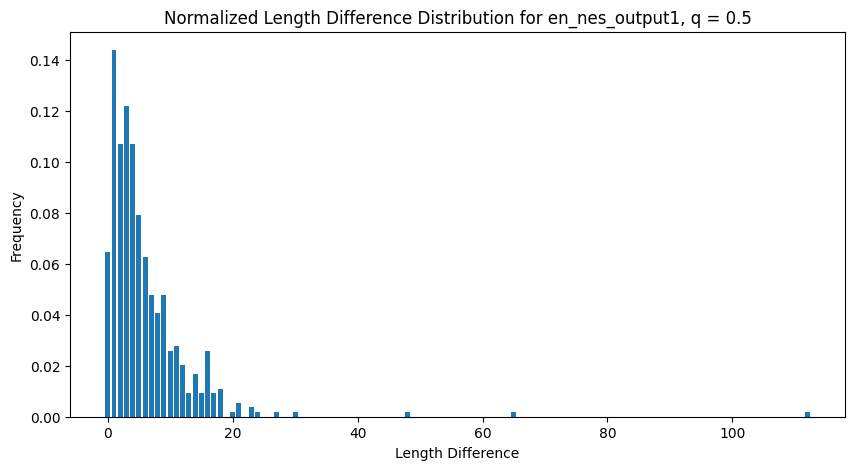

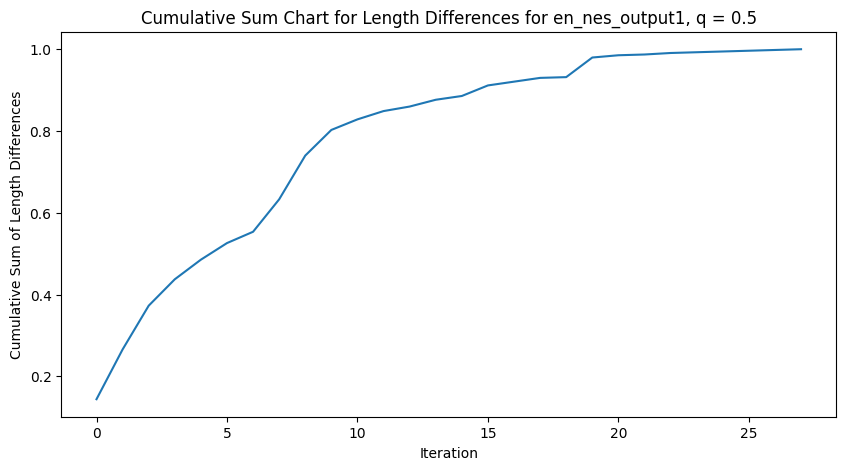

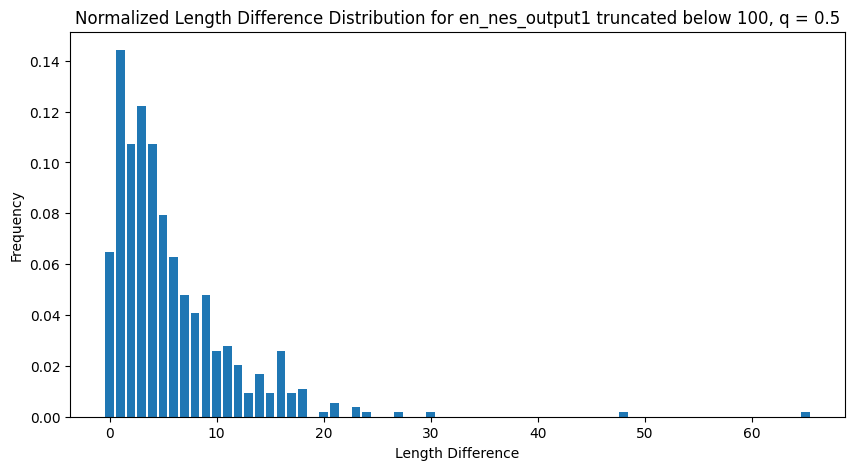

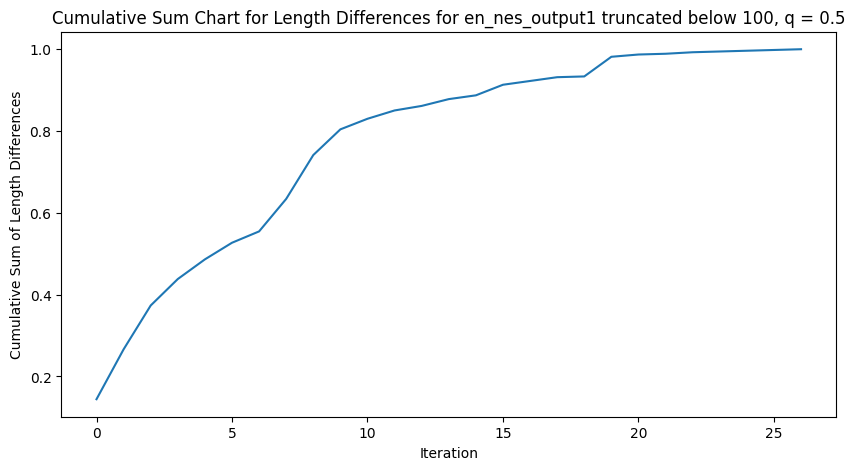

Mean difference for en_ann_output3_iob, q=0.5: 0.34317343173431736
Median of the difference for en_ann_output3_iob, q=0.5: 0.0


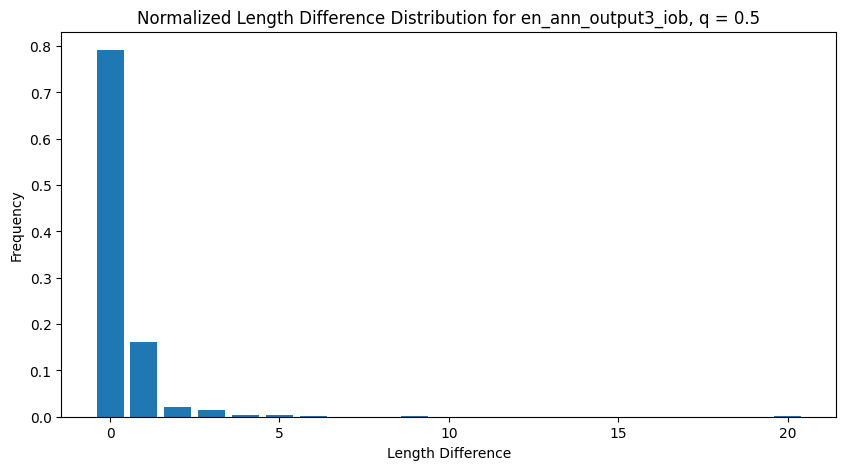

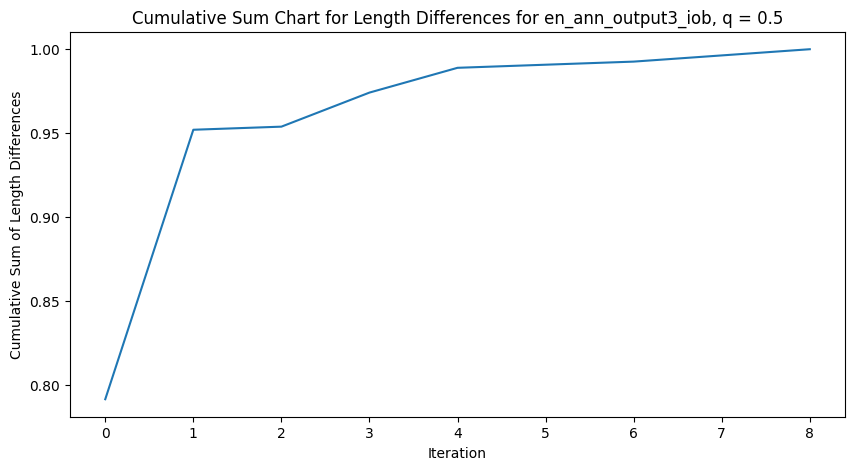

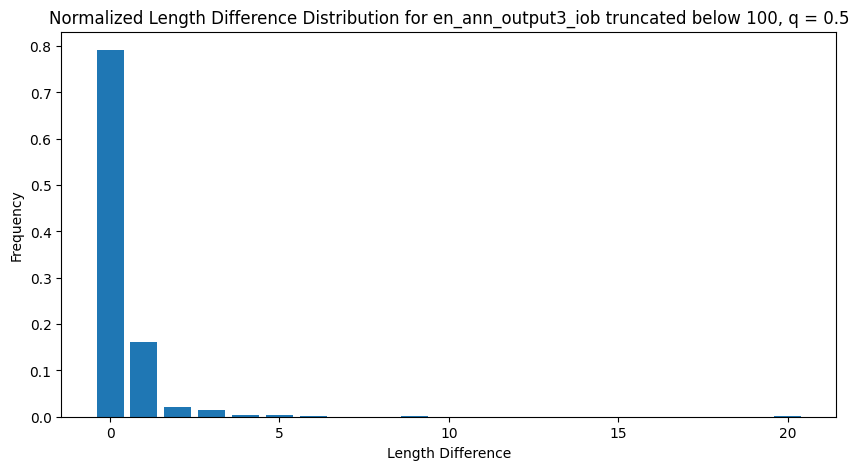

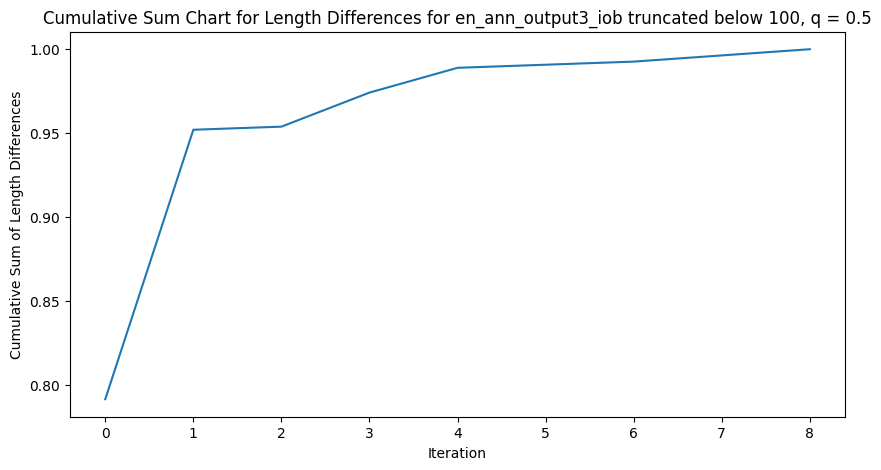

Mean difference for en_nes_output3_iob, q=0.5: 0.4944649446494465
Median of the difference for en_nes_output3_iob, q=0.5: 0.0


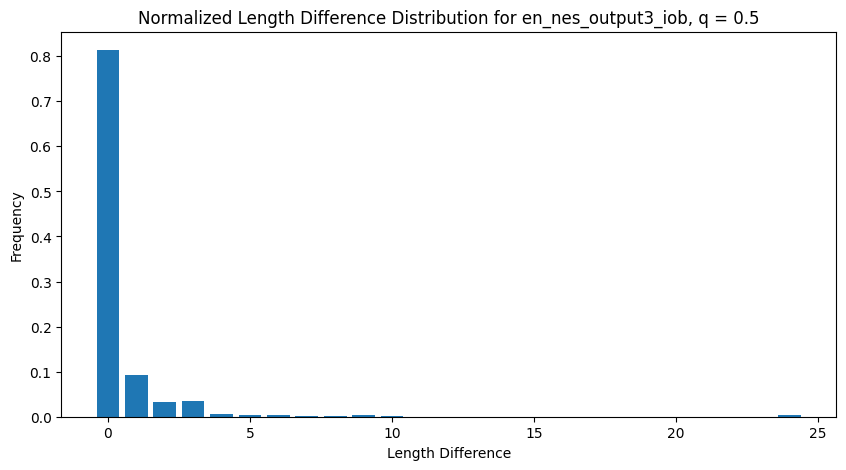

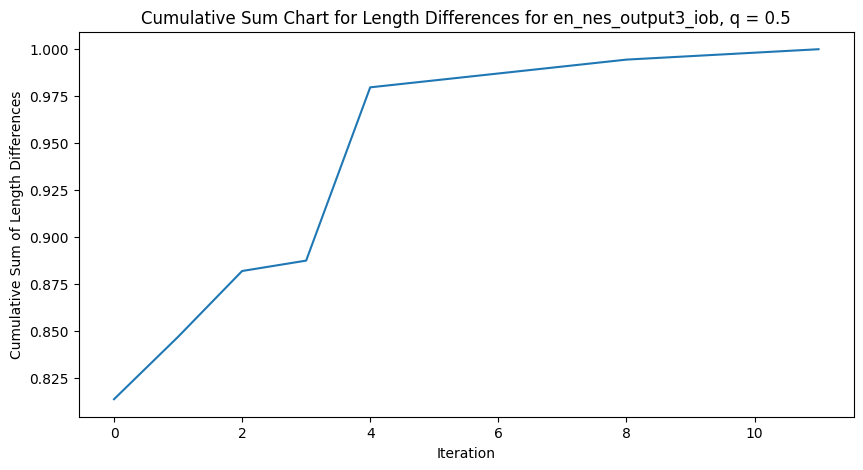

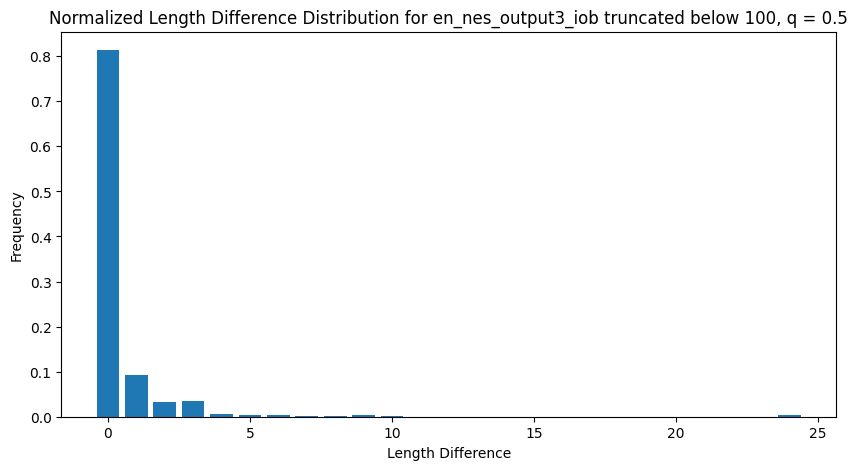

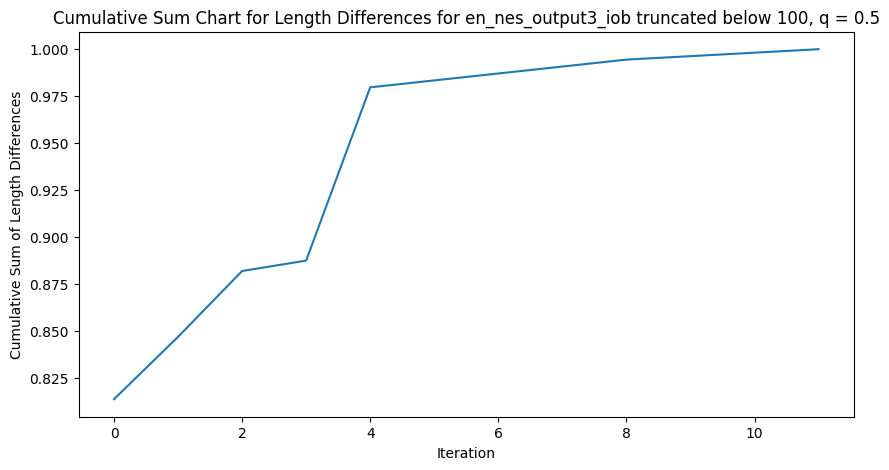

Mean difference for en_ann_output1, q=0.75: 9.771604938271604
Median of the difference for en_ann_output1, q=0.75: 7.0


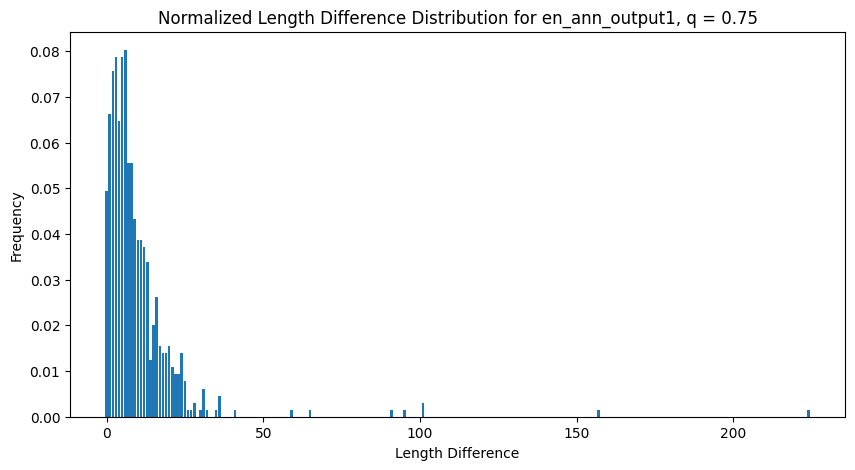

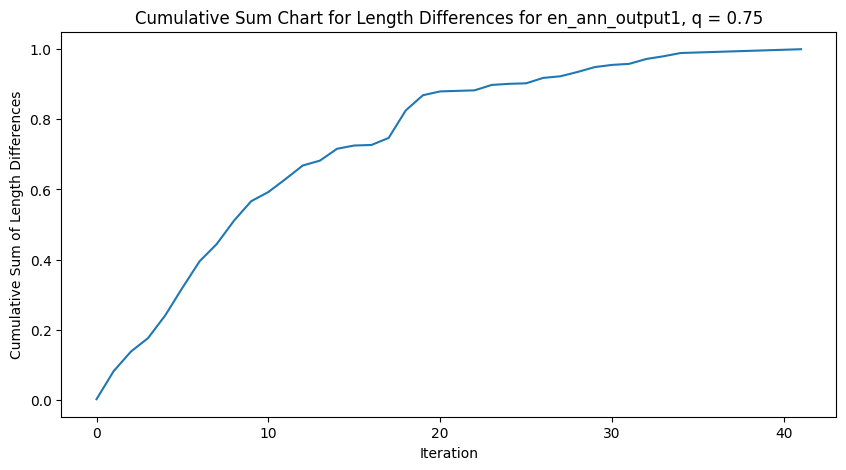

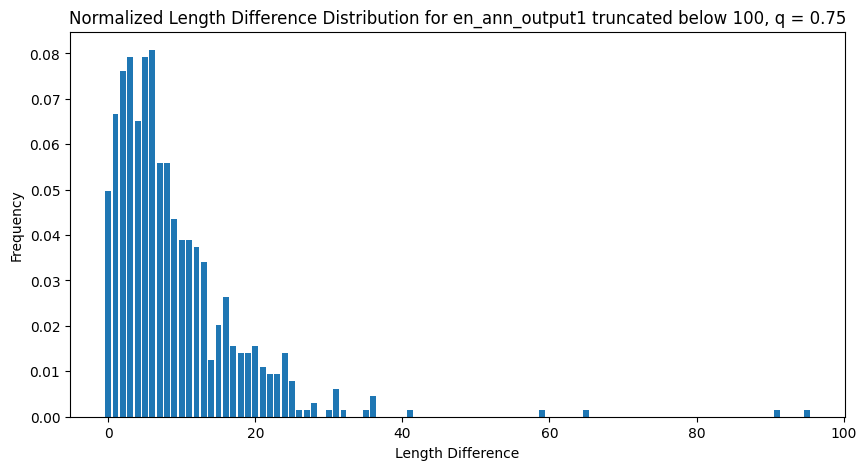

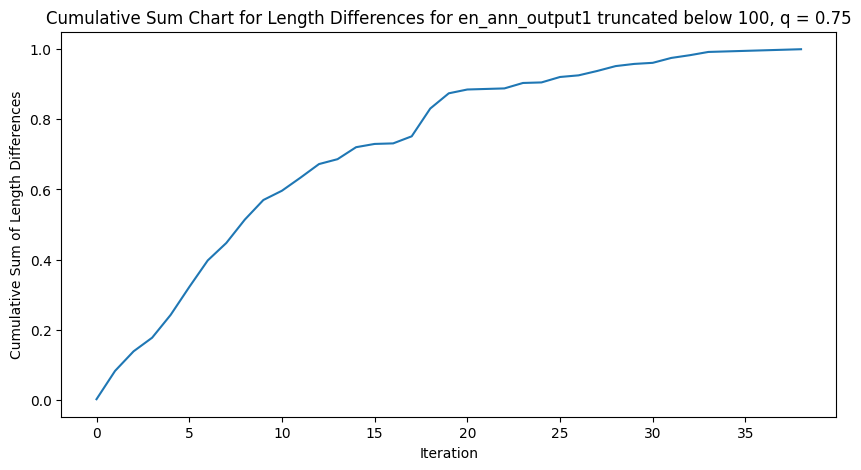

Mean difference for en_nes_output1, q=0.75: 9.246913580246913
Median of the difference for en_nes_output1, q=0.75: 6.0


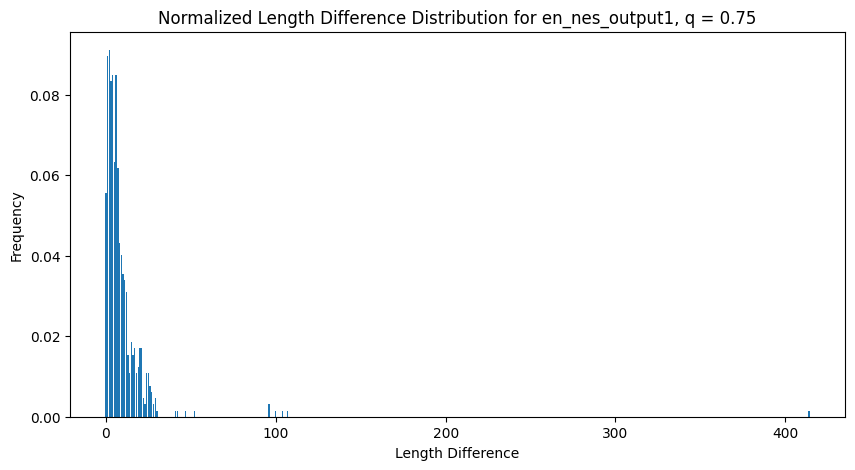

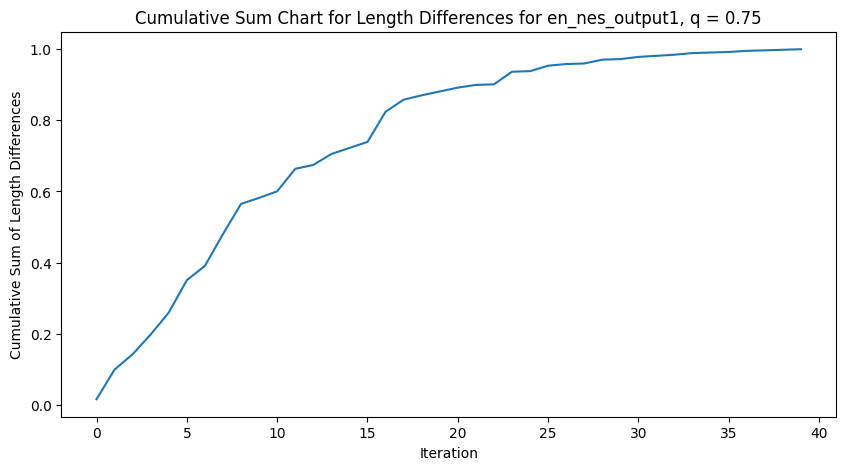

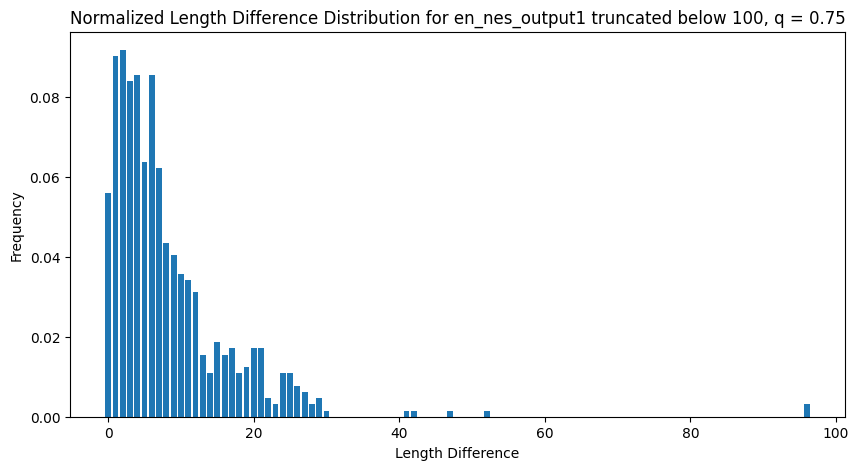

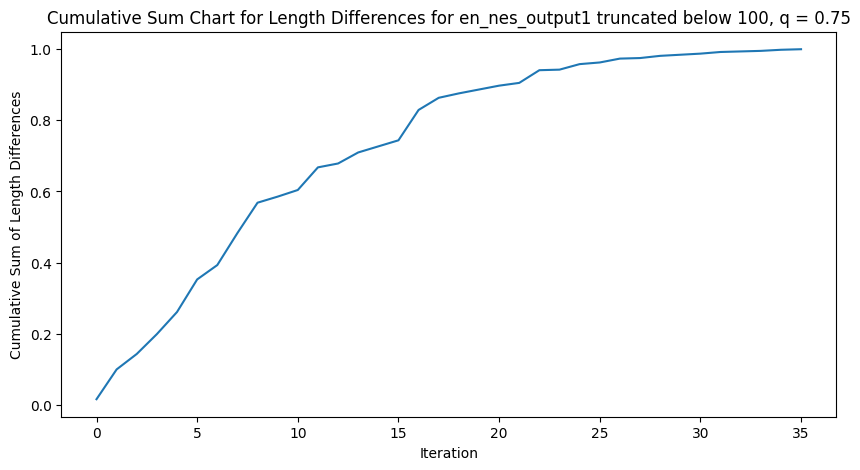

Mean difference for en_ann_output3_iob, q=0.75: 0.9182098765432098
Median of the difference for en_ann_output3_iob, q=0.75: 0.0


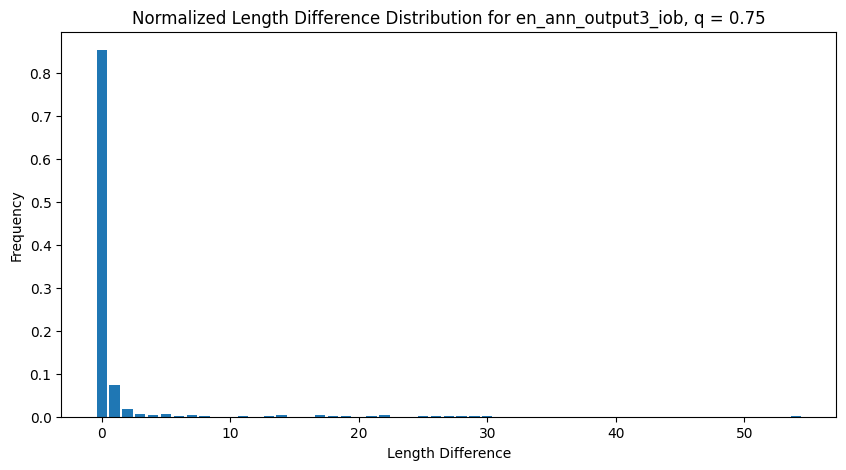

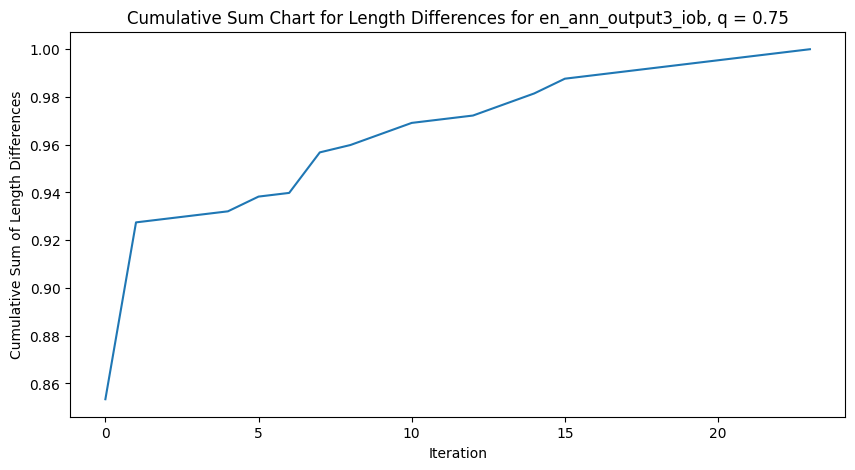

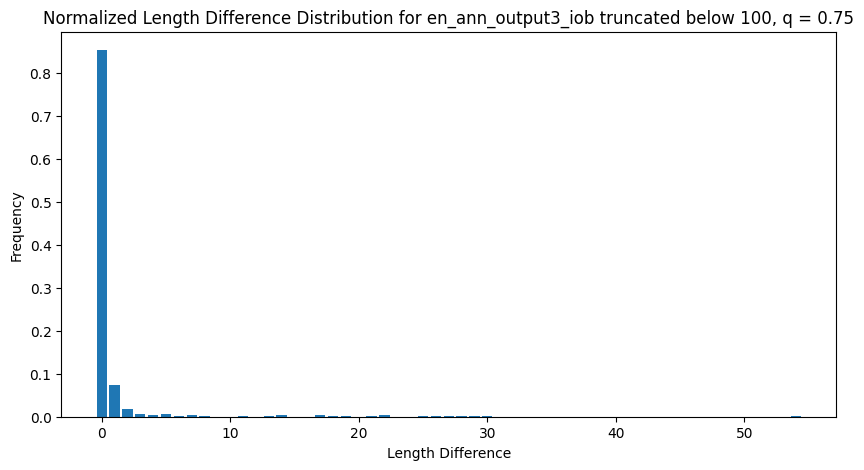

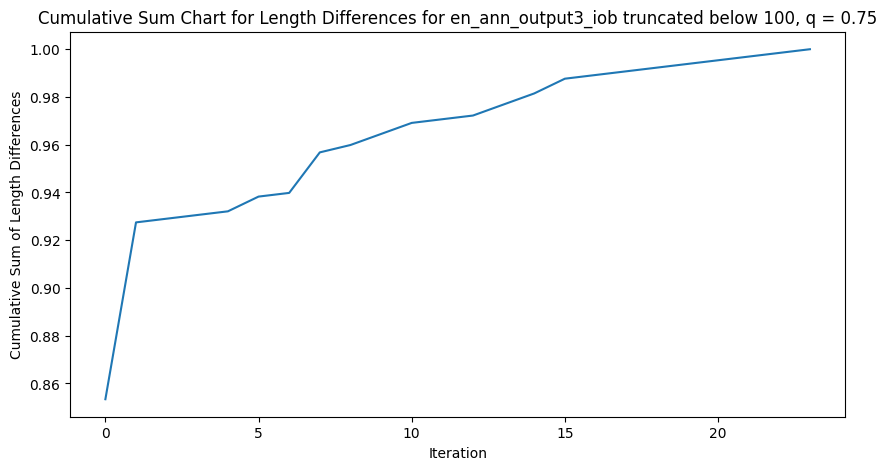

Mean difference for en_nes_output3_iob, q=0.75: 0.7854938271604939
Median of the difference for en_nes_output3_iob, q=0.75: 0.0


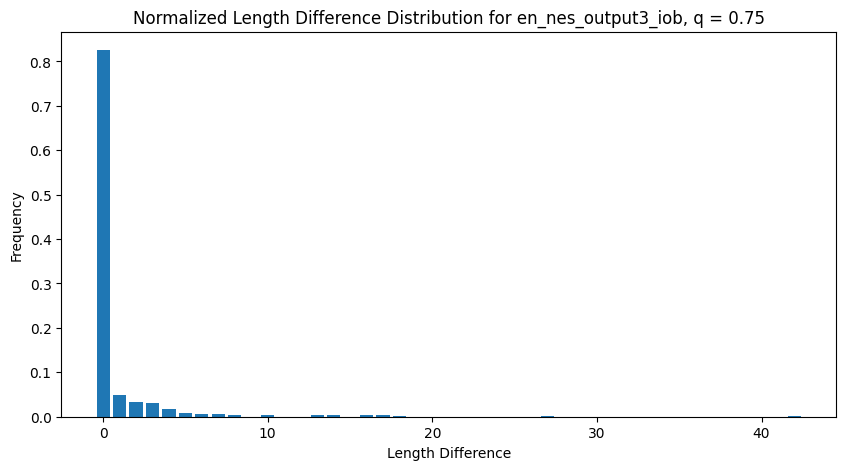

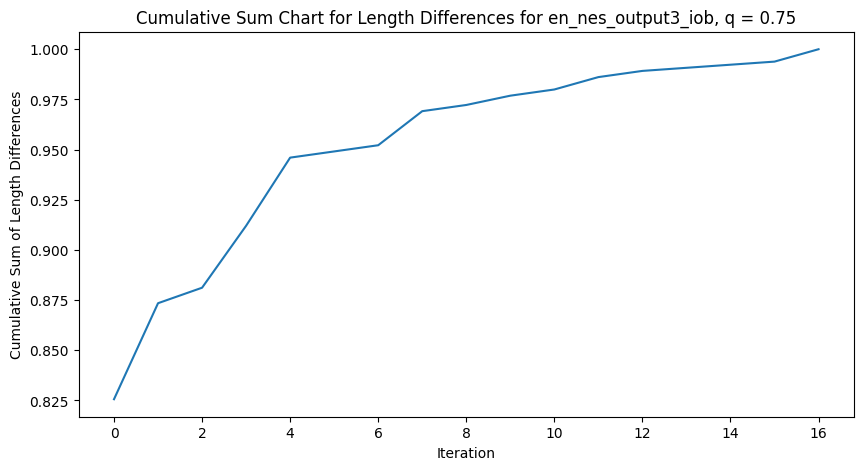

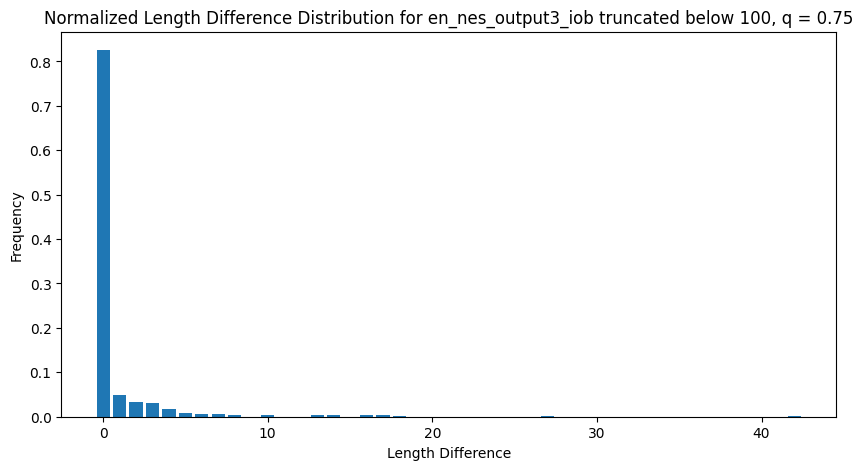

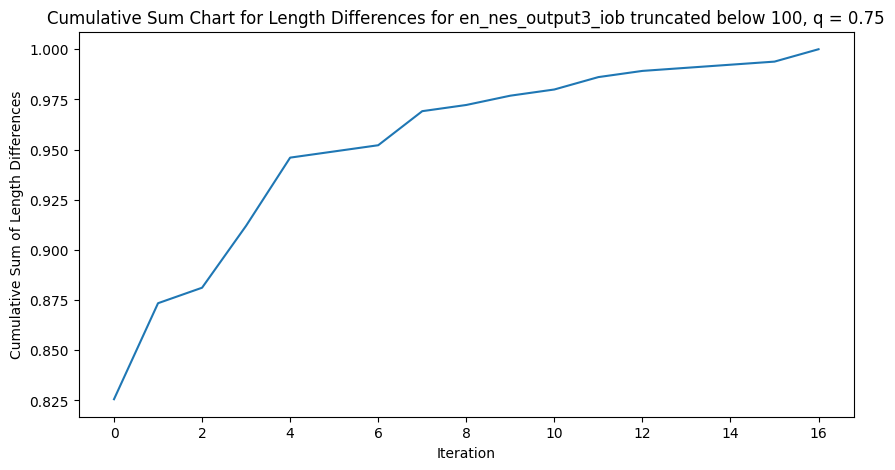

Mean difference for en_ann_output1, q=1: 16.852941176470587
Median of the difference for en_ann_output1, q=1: 8.0


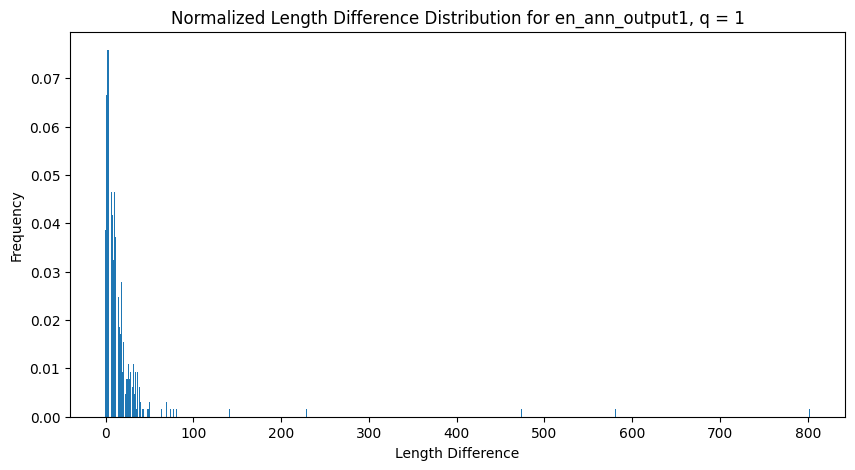

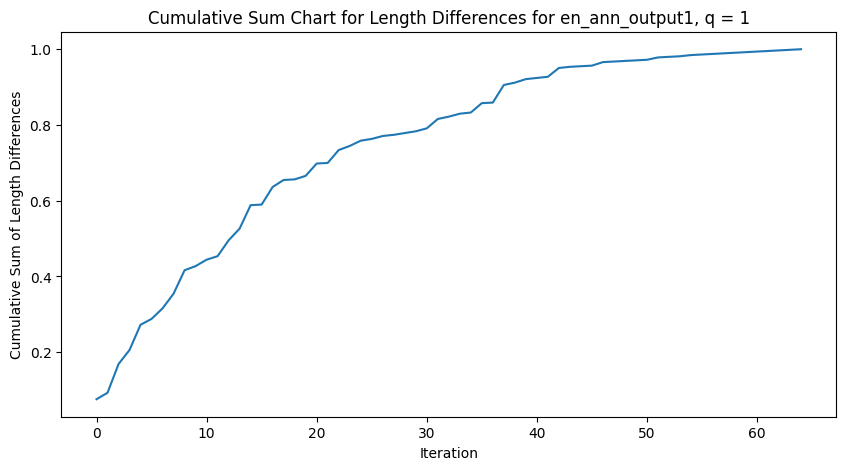

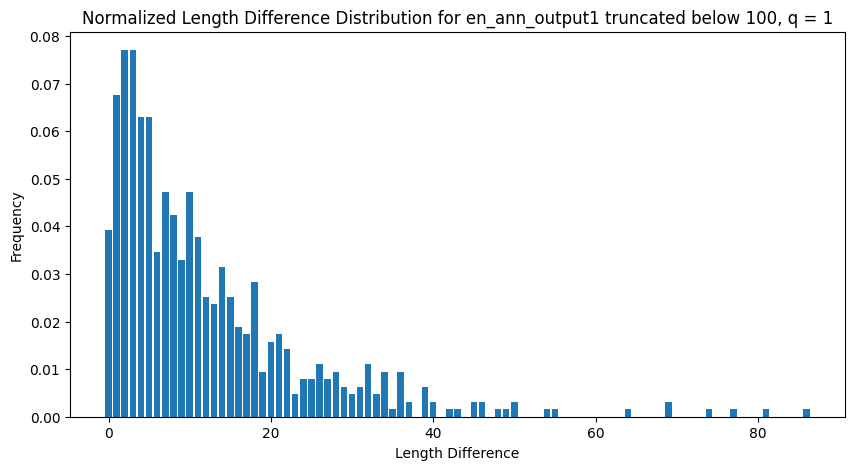

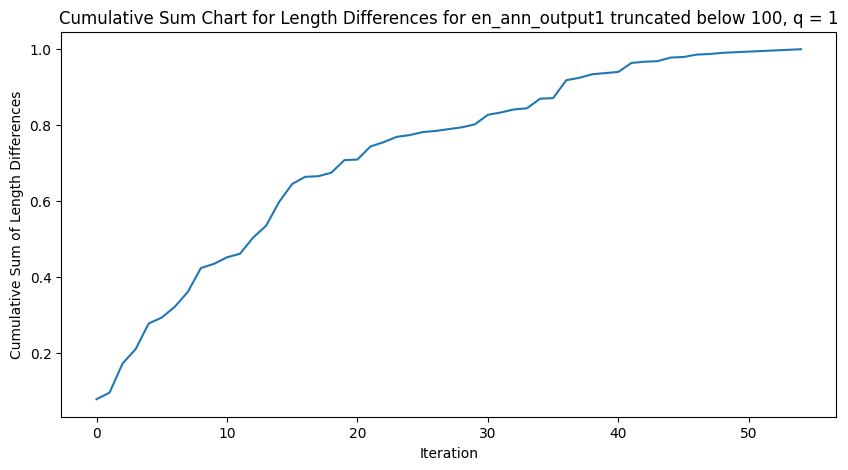

Mean difference for en_nes_output1, q=1: 14.979876160990711
Median of the difference for en_nes_output1, q=1: 8.0


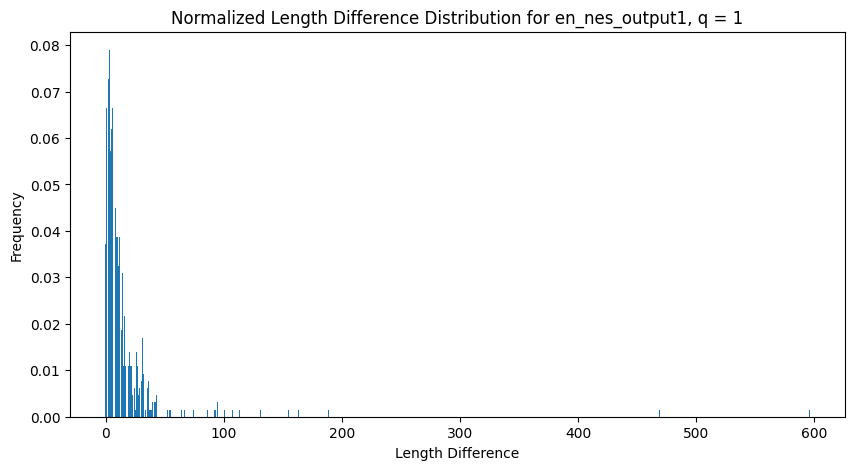

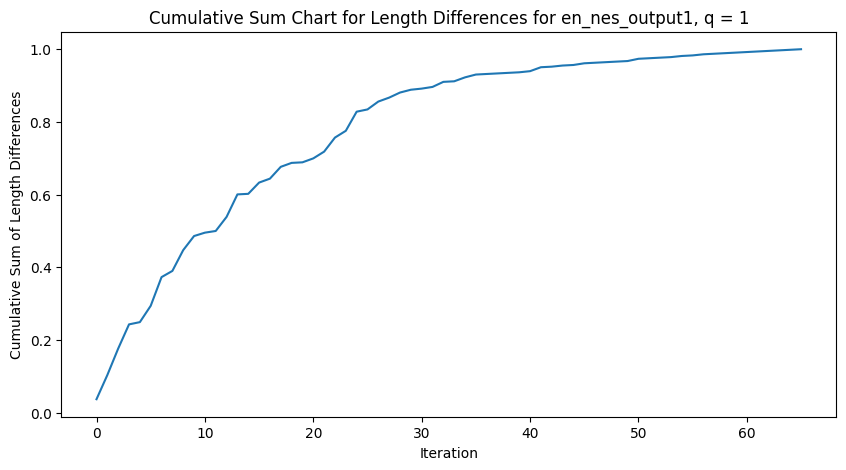

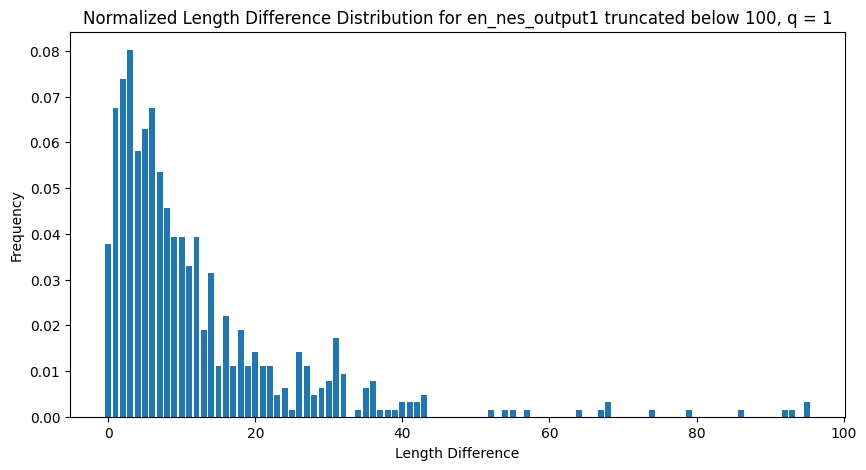

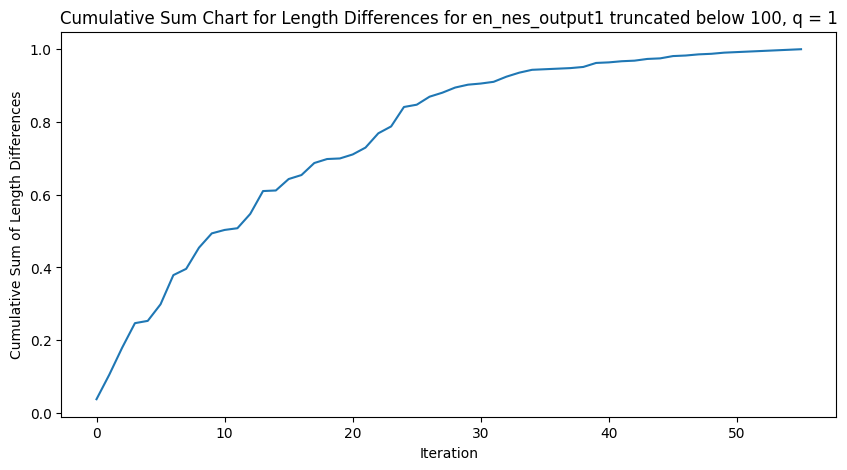

Mean difference for en_ann_output3_iob, q=1: 2.369969040247678
Median of the difference for en_ann_output3_iob, q=1: 0.0


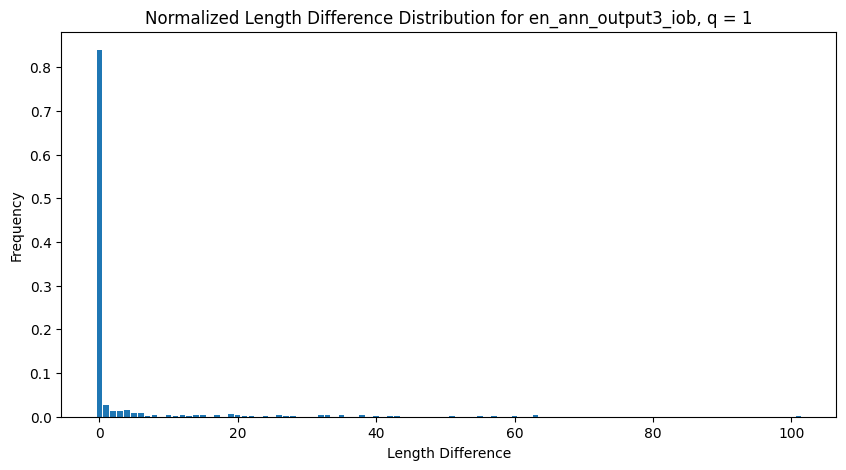

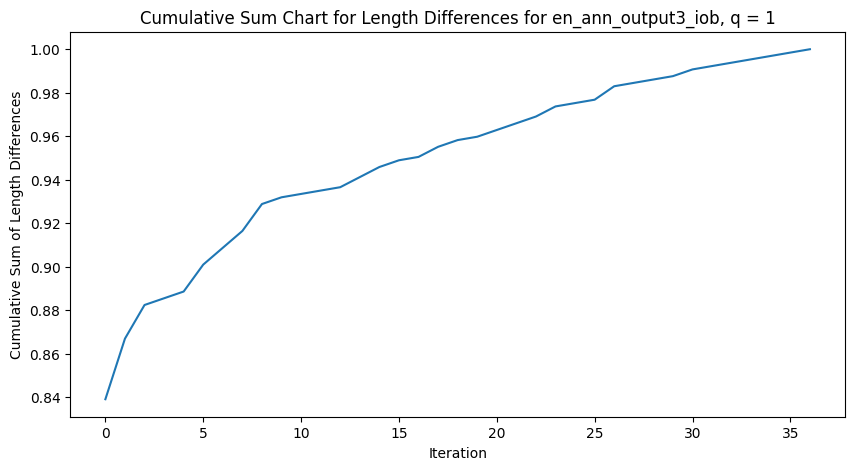

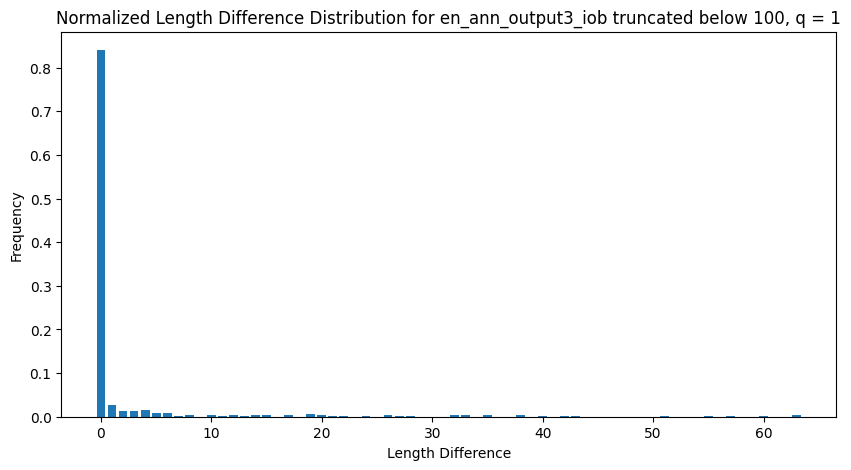

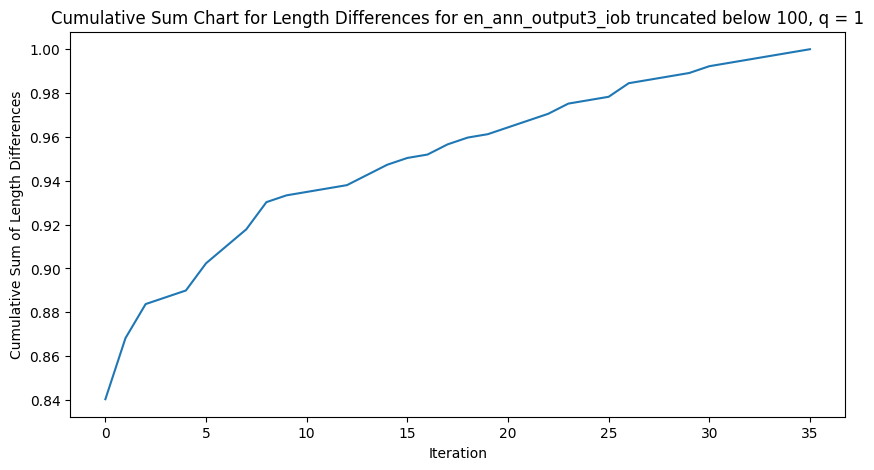

Mean difference for en_nes_output3_iob, q=1: 2.9674922600619196
Median of the difference for en_nes_output3_iob, q=1: 0.0


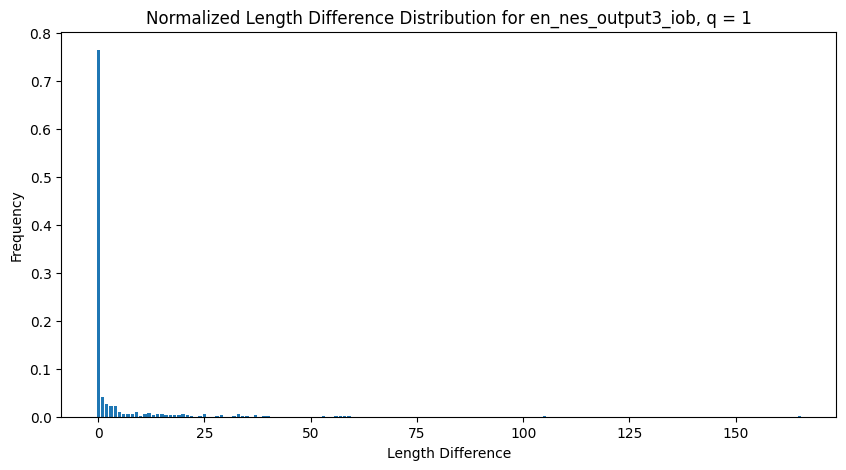

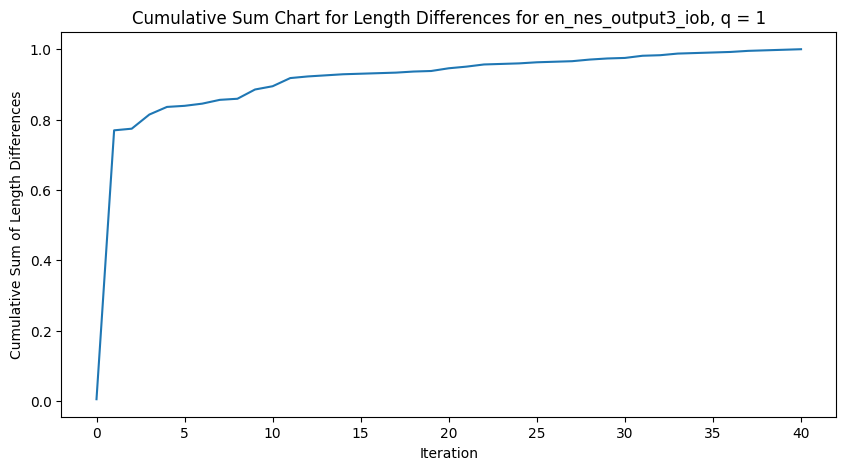

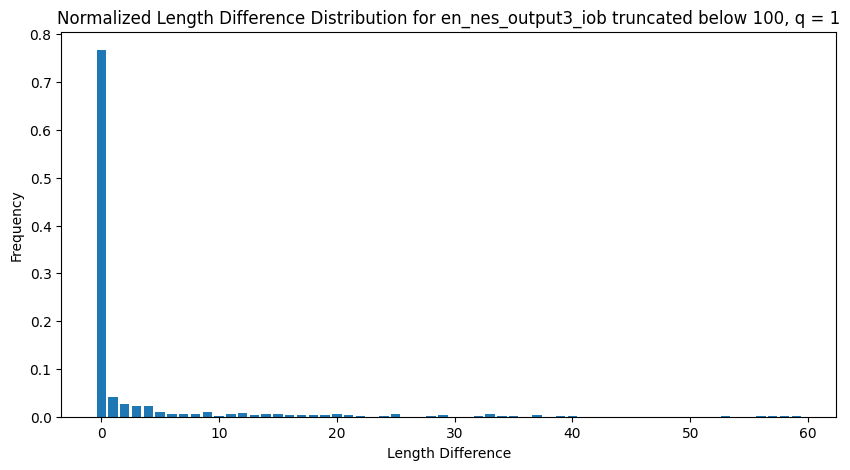

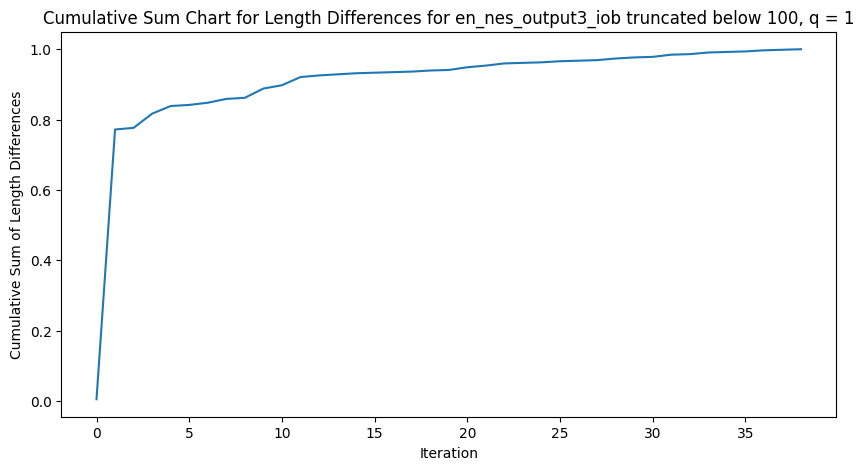

Mean difference for fr_ann_output1, q=None: 18.166743224621037
Median of the difference for fr_ann_output1, q=None: 6.0


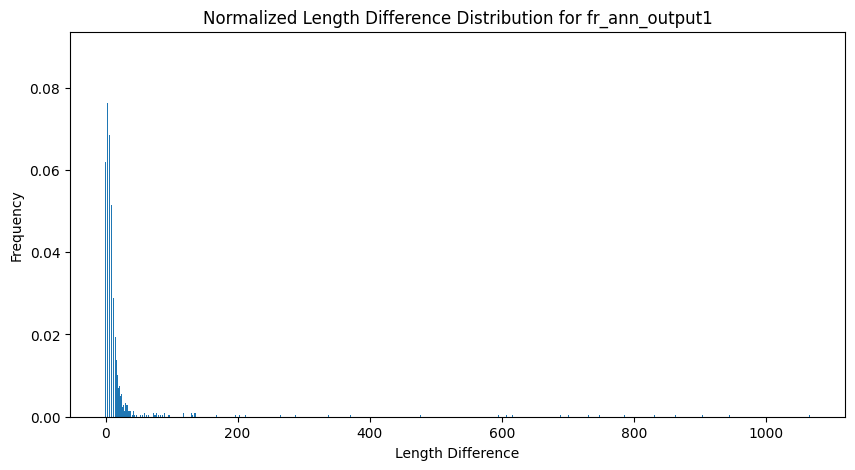

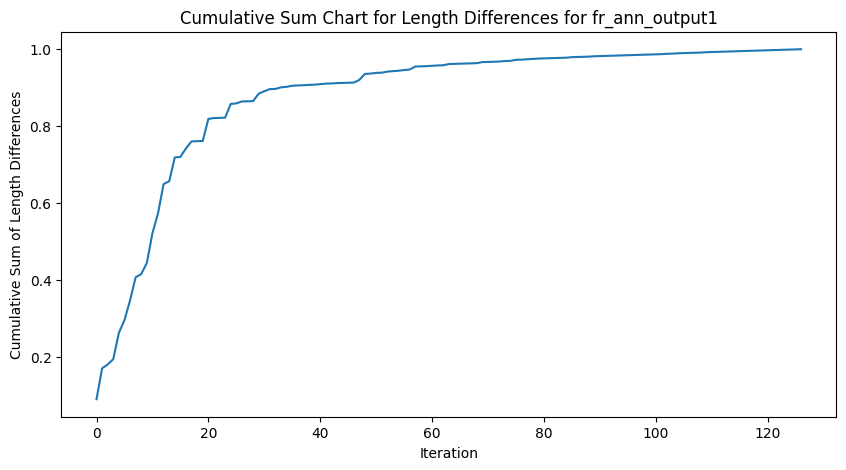

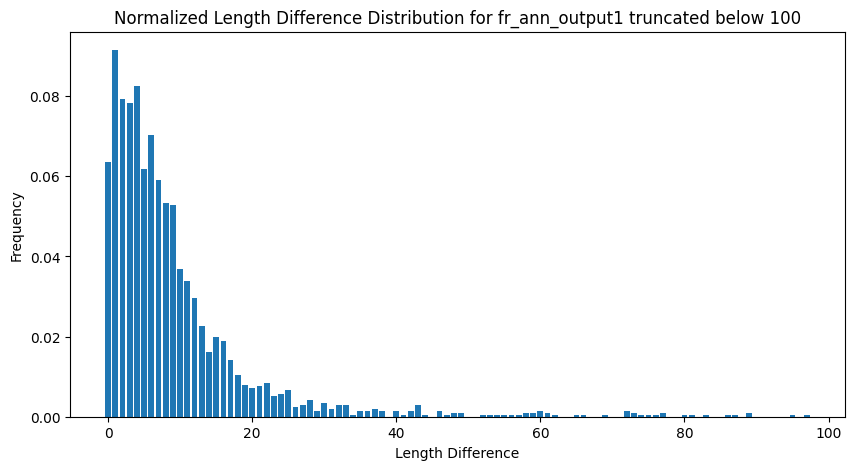

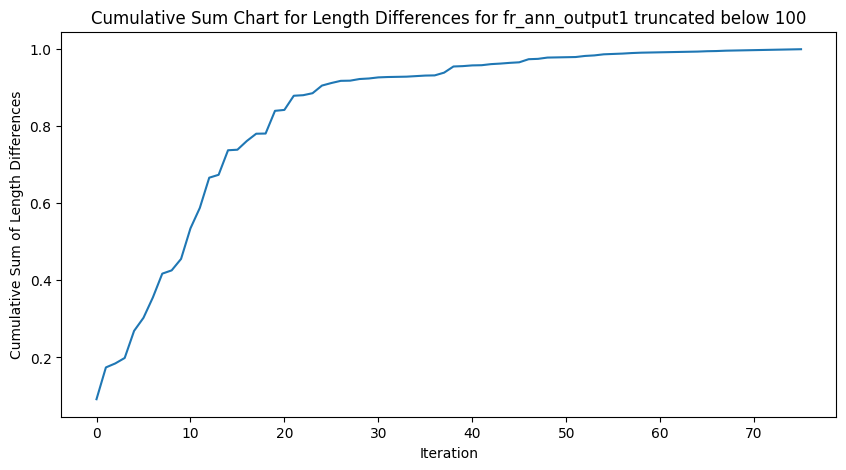

Mean difference for fr_nes_output1, q=None: 15.106109324758842
Median of the difference for fr_nes_output1, q=None: 4.0


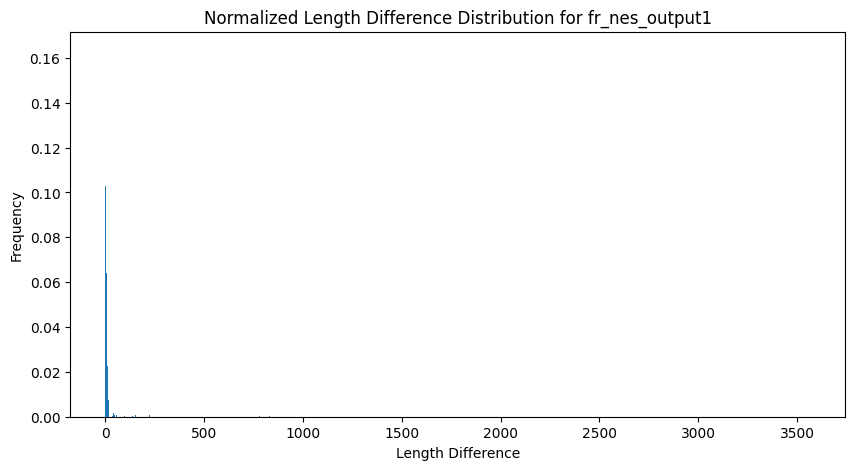

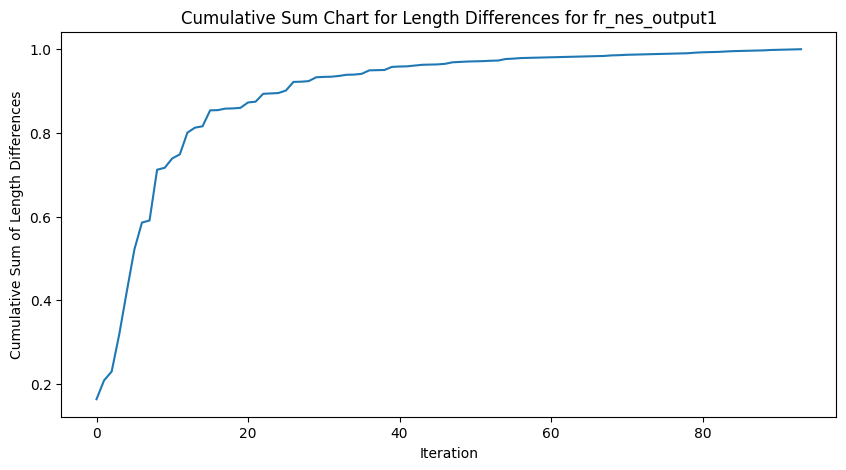

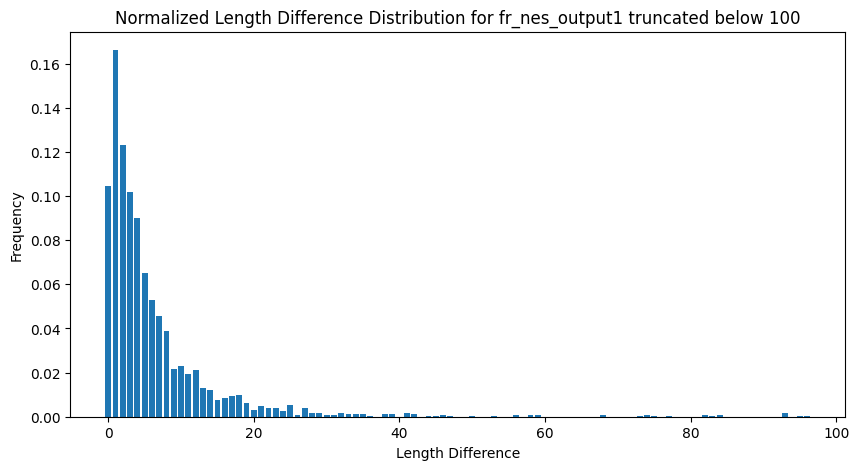

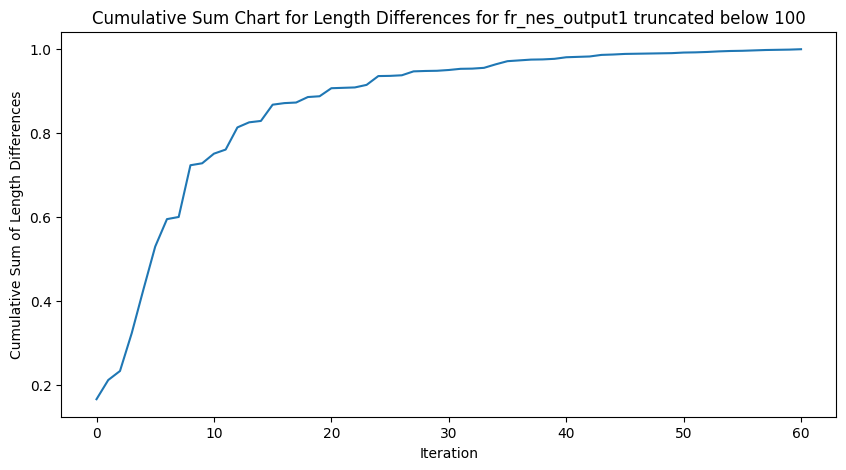

Mean difference for fr_ann_output3_iob, q=None: 0.8089113458888378
Median of the difference for fr_ann_output3_iob, q=None: 0.0


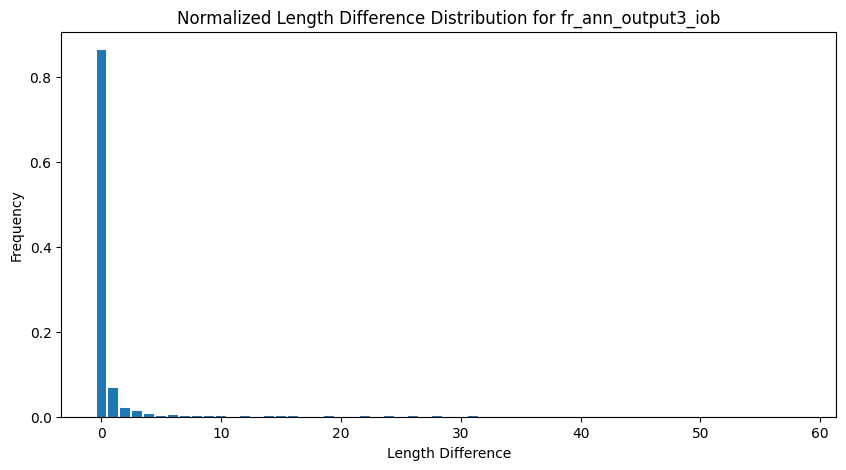

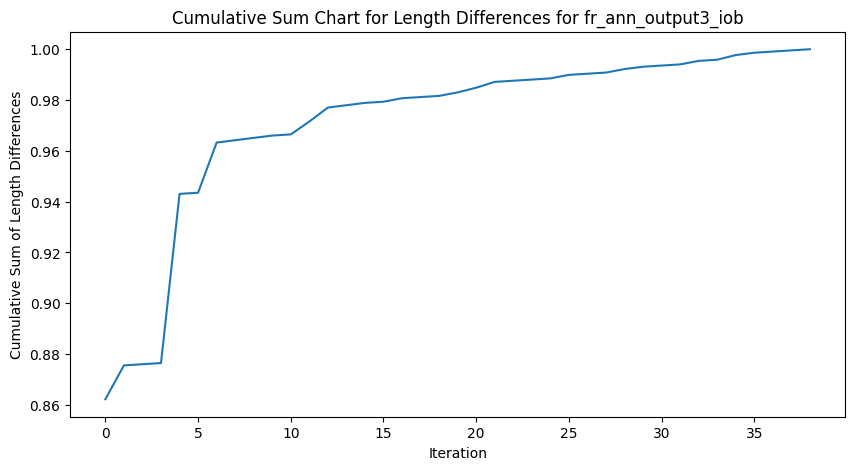

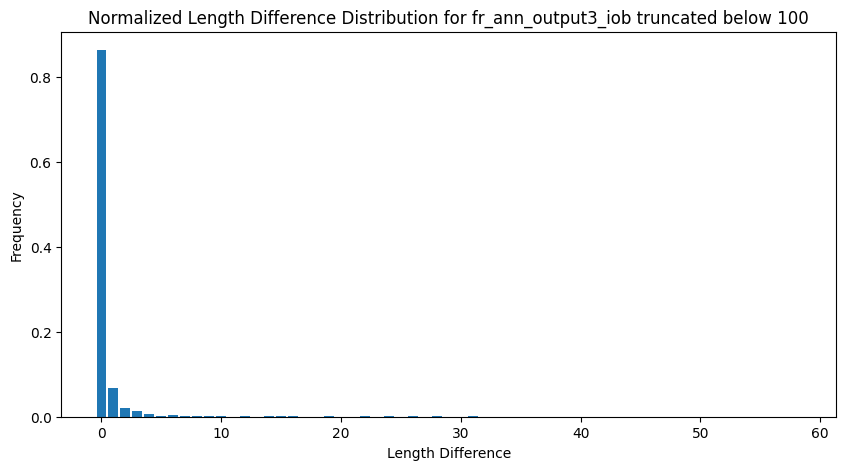

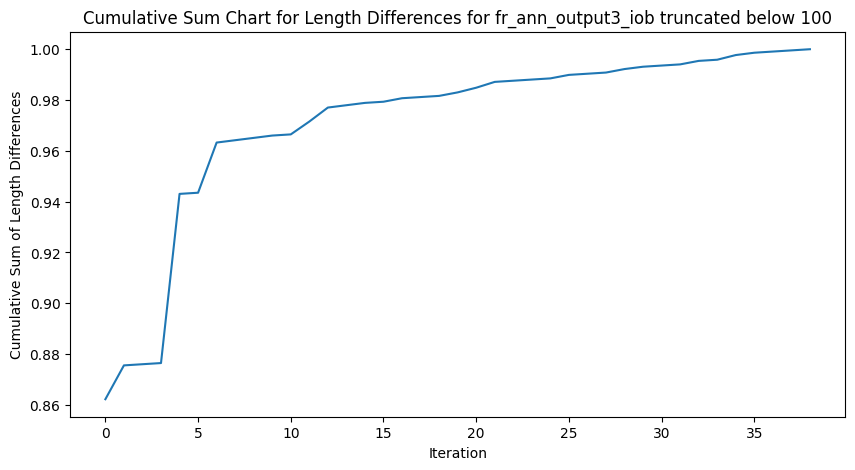

Mean difference for fr_nes_output3_iob, q=None: 1.1226458429030777
Median of the difference for fr_nes_output3_iob, q=None: 0.0


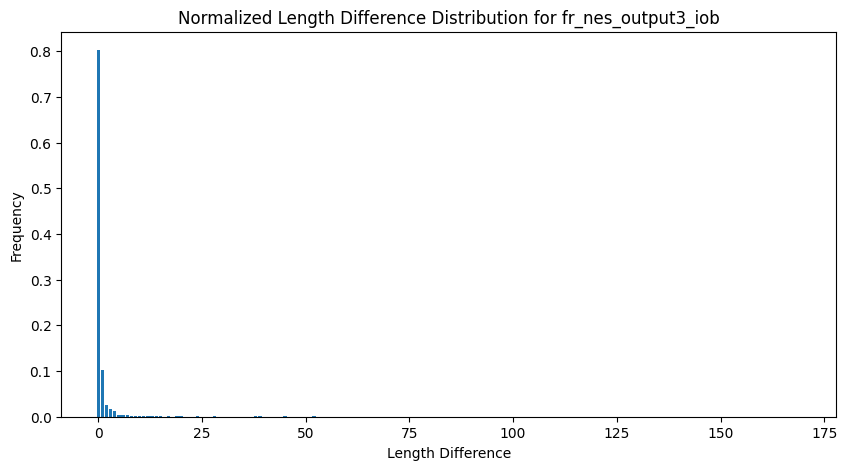

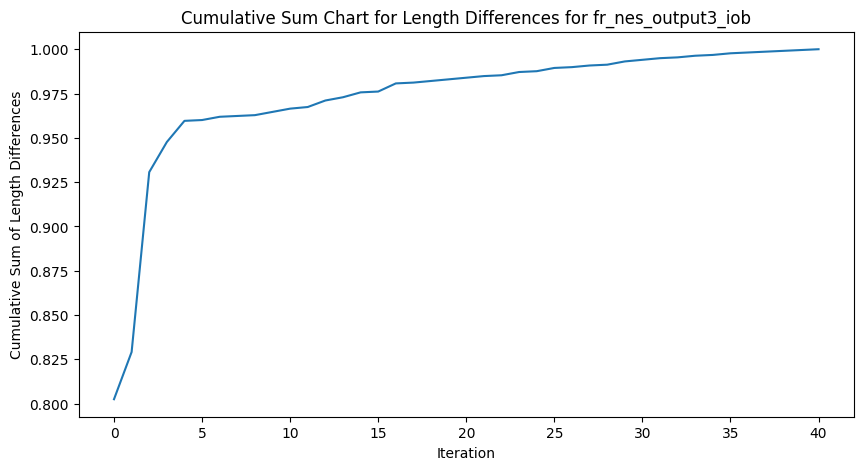

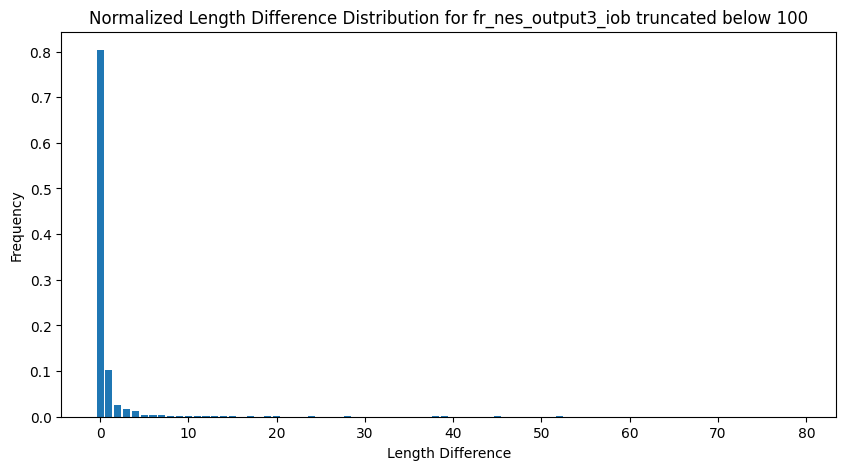

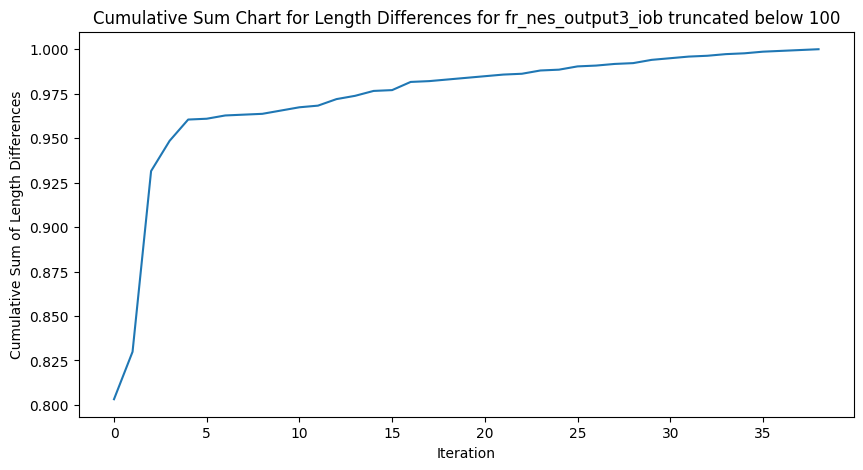

Mean difference for fr_ann_output1, q=0.25: 4.967370441458733
Median of the difference for fr_ann_output1, q=0.25: 4.0


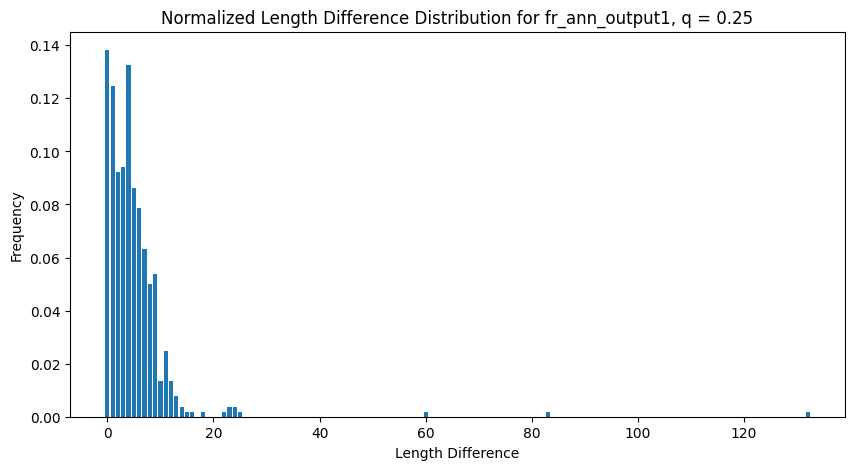

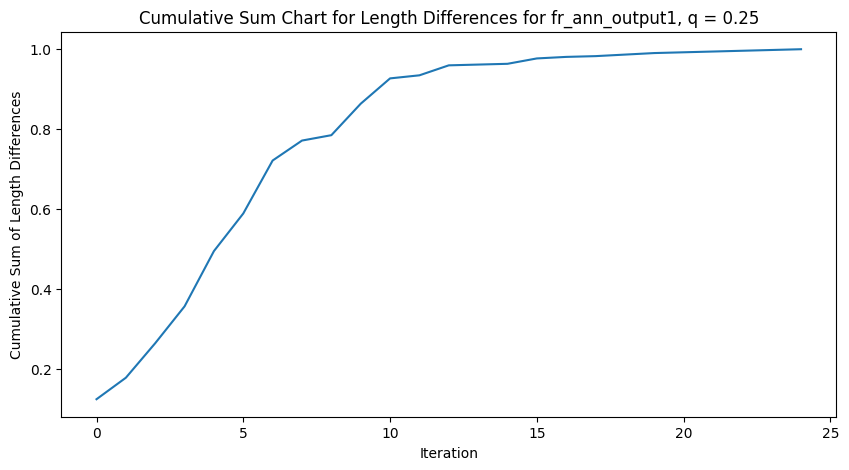

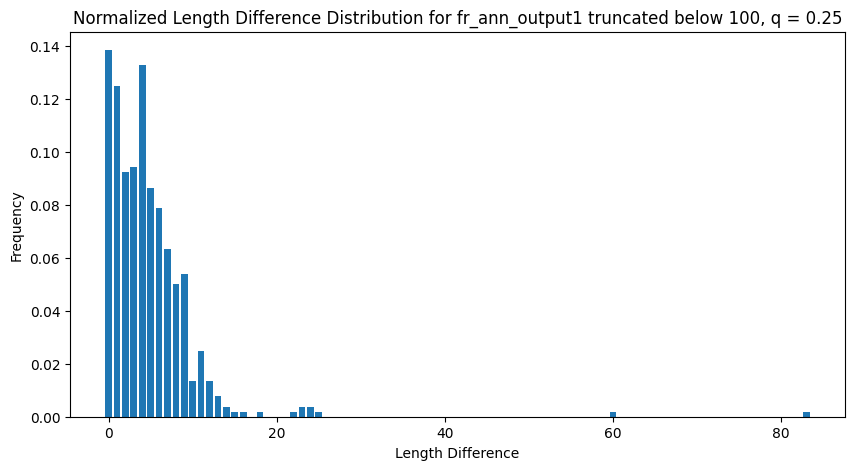

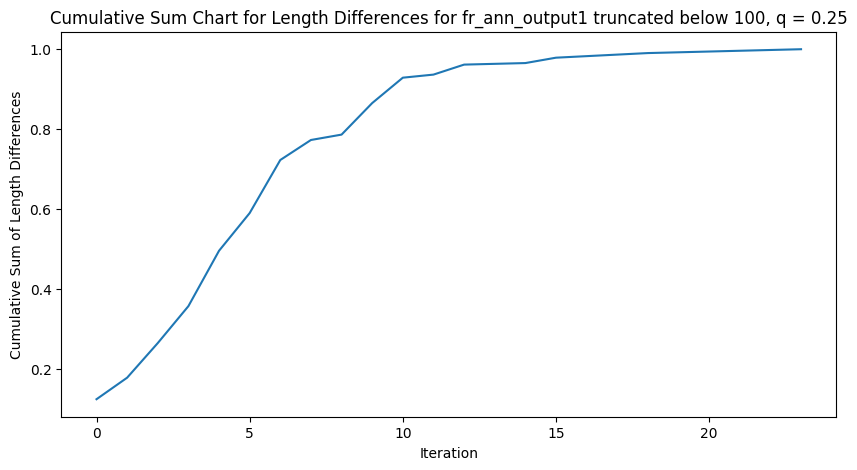

Mean difference for fr_nes_output1, q=0.25: 2.6660268714011517
Median of the difference for fr_nes_output1, q=0.25: 1.0


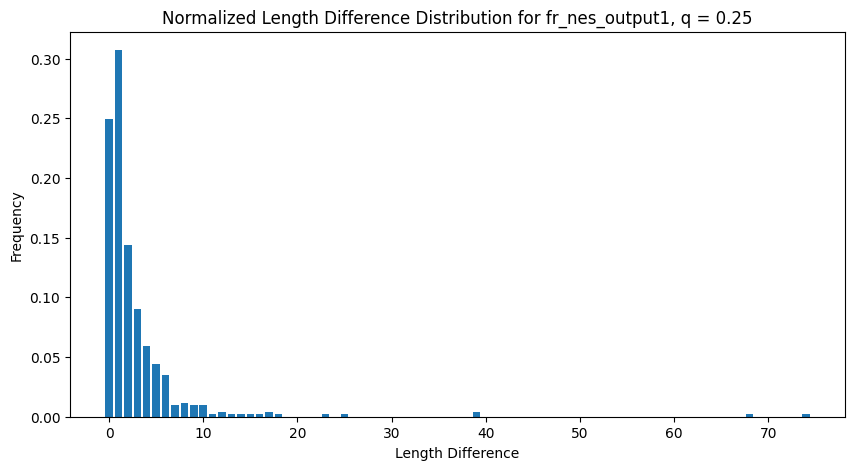

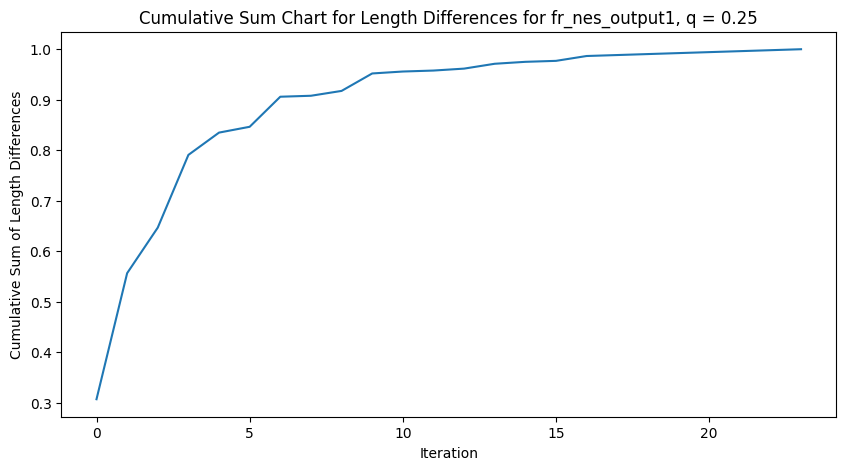

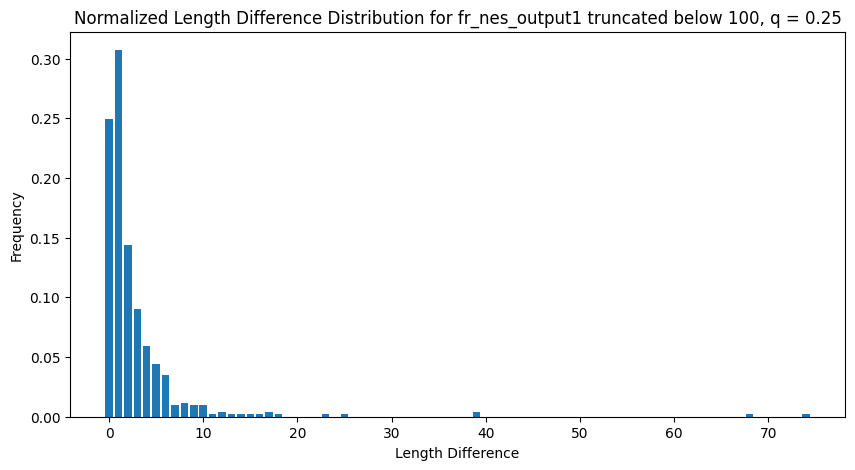

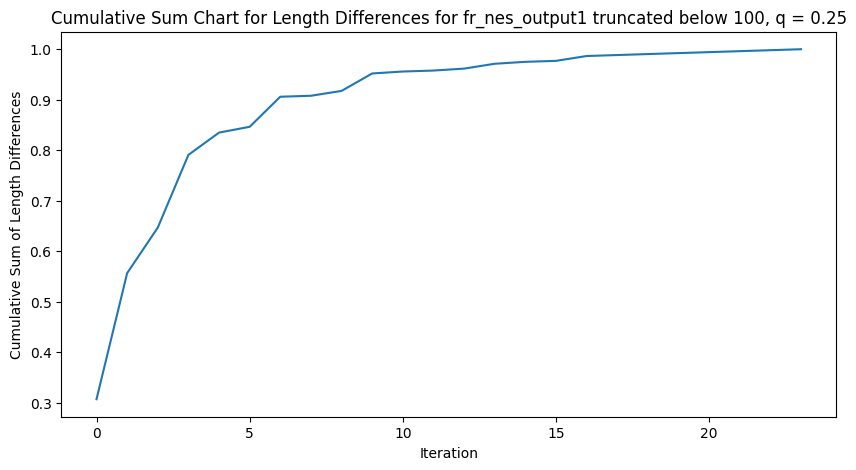

Mean difference for fr_ann_output3_iob, q=0.25: 0.40115163147792704
Median of the difference for fr_ann_output3_iob, q=0.25: 0.0


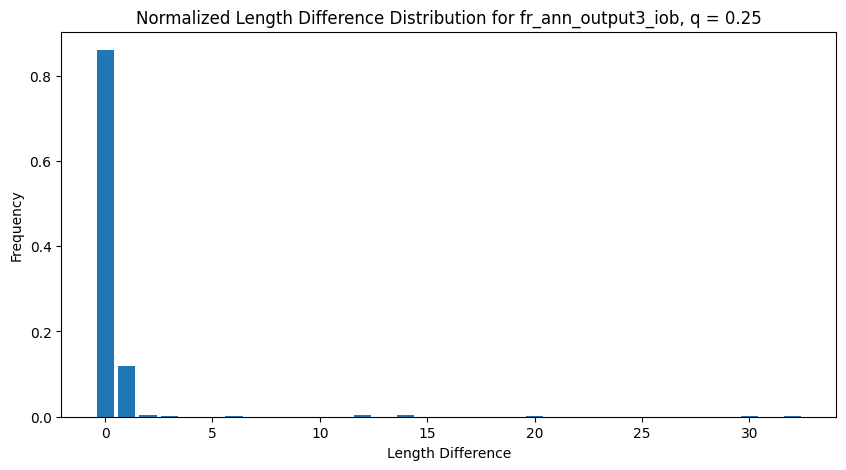

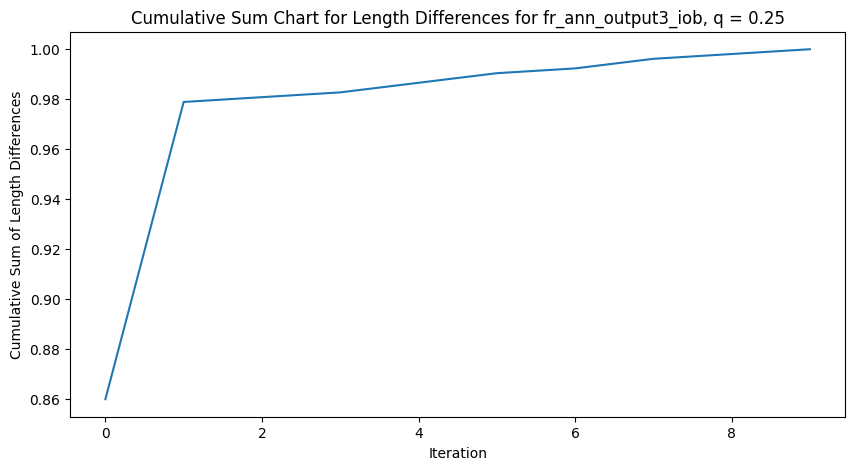

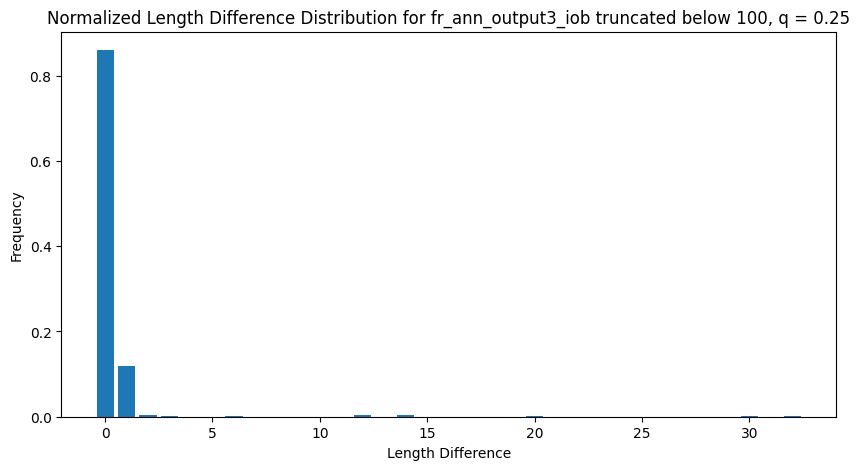

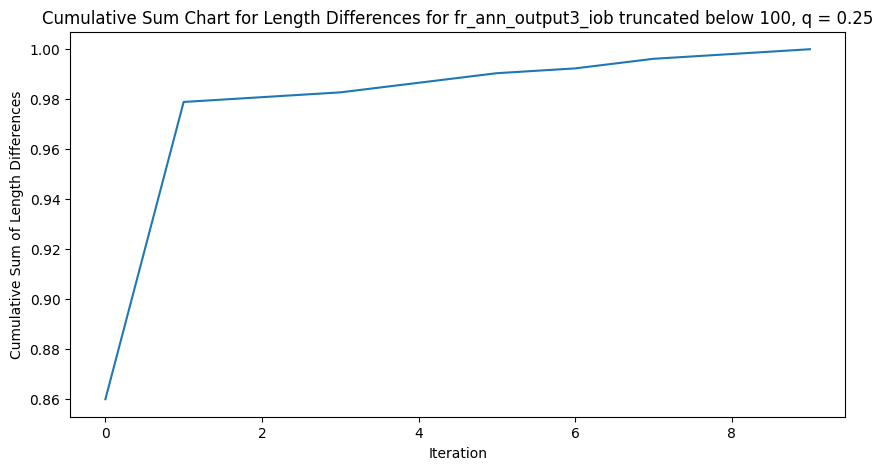

Mean difference for fr_nes_output3_iob, q=0.25: 0.6065259117082533
Median of the difference for fr_nes_output3_iob, q=0.25: 0.0


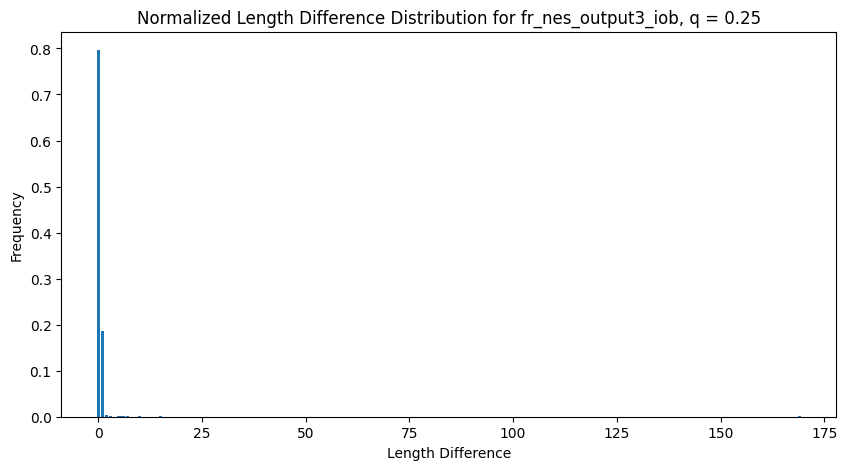

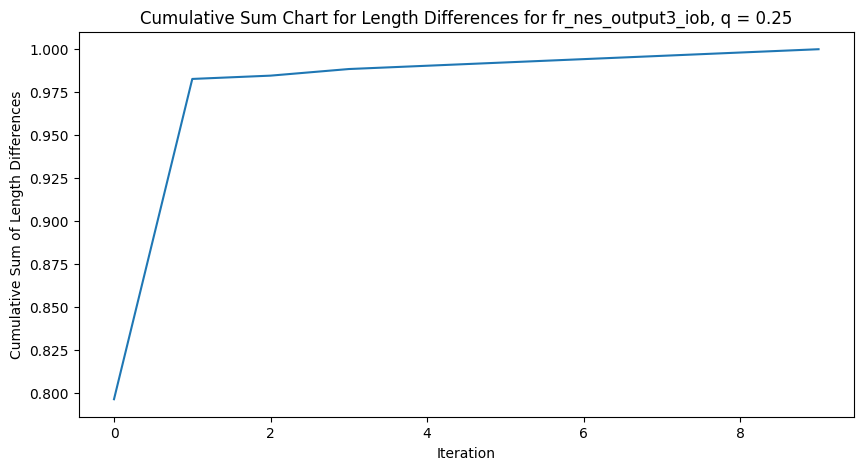

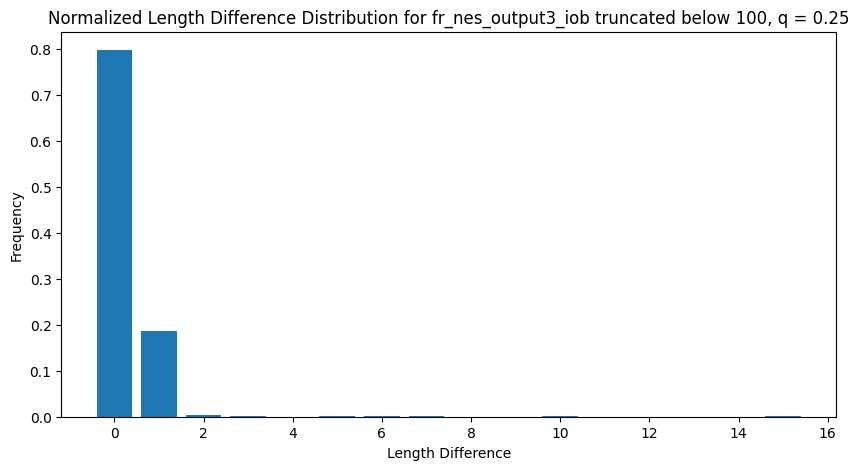

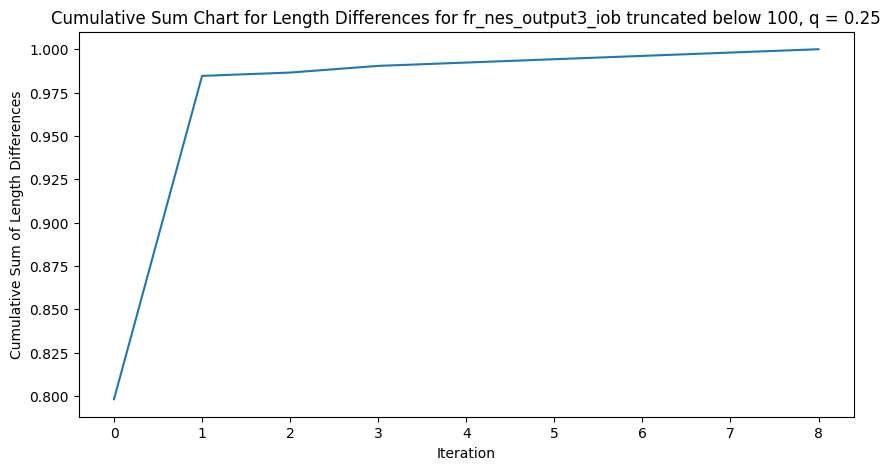

Mean difference for fr_ann_output1, q=0.5: 9.180327868852459
Median of the difference for fr_ann_output1, q=0.5: 7.0


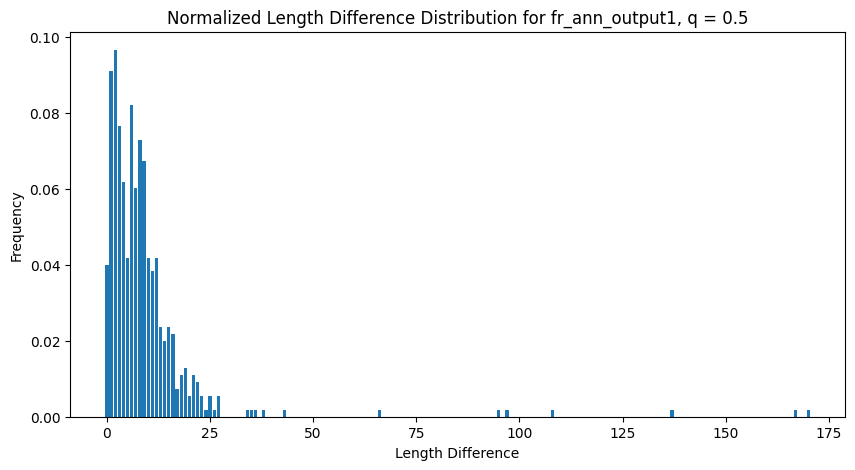

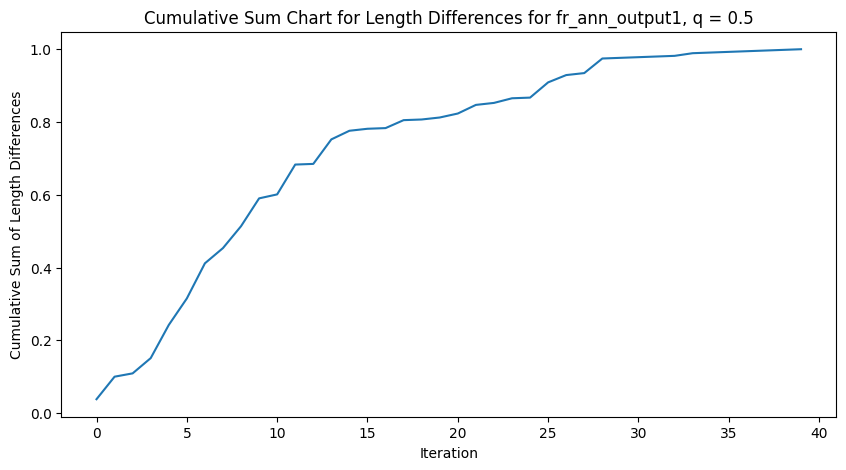

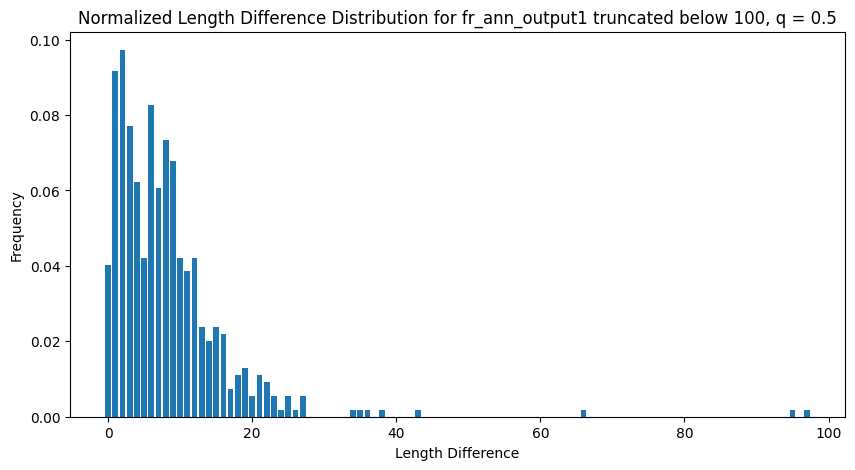

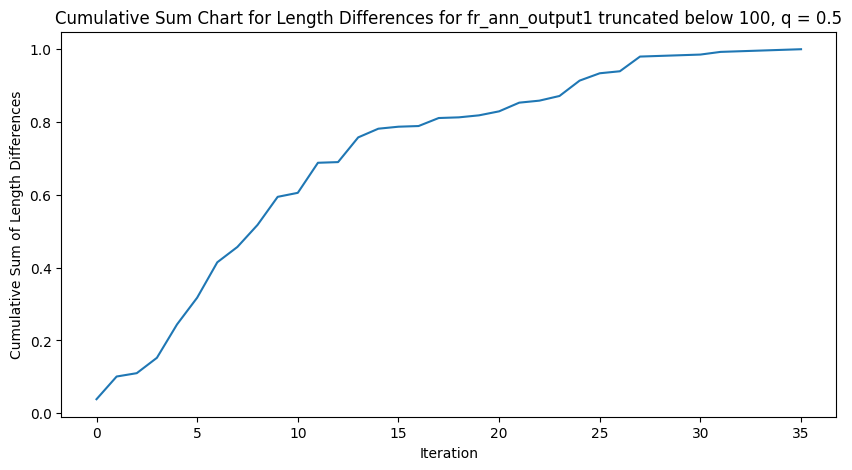

Mean difference for fr_nes_output1, q=0.5: 4.2550091074681236
Median of the difference for fr_nes_output1, q=0.5: 3.0


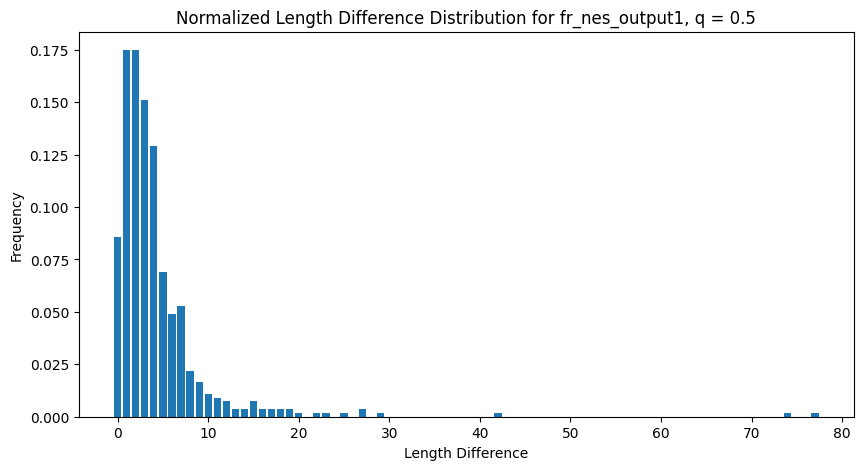

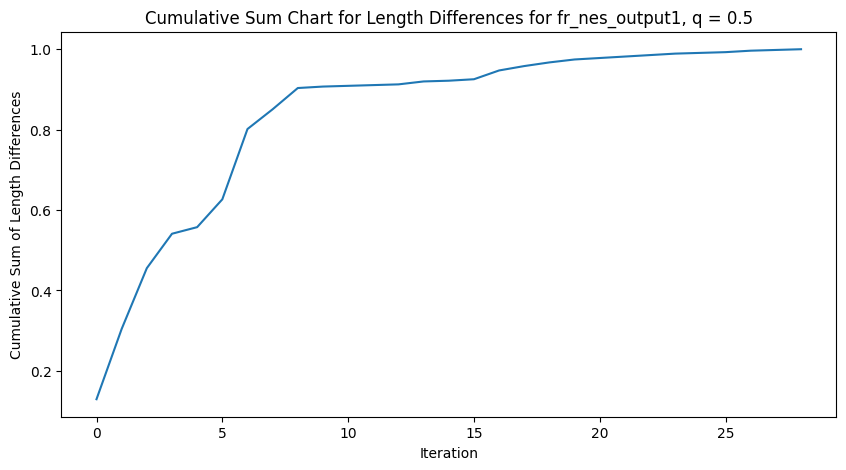

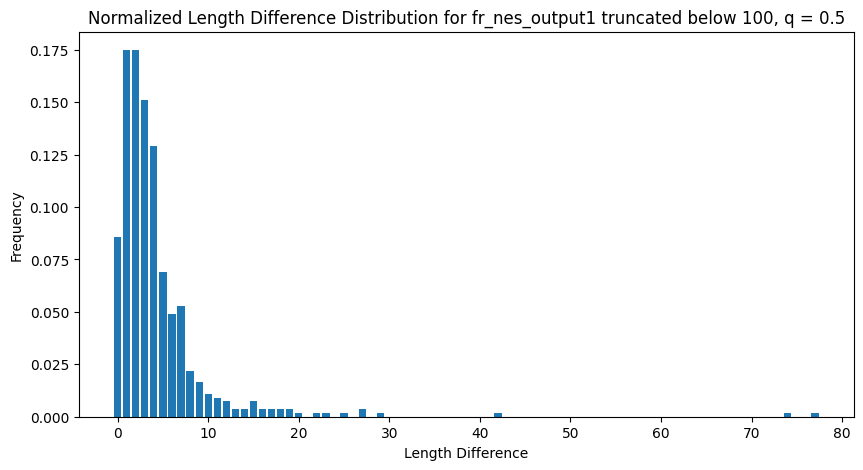

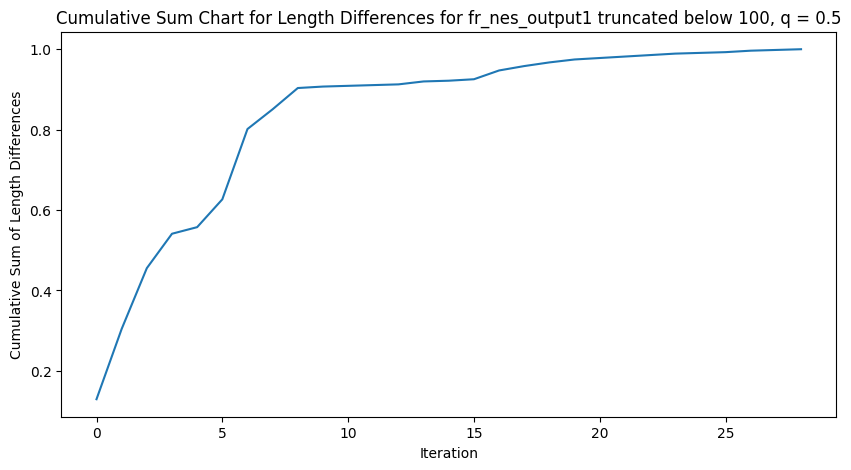

Mean difference for fr_ann_output3_iob, q=0.5: 0.5865209471766849
Median of the difference for fr_ann_output3_iob, q=0.5: 0.0


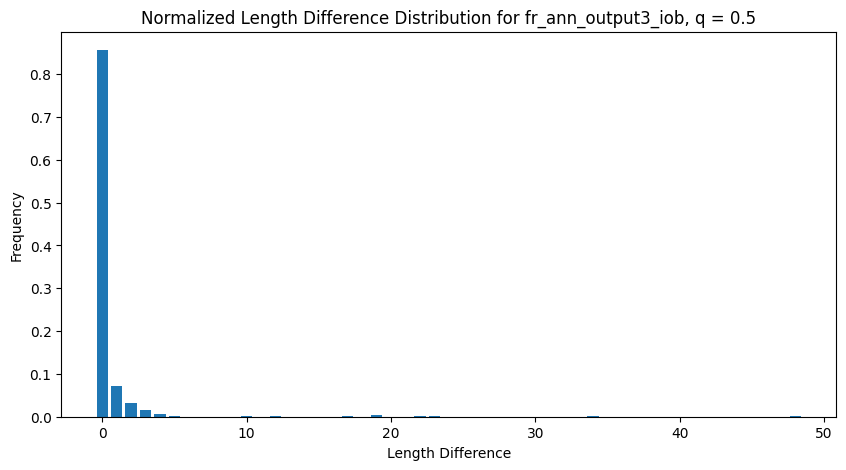

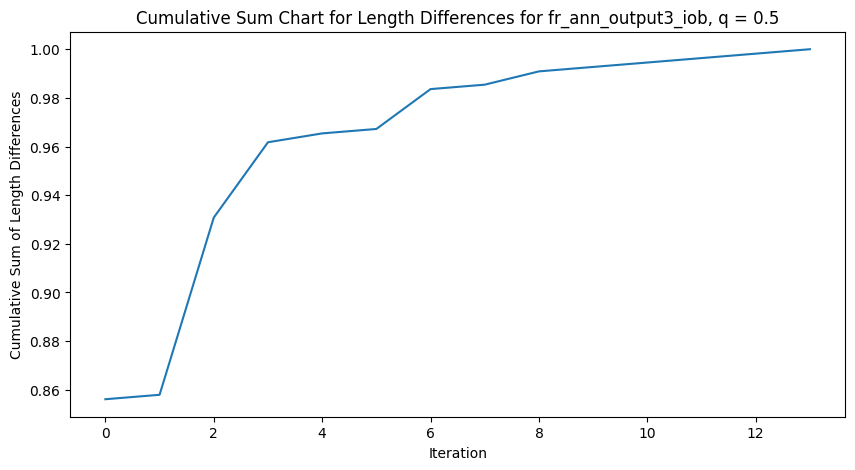

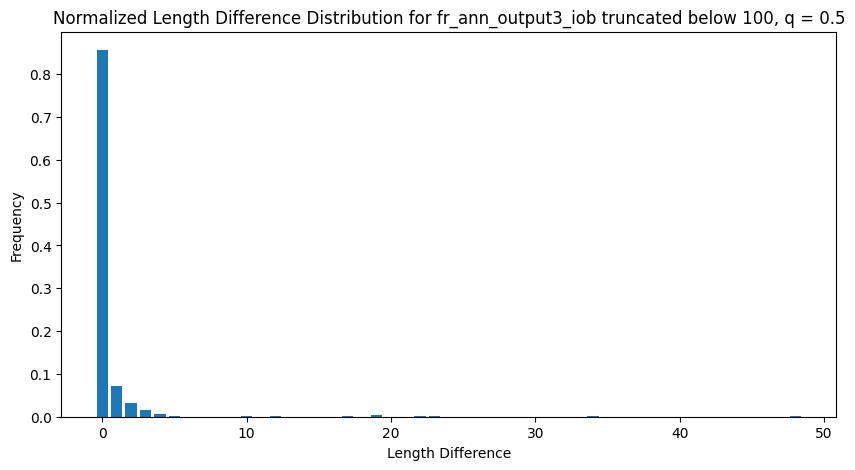

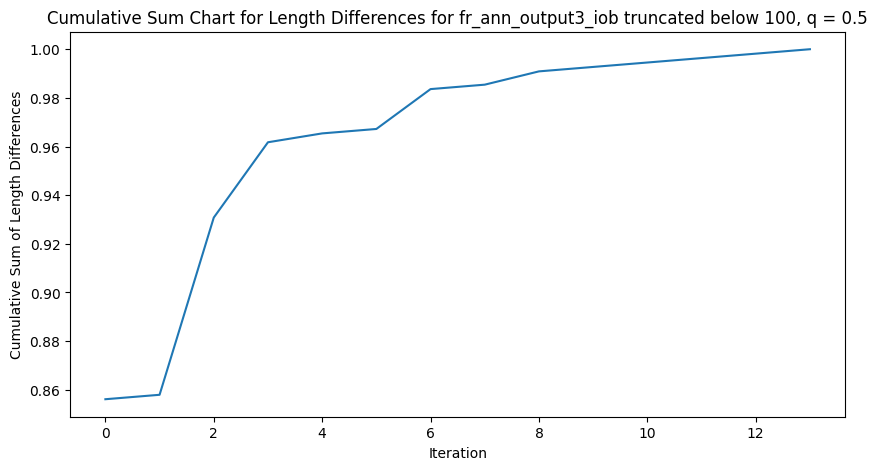

Mean difference for fr_nes_output3_iob, q=0.5: 0.5555555555555556
Median of the difference for fr_nes_output3_iob, q=0.5: 0.0


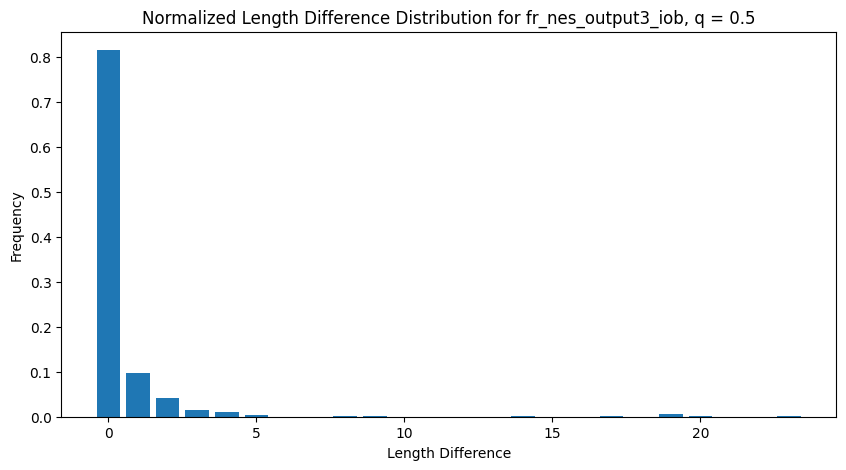

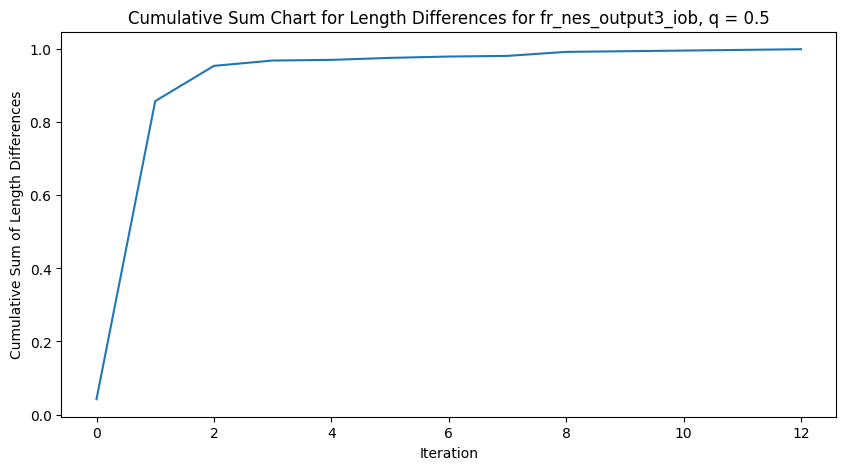

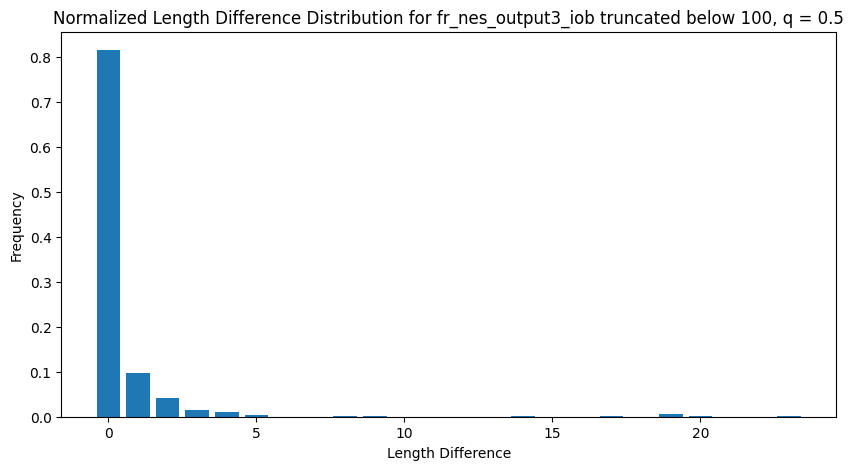

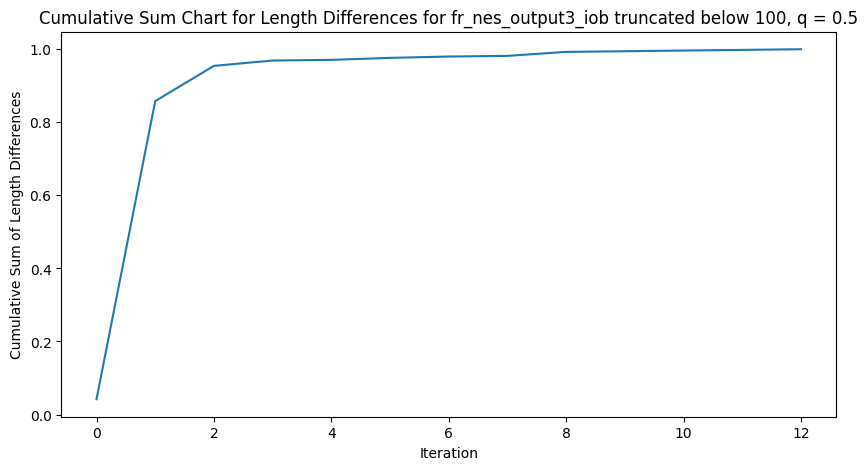

Mean difference for fr_ann_output1, q=0.75: 14.007407407407408
Median of the difference for fr_ann_output1, q=0.75: 7.0


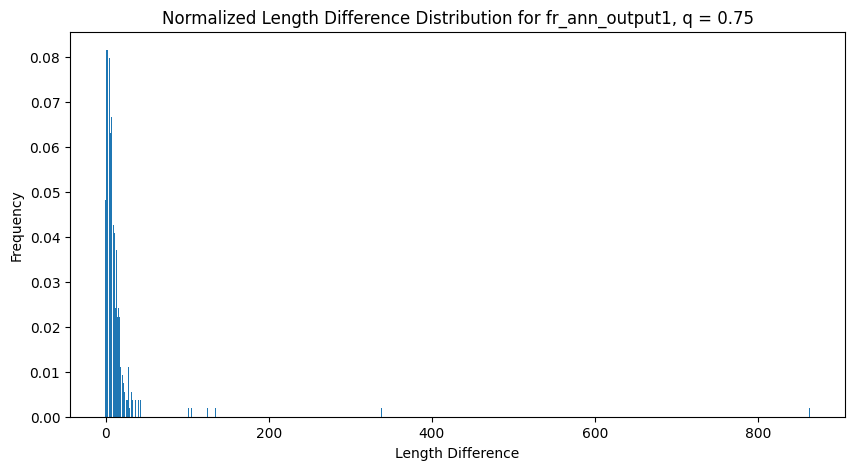

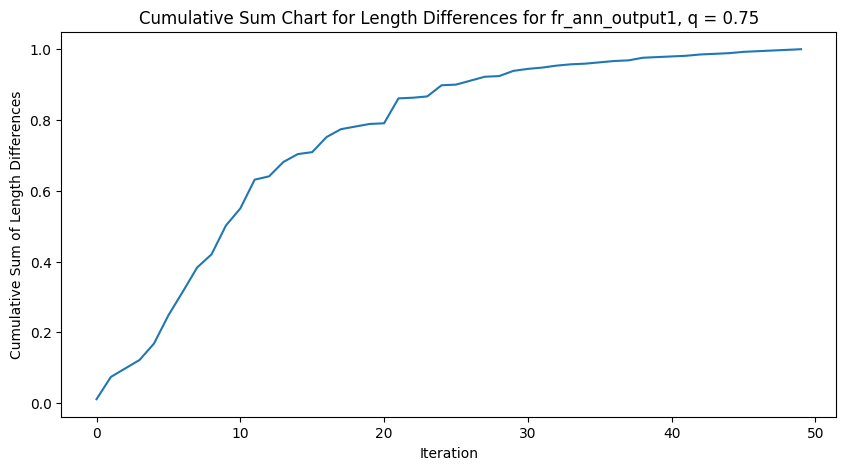

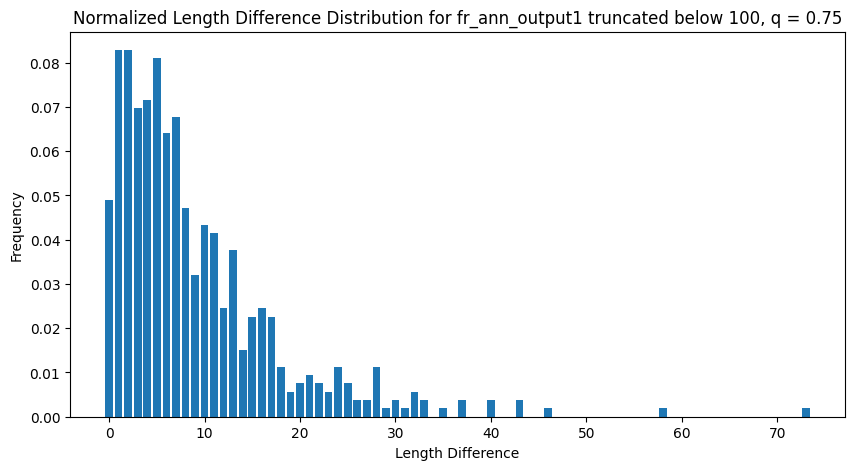

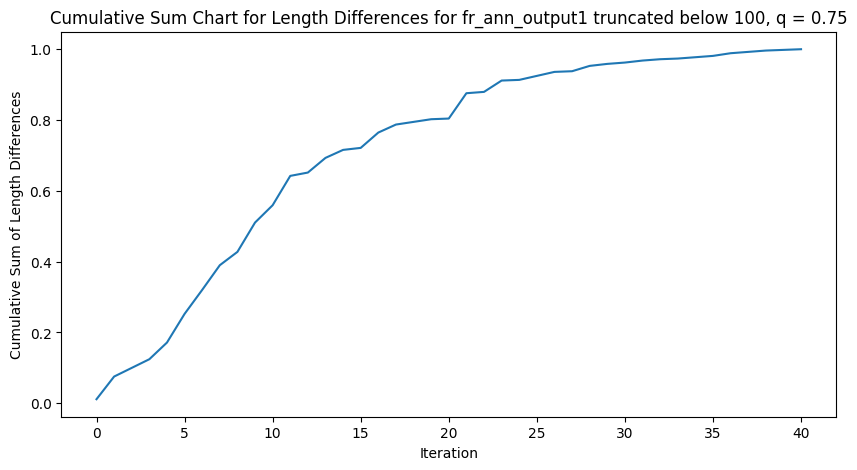

Mean difference for fr_nes_output1, q=0.75: 8.161111111111111
Median of the difference for fr_nes_output1, q=0.75: 5.0


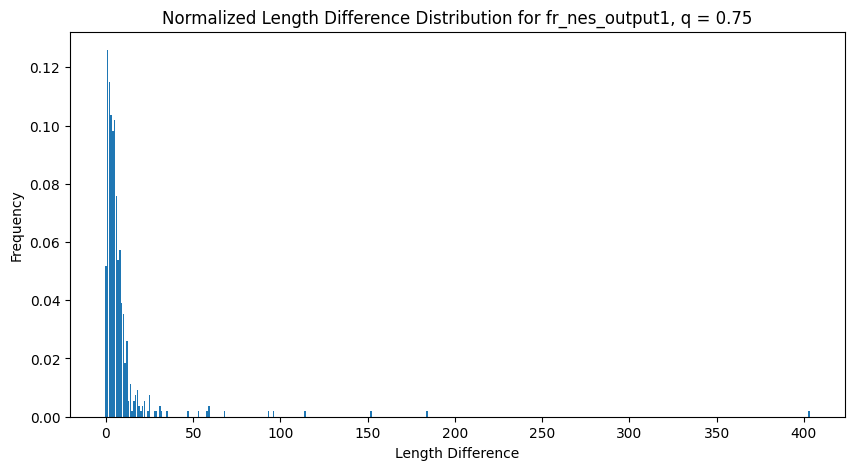

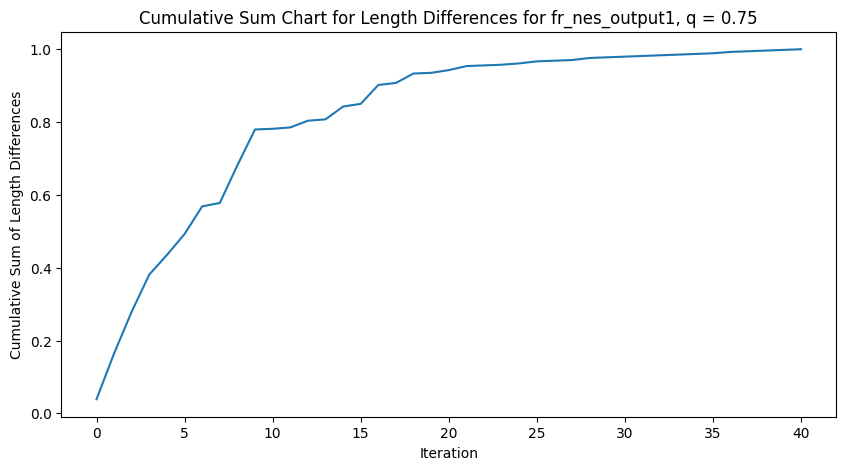

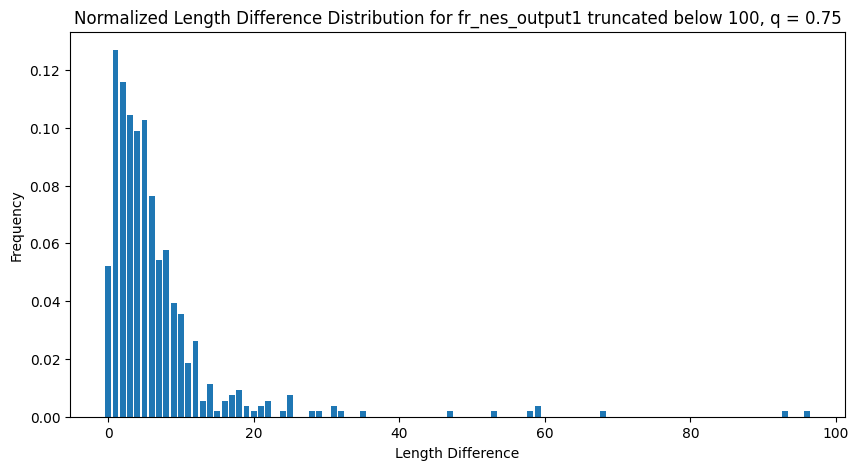

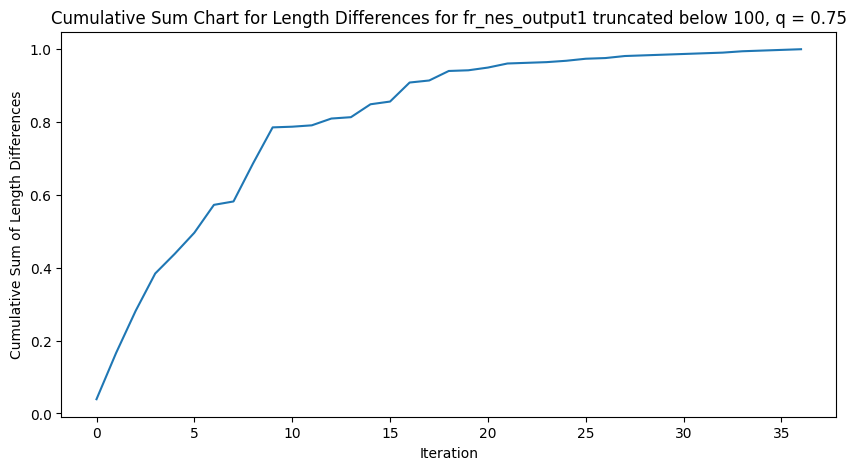

Mean difference for fr_ann_output3_iob, q=0.75: 0.8629629629629629
Median of the difference for fr_ann_output3_iob, q=0.75: 0.0


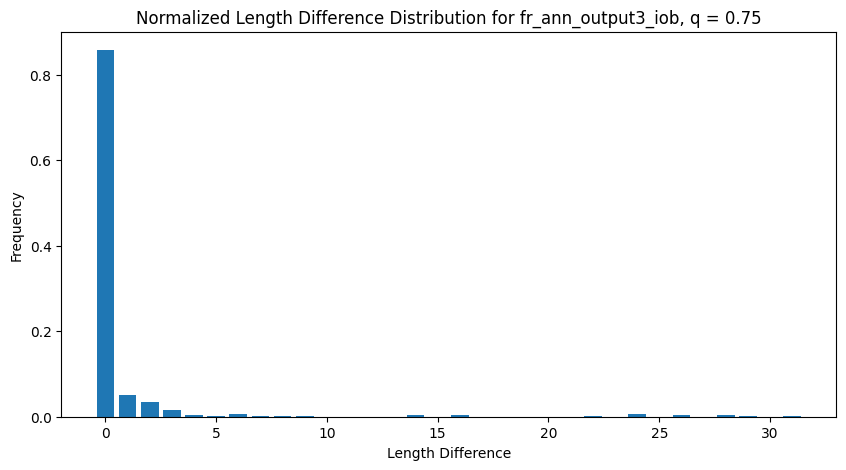

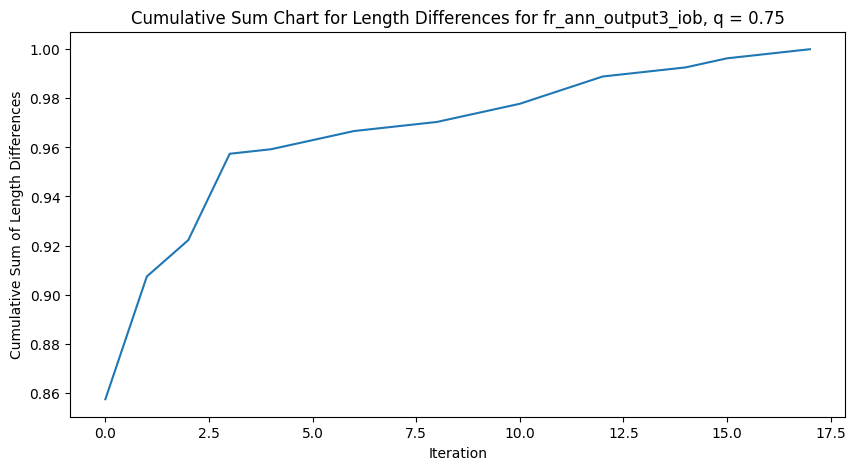

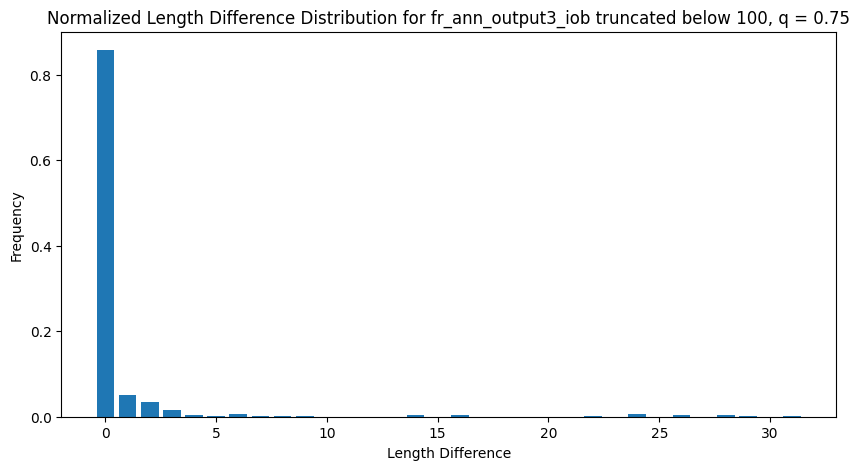

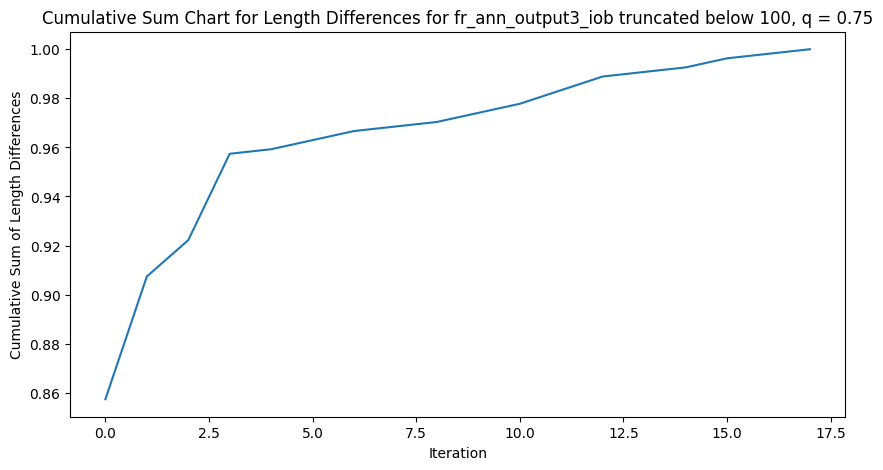

Mean difference for fr_nes_output3_iob, q=0.75: 1.0055555555555555
Median of the difference for fr_nes_output3_iob, q=0.75: 0.0


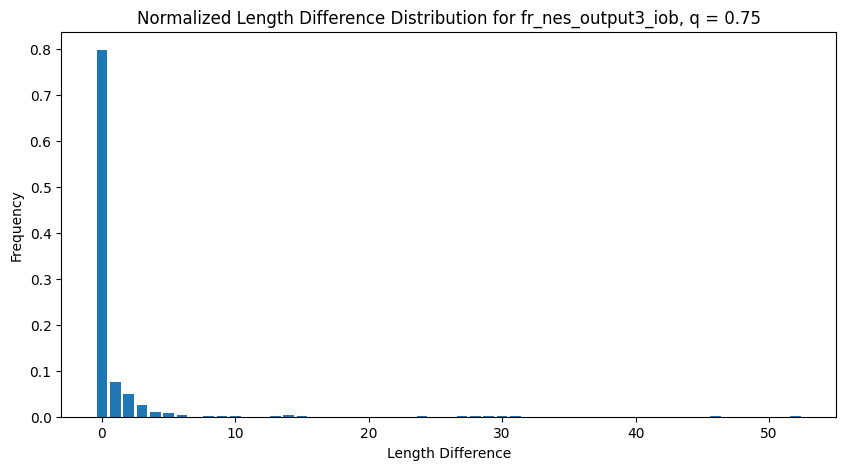

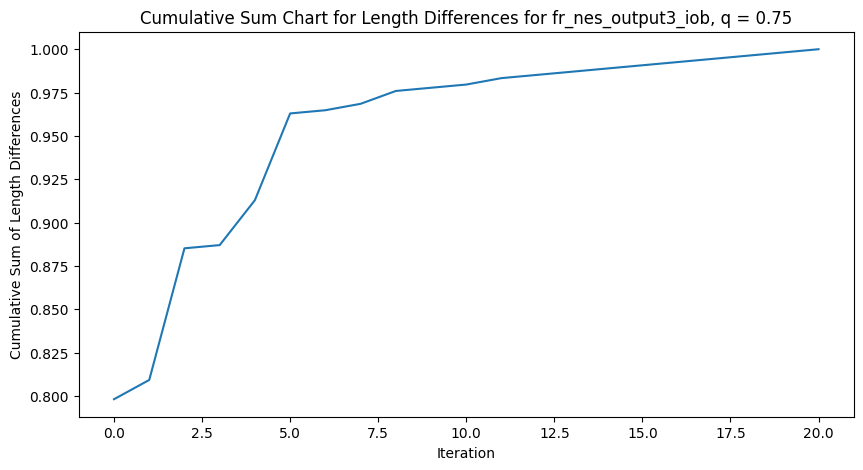

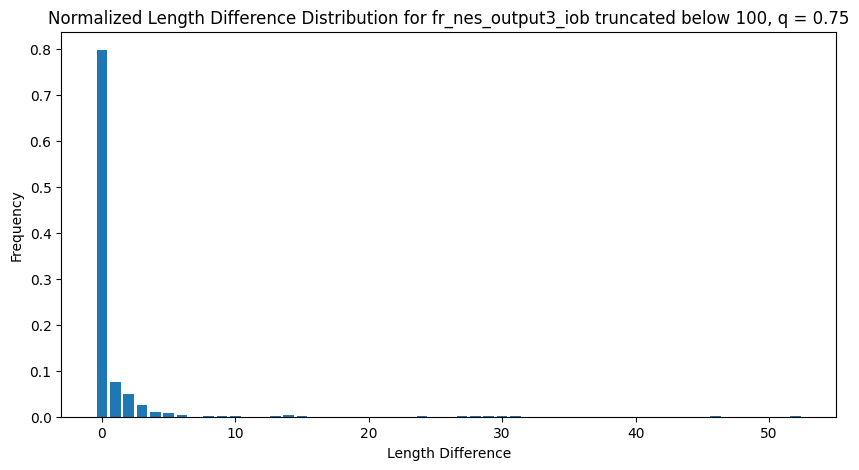

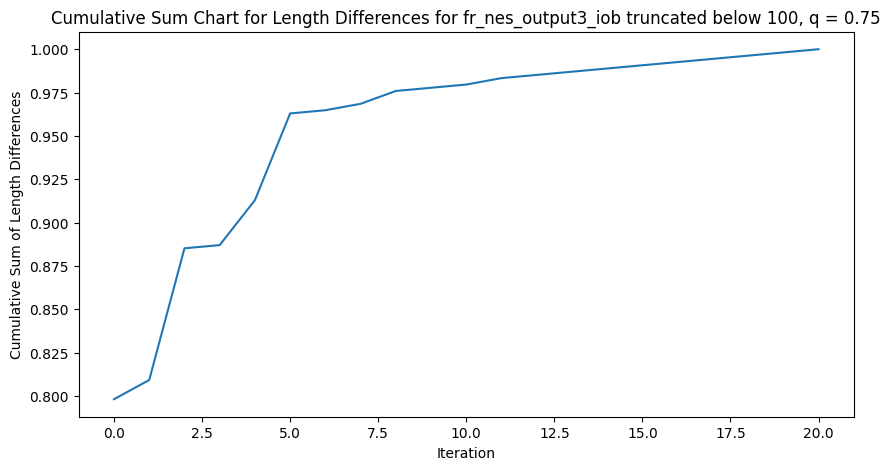

Mean difference for fr_ann_output1, q=1: 42.26678445229682
Median of the difference for fr_ann_output1, q=1: 10.0


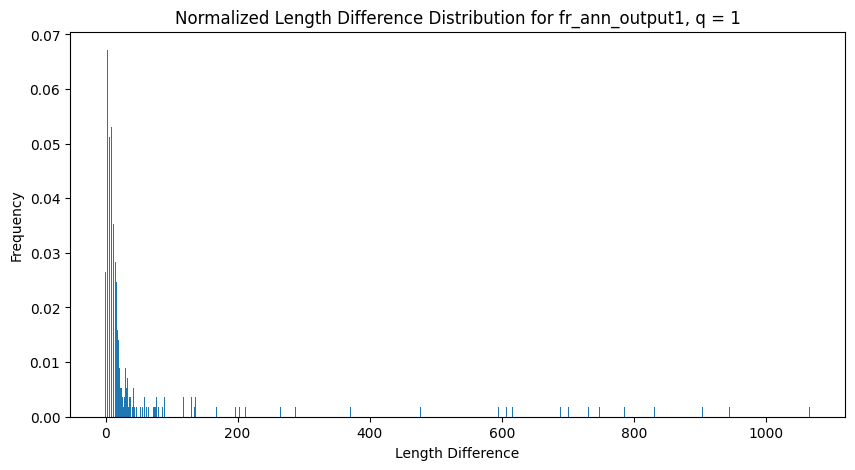

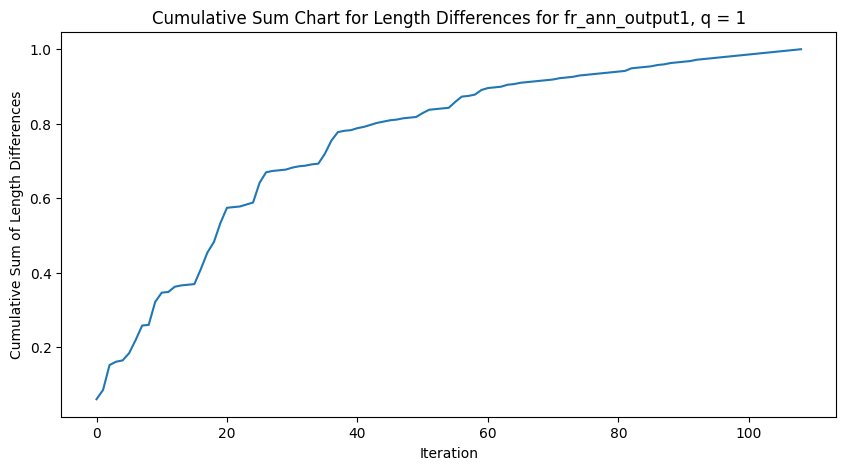

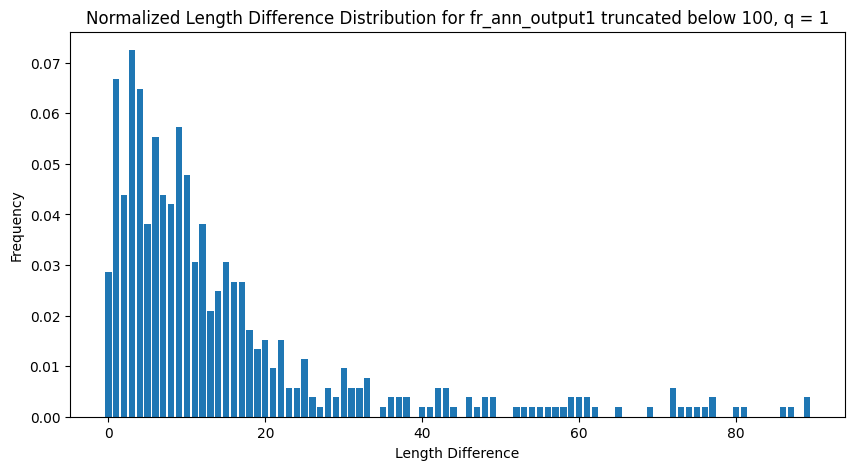

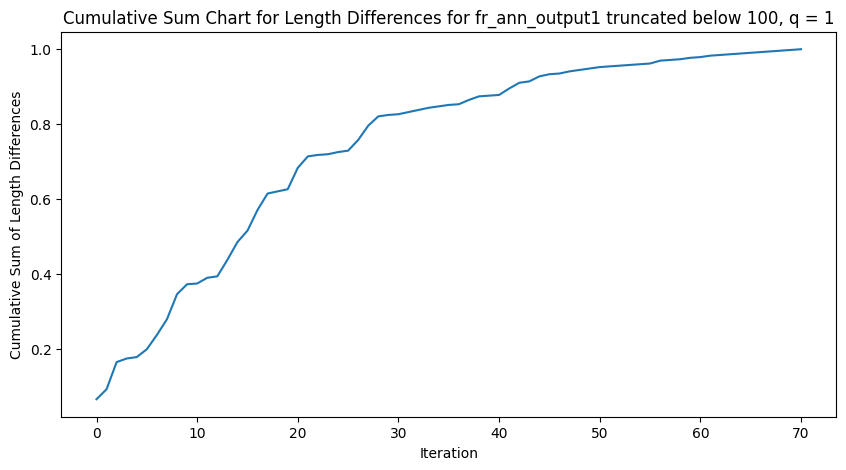

Mean difference for fr_nes_output1, q=1: 43.590106007067135
Median of the difference for fr_nes_output1, q=1: 9.5


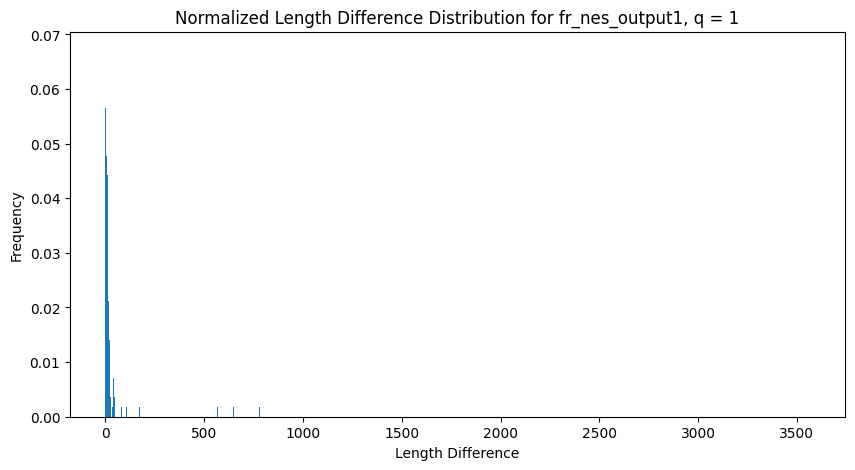

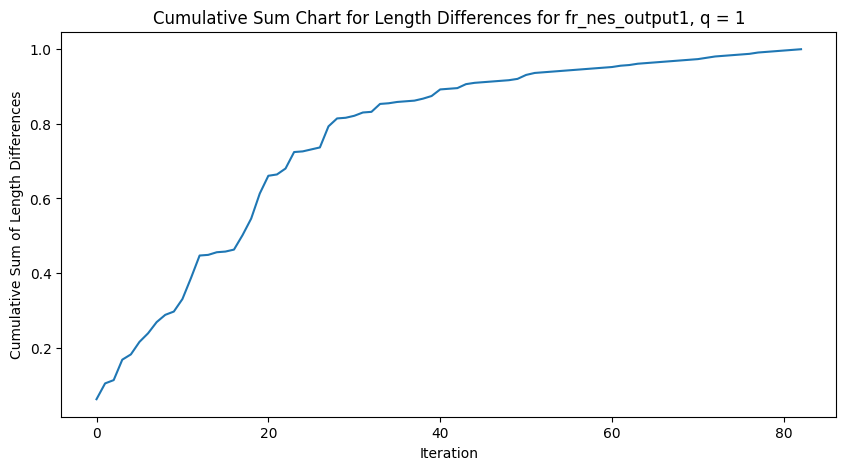

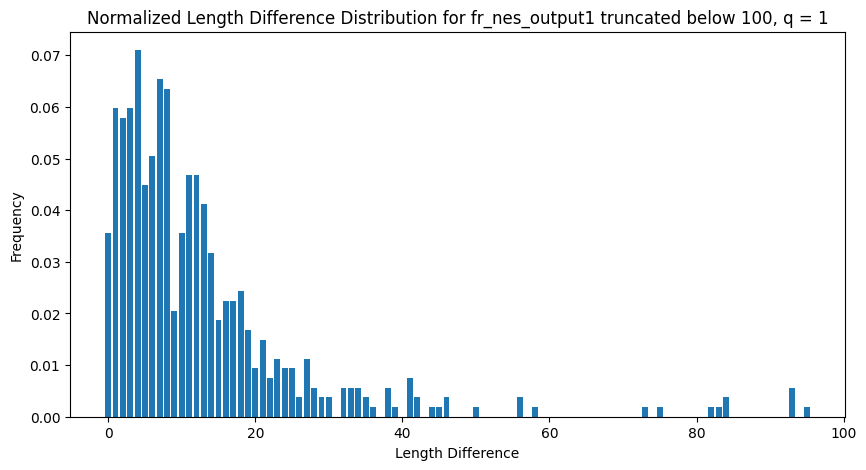

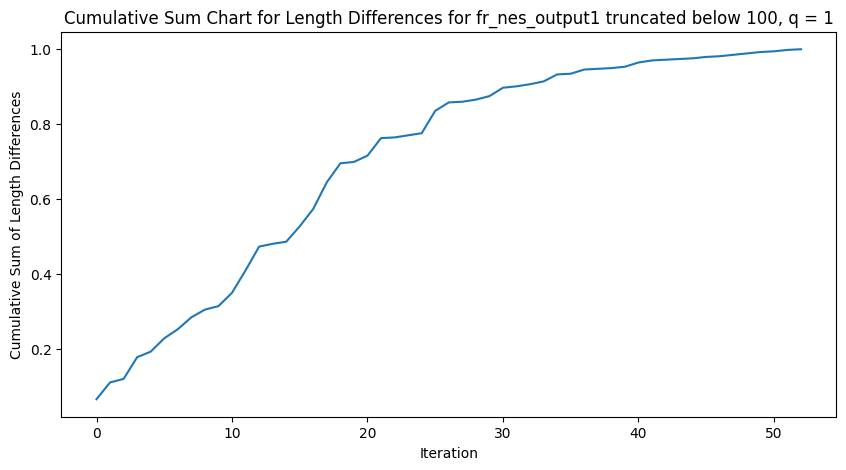

Mean difference for fr_ann_output3_iob, q=1: 1.3498233215547704
Median of the difference for fr_ann_output3_iob, q=1: 0.0


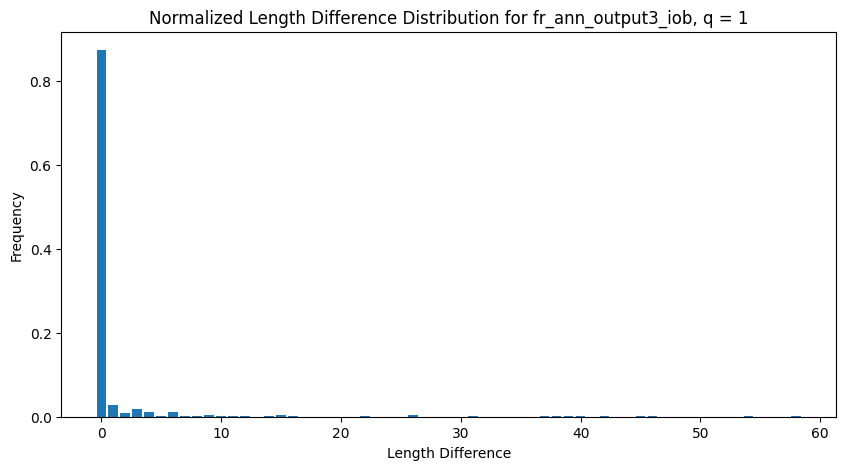

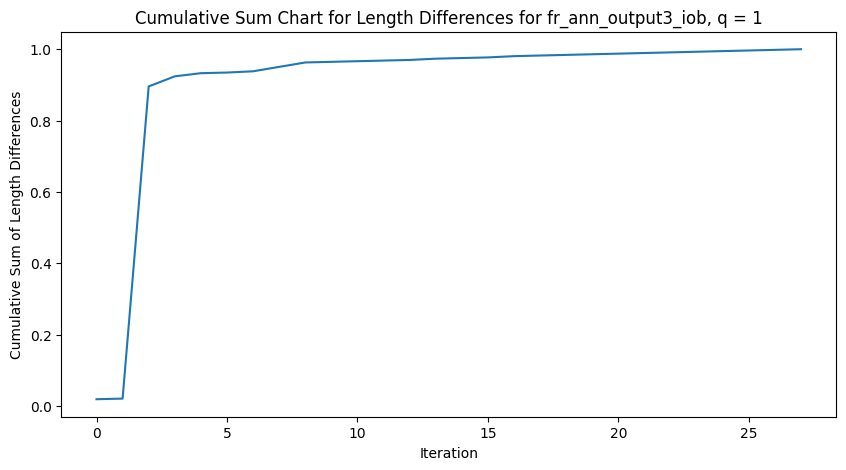

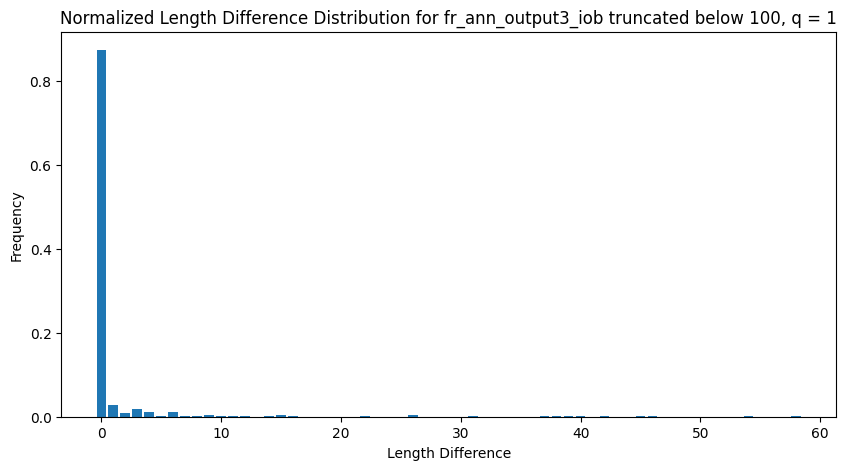

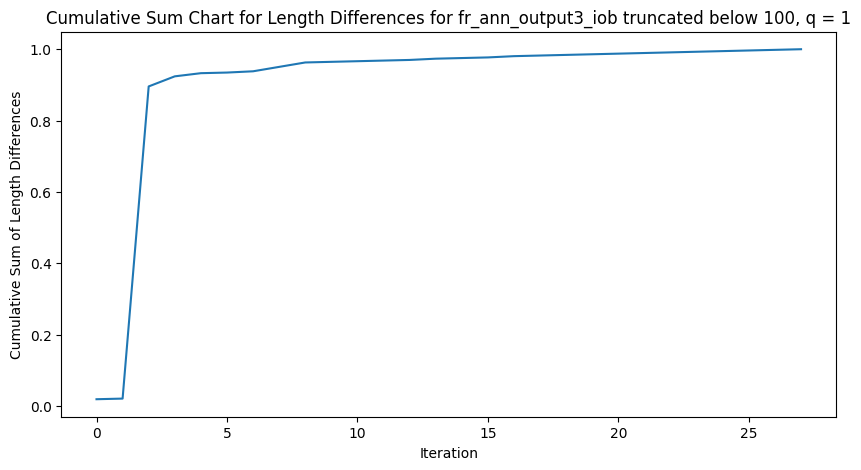

Mean difference for fr_nes_output3_iob, q=1: 2.2614840989399294
Median of the difference for fr_nes_output3_iob, q=1: 0.0


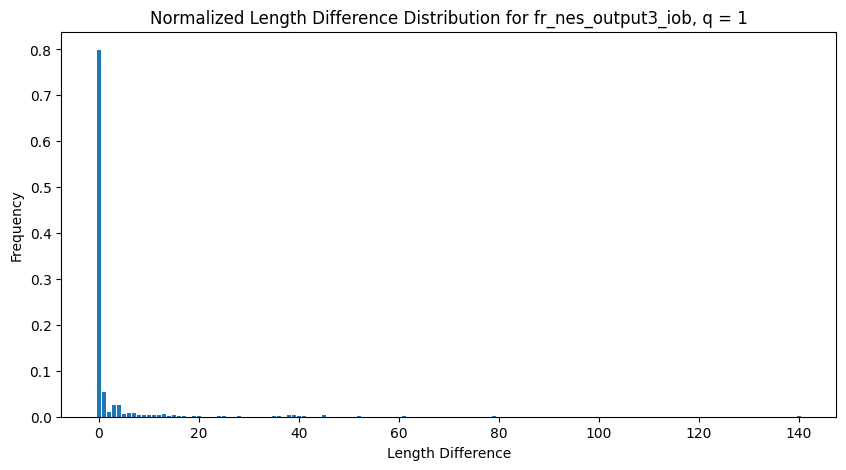

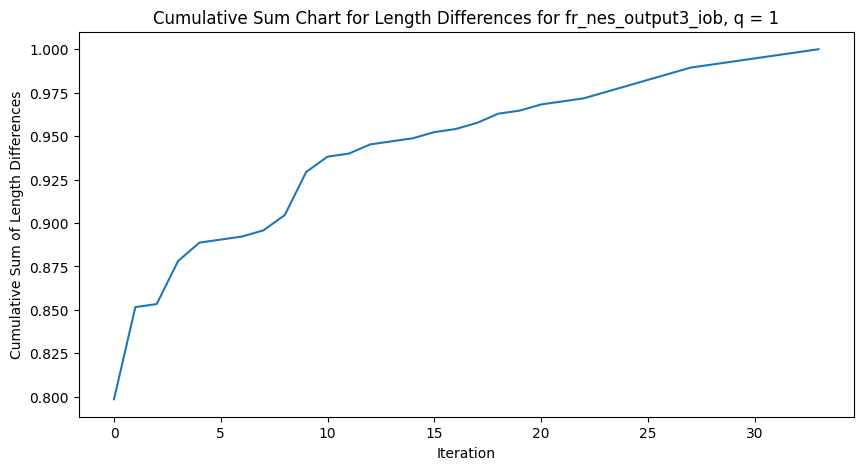

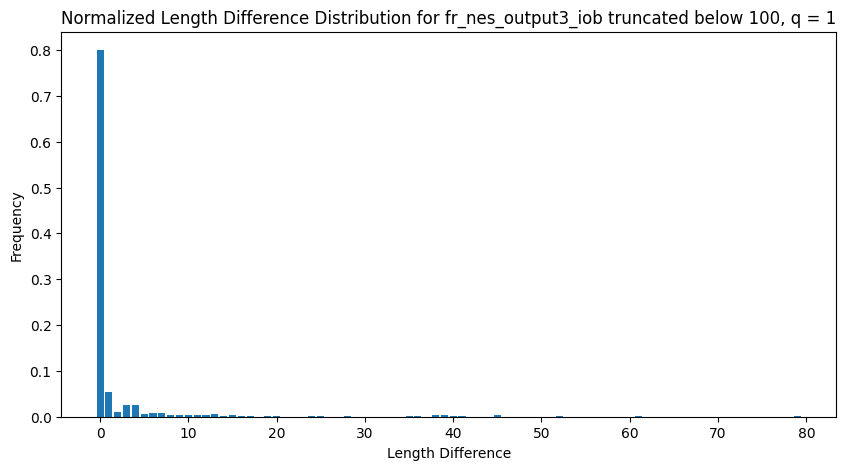

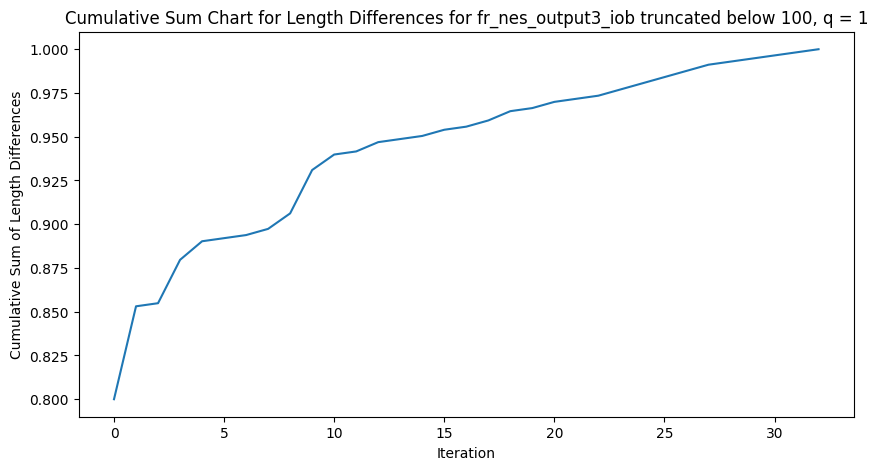

Mean difference for nl_ann_output1, q=None: 5.742797639708434
Median of the difference for nl_ann_output1, q=None: 3.0


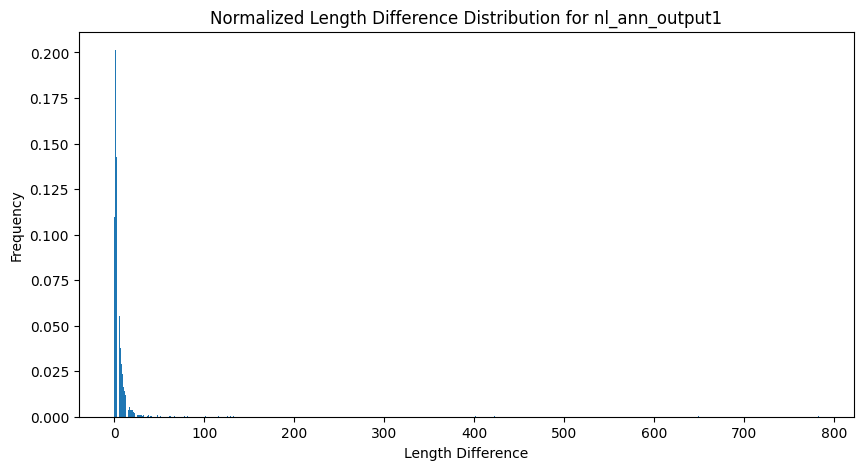

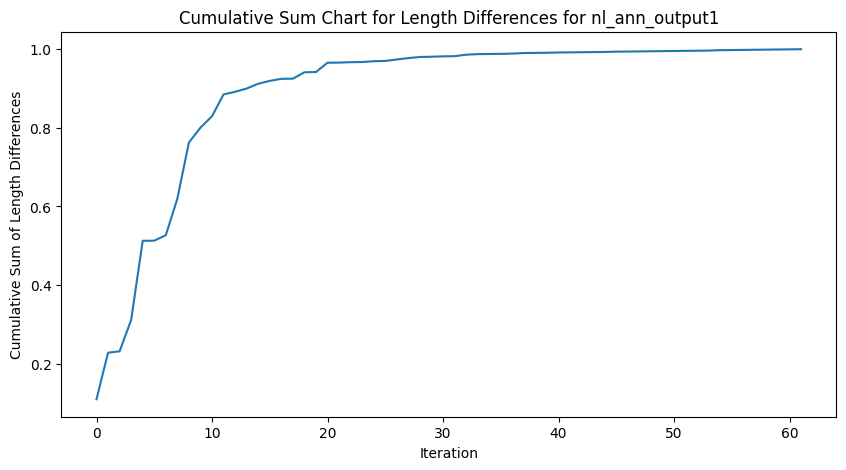

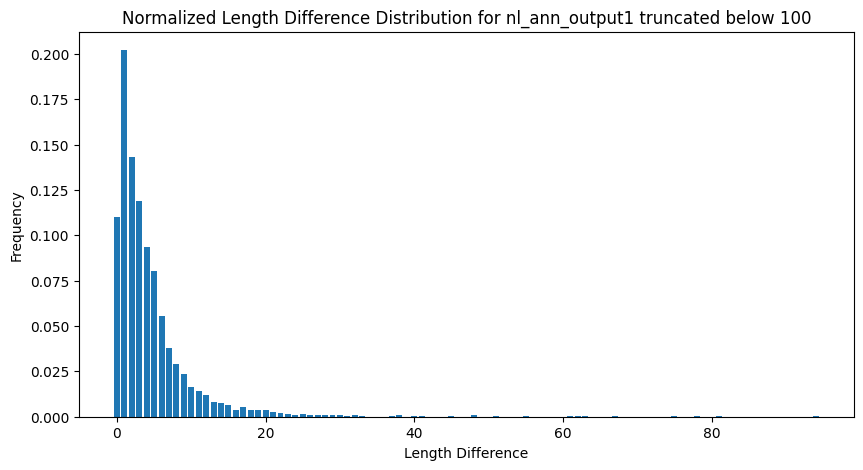

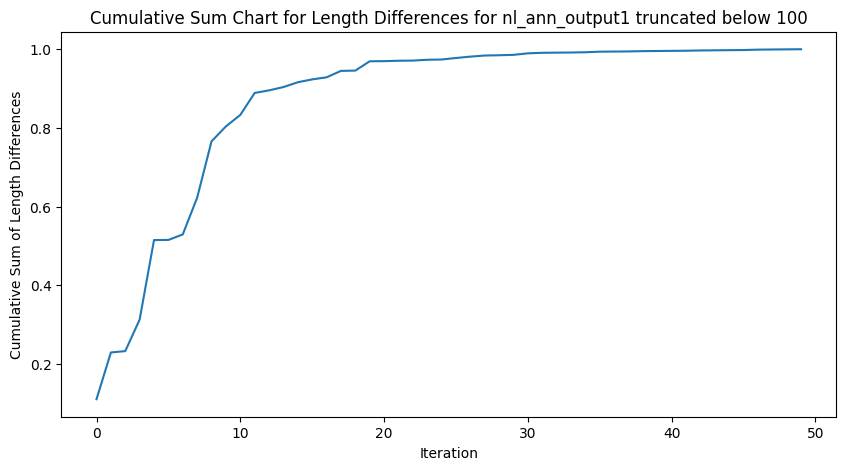

Mean difference for nl_nes_output1, q=None: 5.382158972578965
Median of the difference for nl_nes_output1, q=None: 3.0


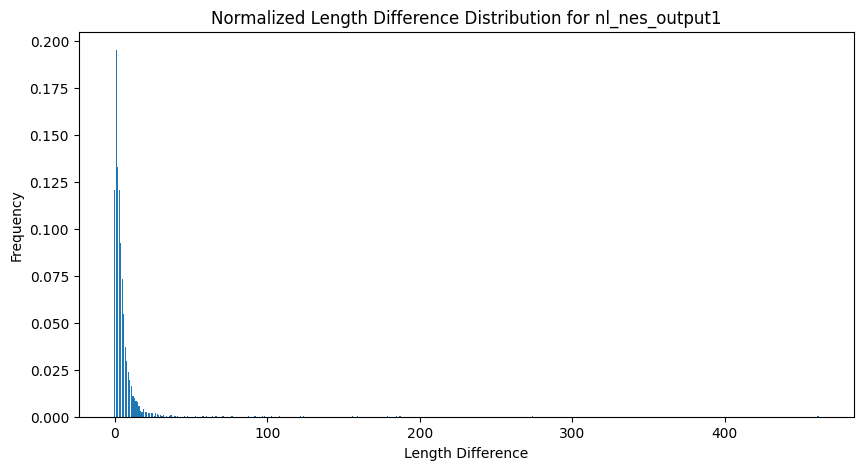

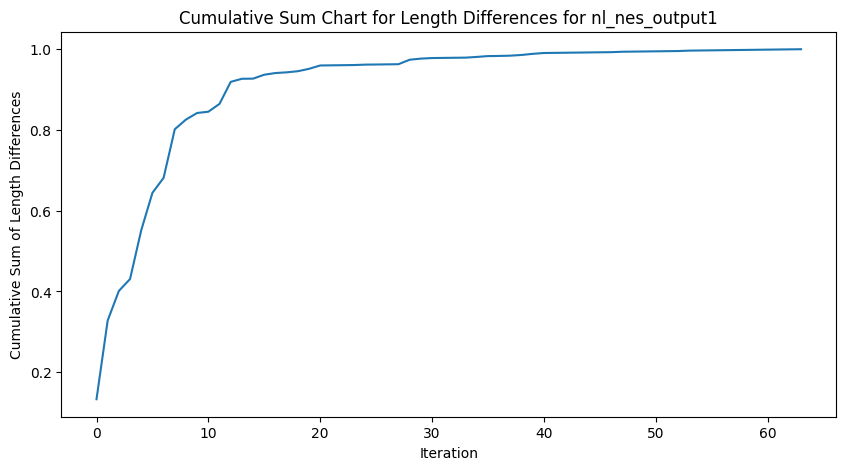

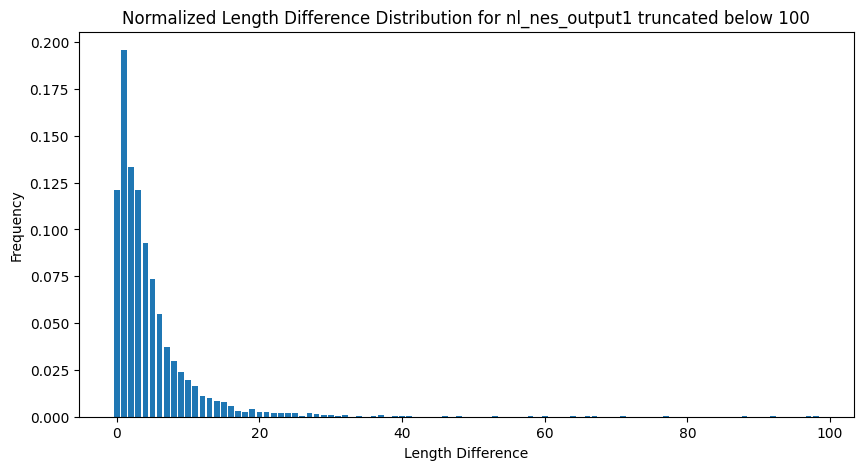

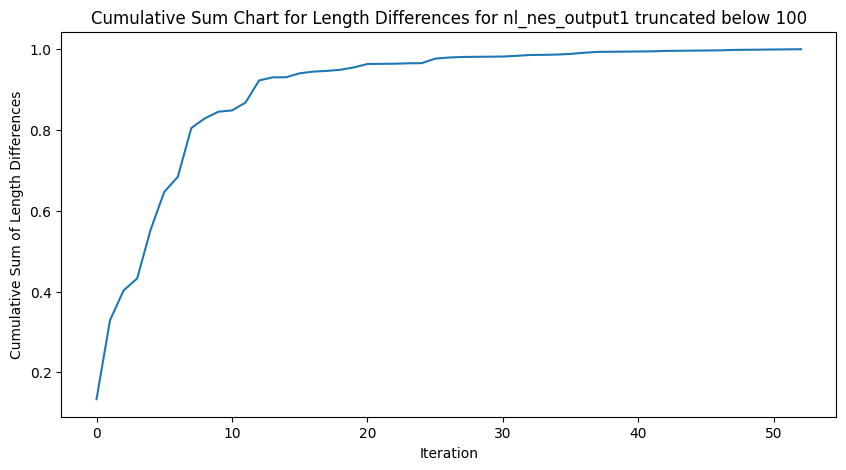

Mean difference for nl_ann_output3_iob, q=None: 0.4397778549114891
Median of the difference for nl_ann_output3_iob, q=None: 0.0


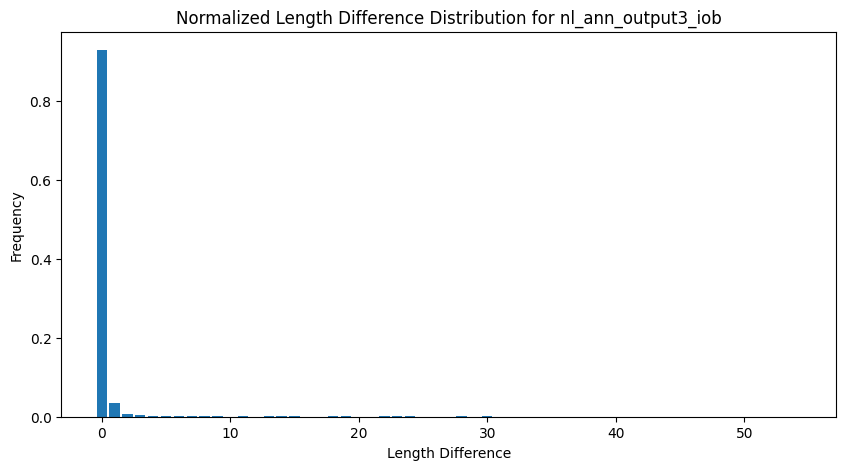

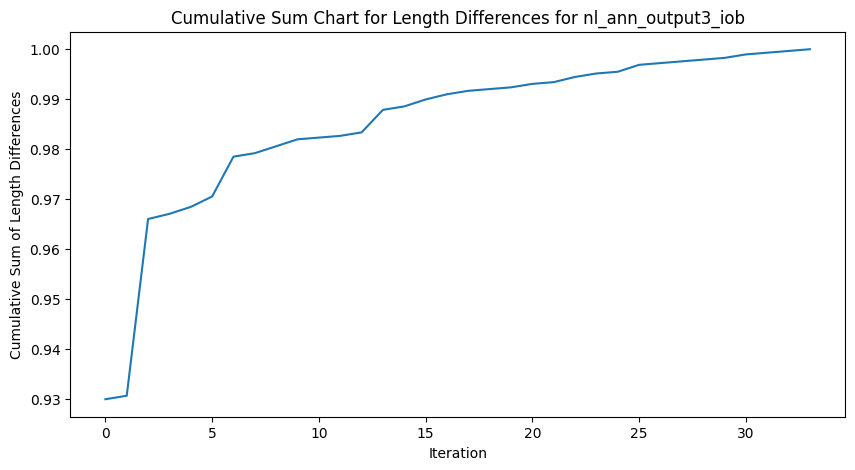

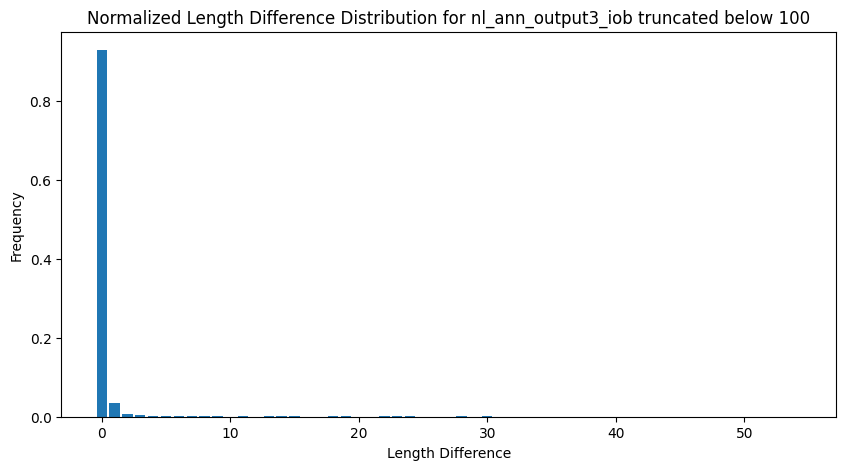

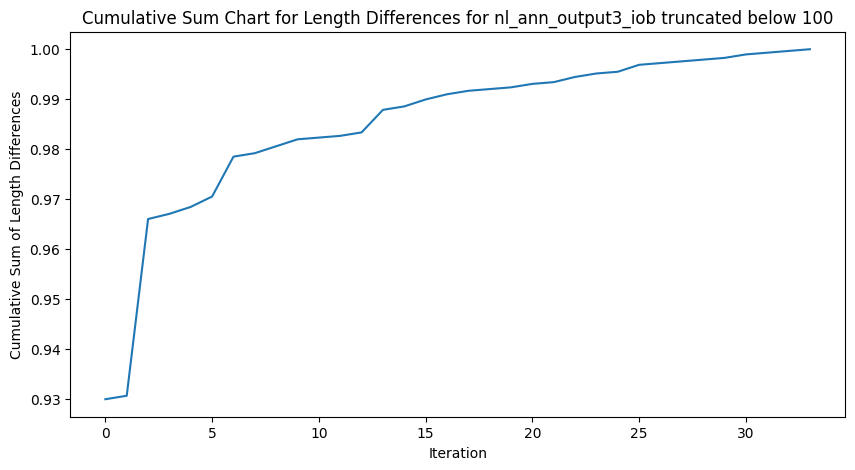

Mean difference for nl_nes_output3_iob, q=None: 0.32523429364803885
Median of the difference for nl_nes_output3_iob, q=None: 0.0


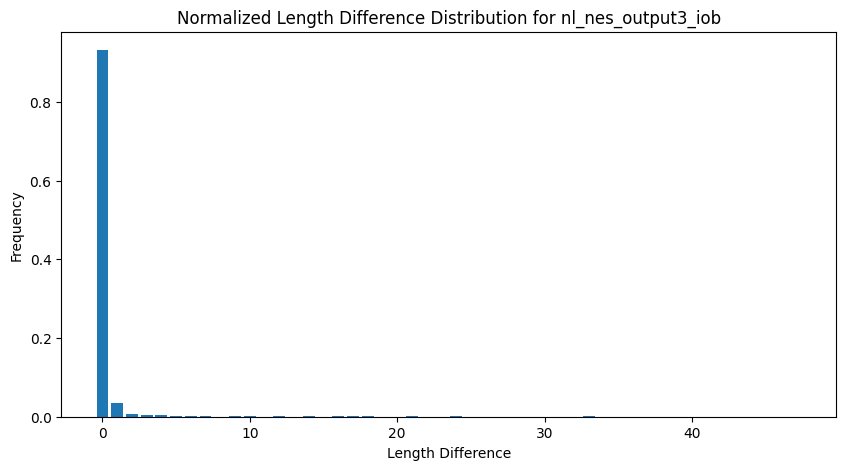

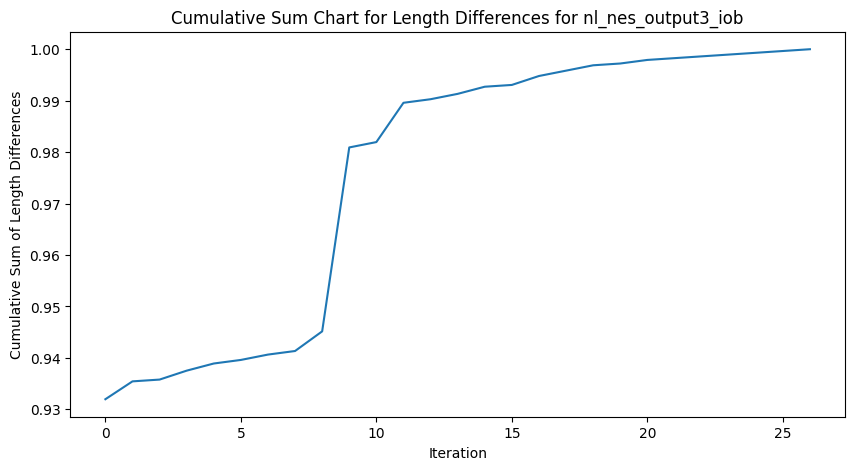

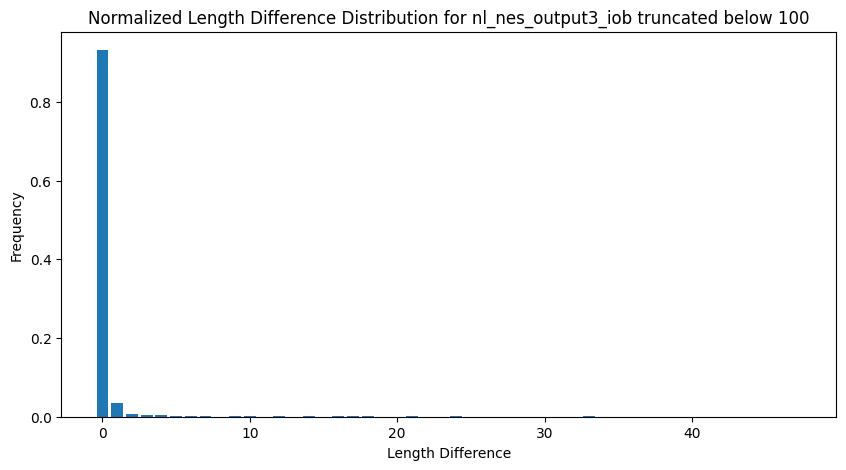

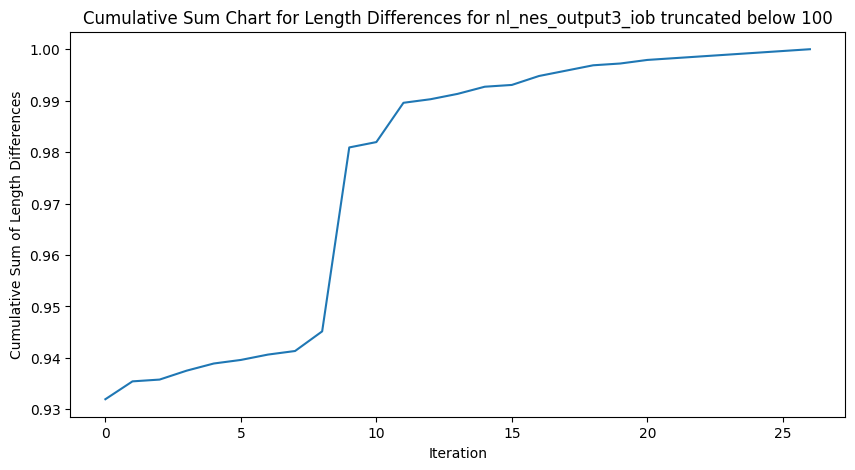

Mean difference for nl_ann_output1, q=0.25: 2.4890965732087227
Median of the difference for nl_ann_output1, q=0.25: 1.0


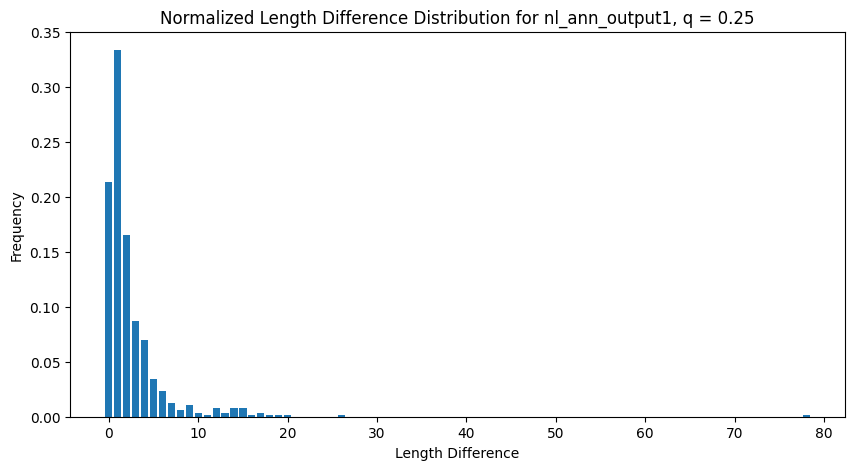

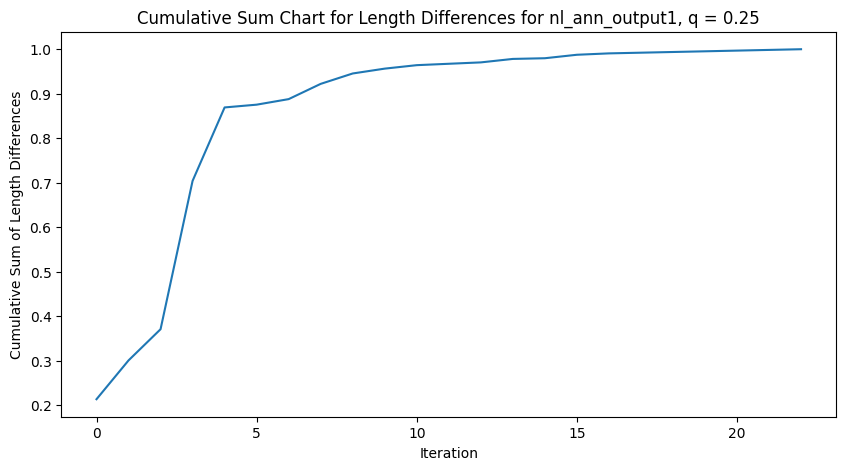

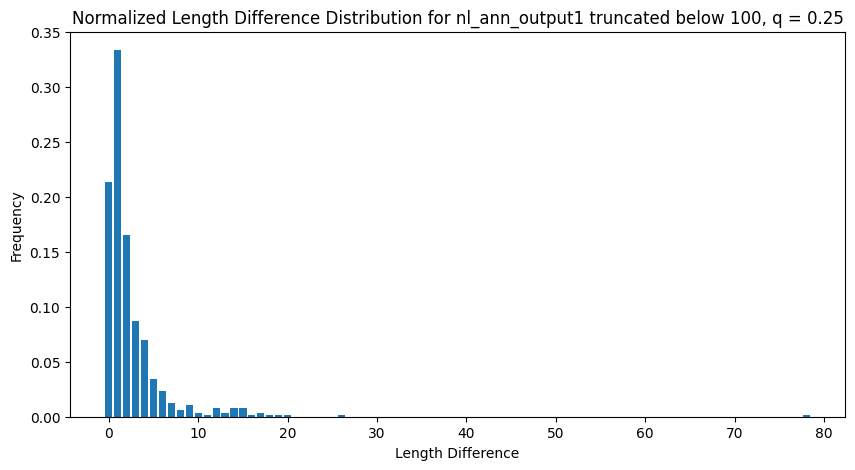

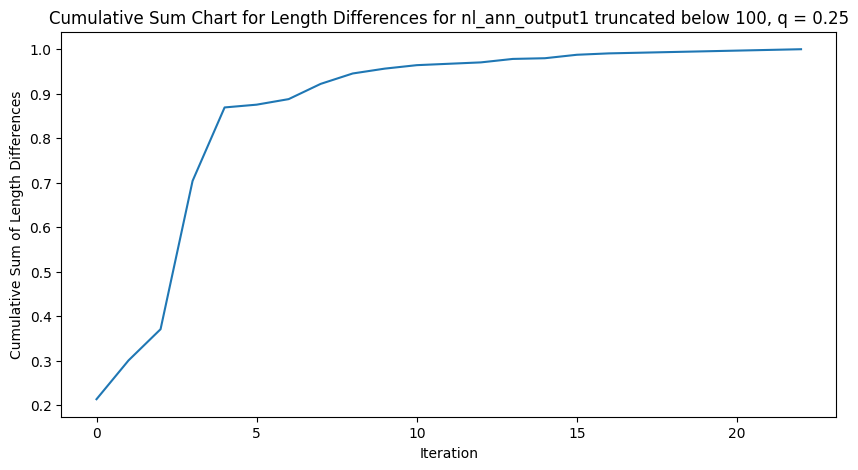

Mean difference for nl_nes_output1, q=0.25: 2.4423676012461057
Median of the difference for nl_nes_output1, q=0.25: 1.0


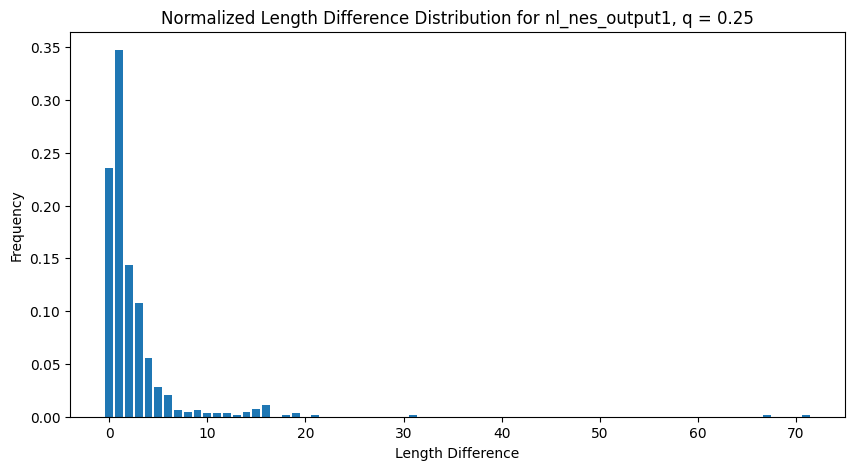

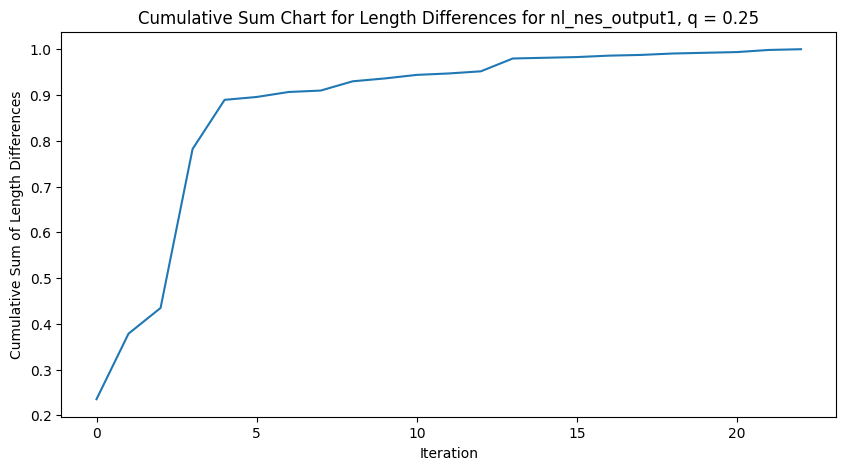

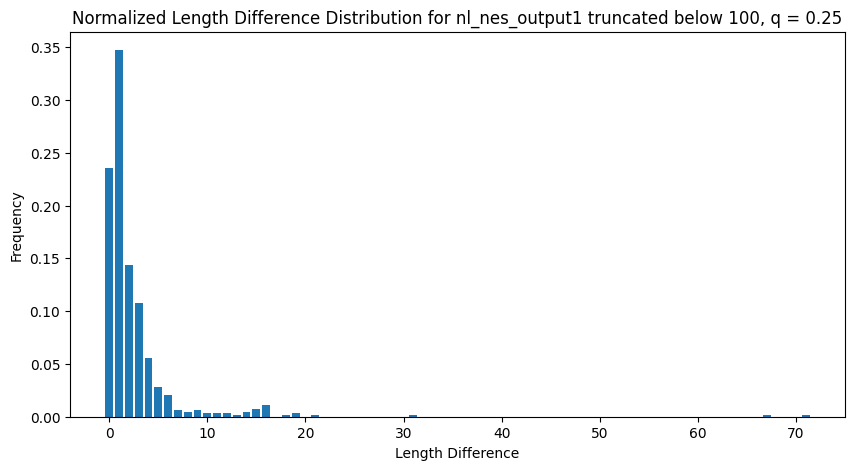

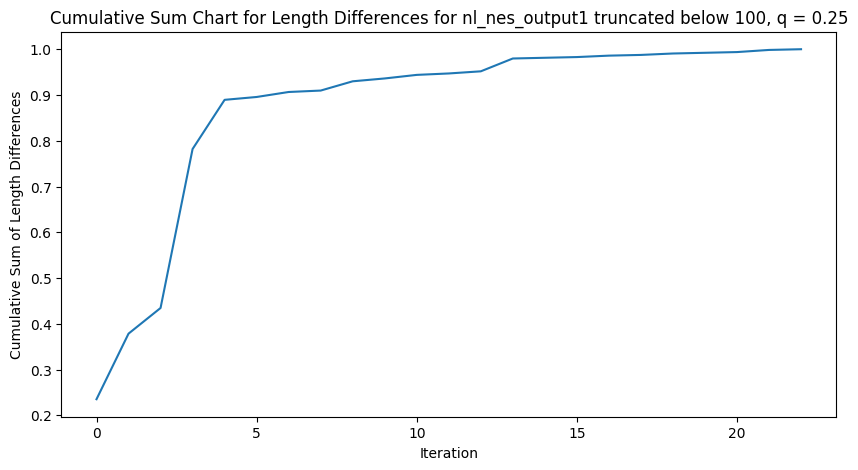

Mean difference for nl_ann_output3_iob, q=0.25: 0.3302180685358255
Median of the difference for nl_ann_output3_iob, q=0.25: 0.0


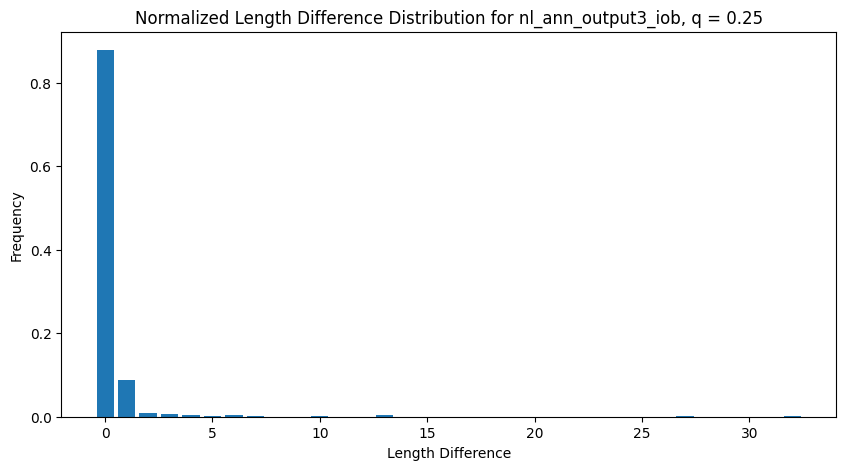

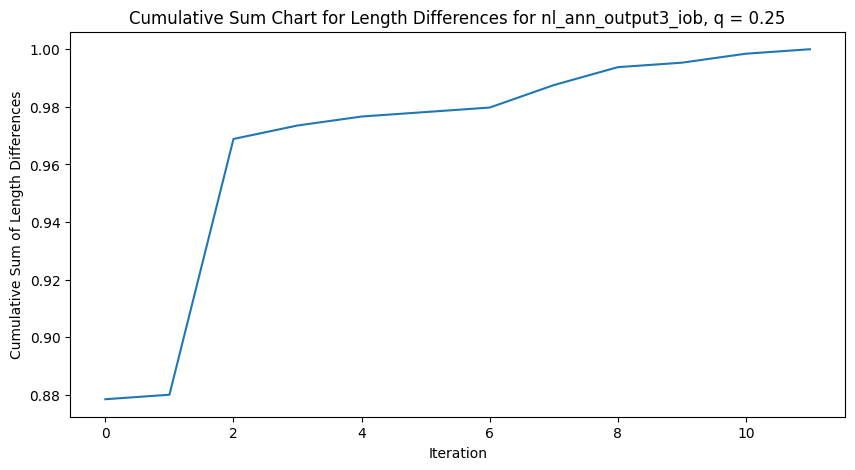

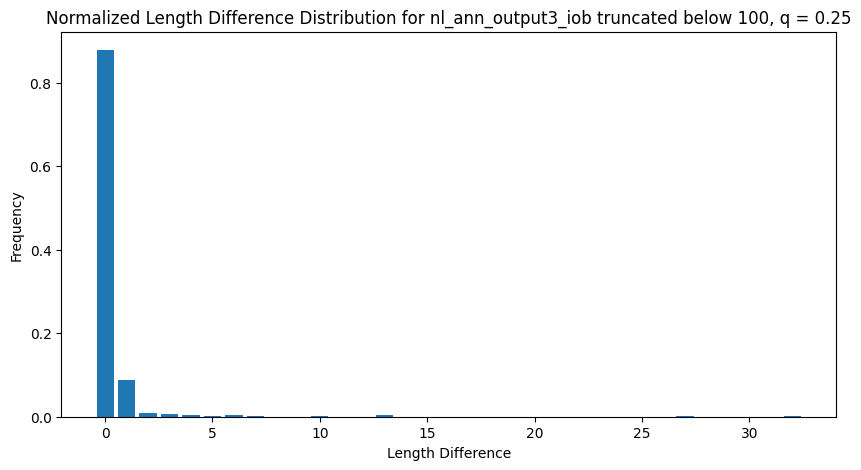

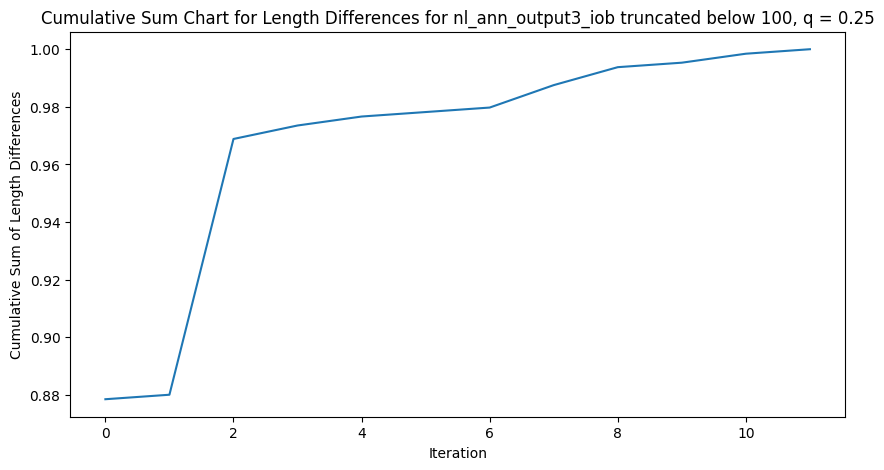

Mean difference for nl_nes_output3_iob, q=0.25: 0.3894080996884735
Median of the difference for nl_nes_output3_iob, q=0.25: 0.0


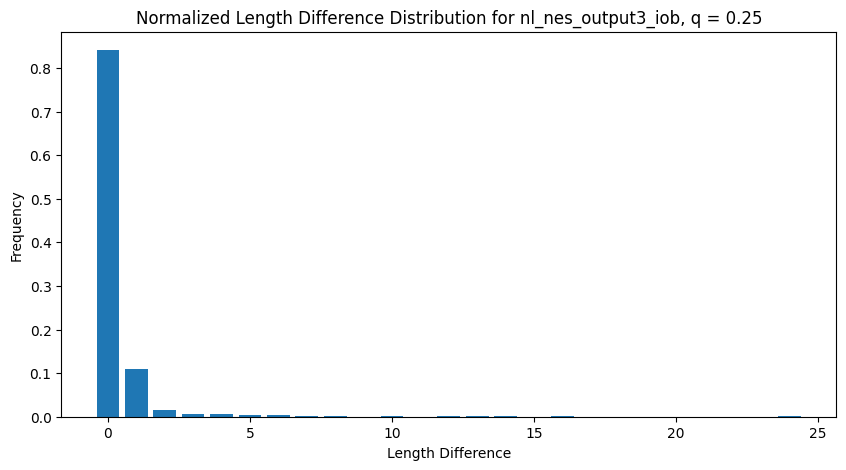

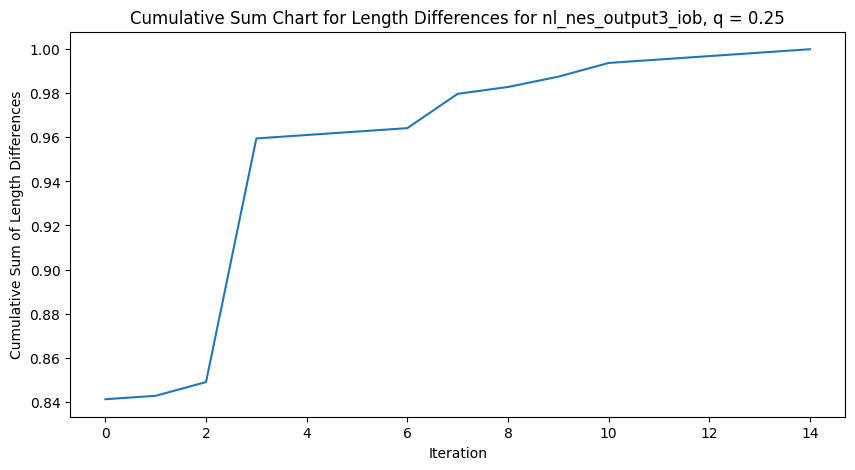

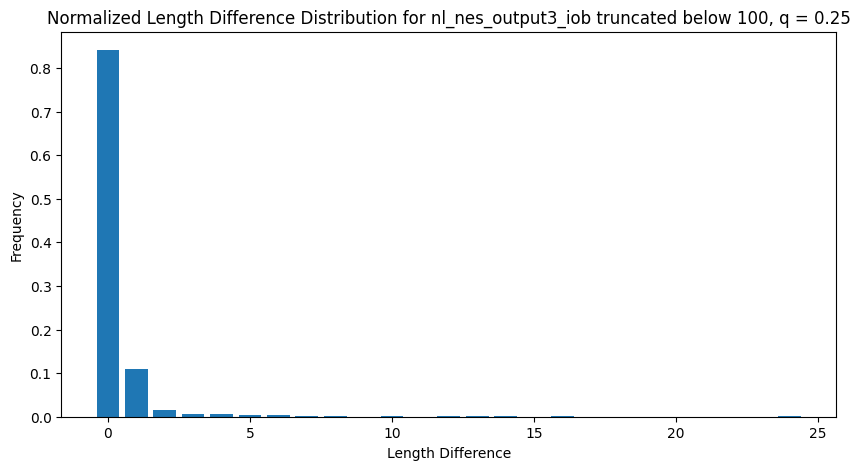

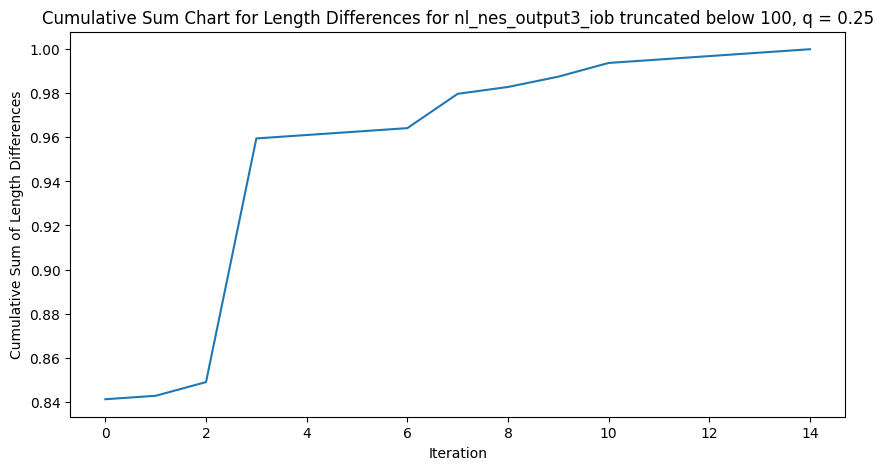

Mean difference for nl_ann_output1, q=0.5: 3.1125
Median of the difference for nl_ann_output1, q=0.5: 2.0


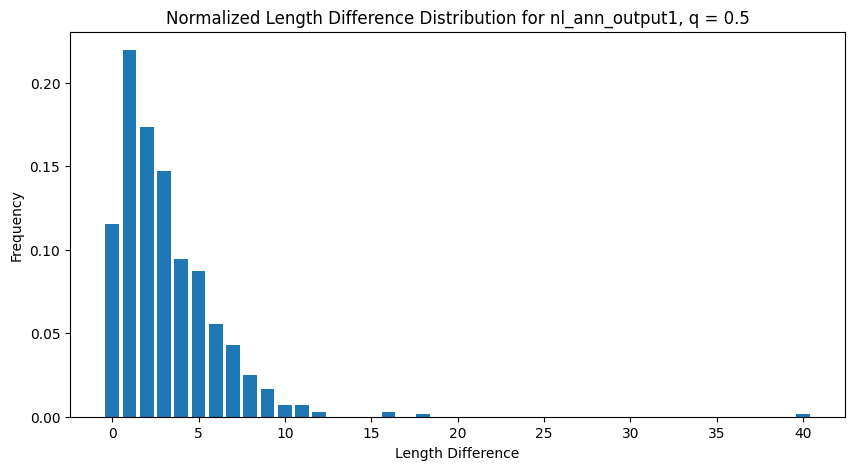

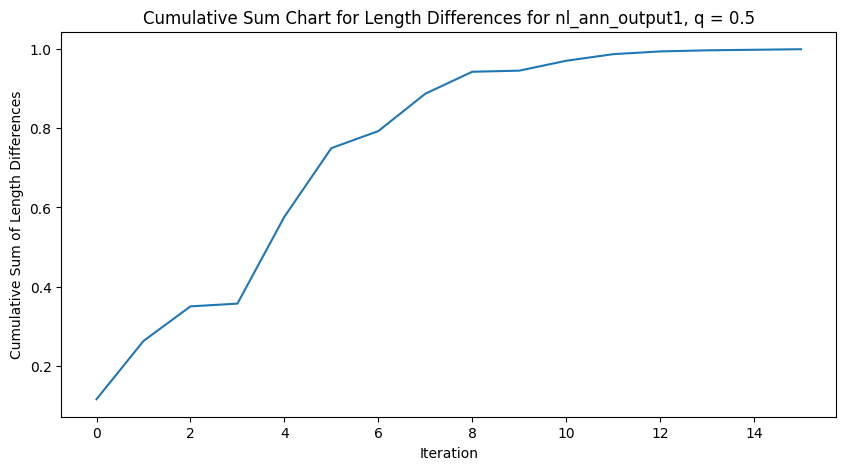

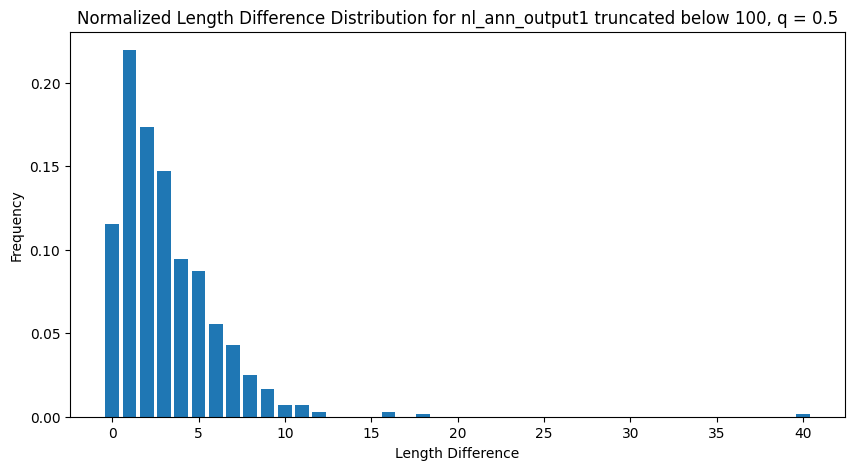

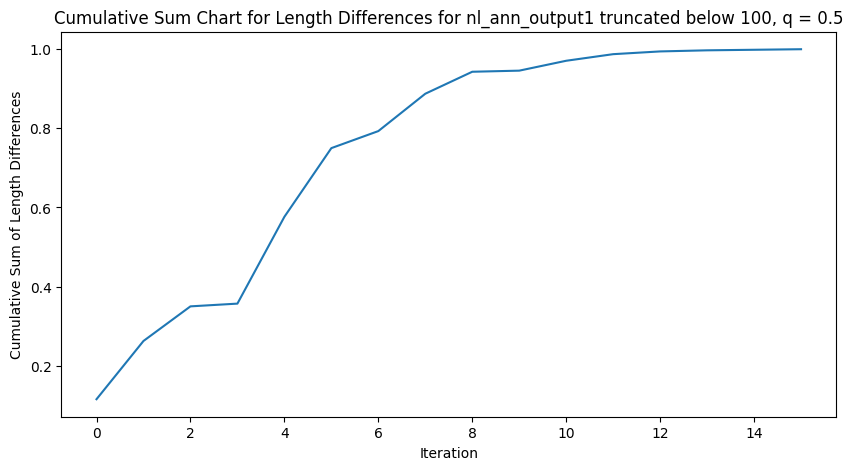

Mean difference for nl_nes_output1, q=0.5: 3.3694444444444445
Median of the difference for nl_nes_output1, q=0.5: 3.0


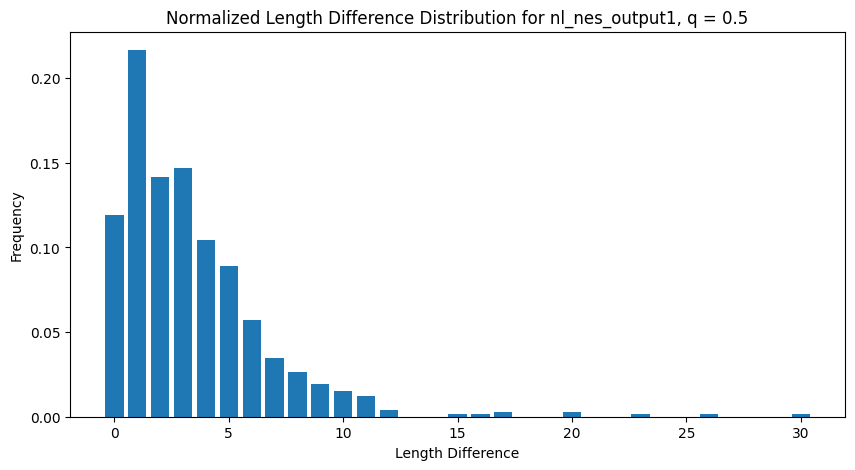

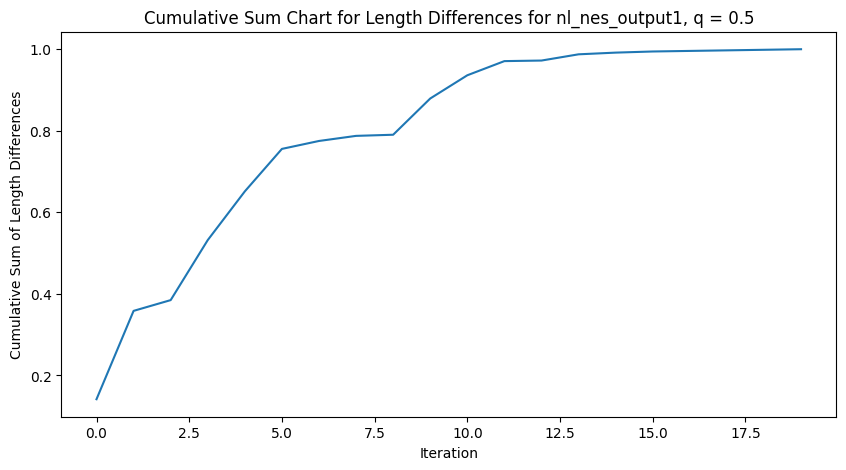

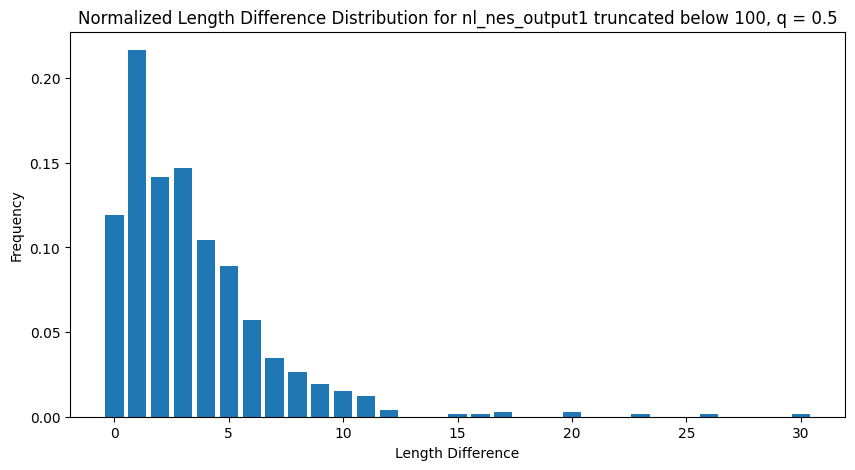

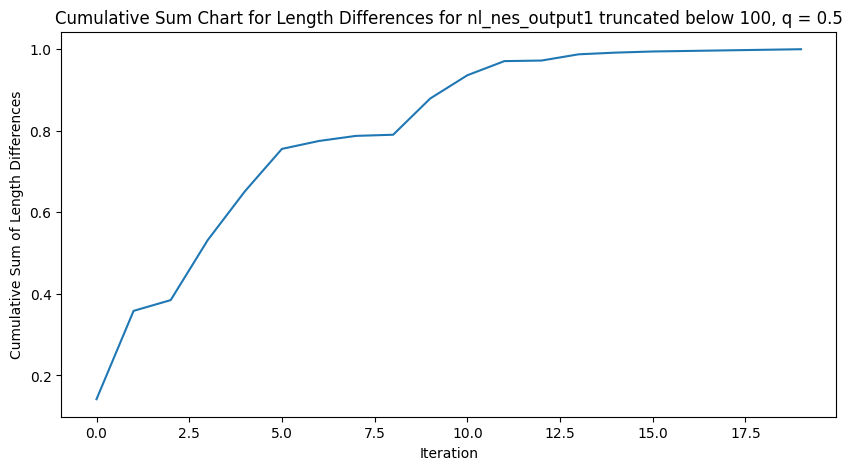

Mean difference for nl_ann_output3_iob, q=0.5: 0.20277777777777778
Median of the difference for nl_ann_output3_iob, q=0.5: 0.0


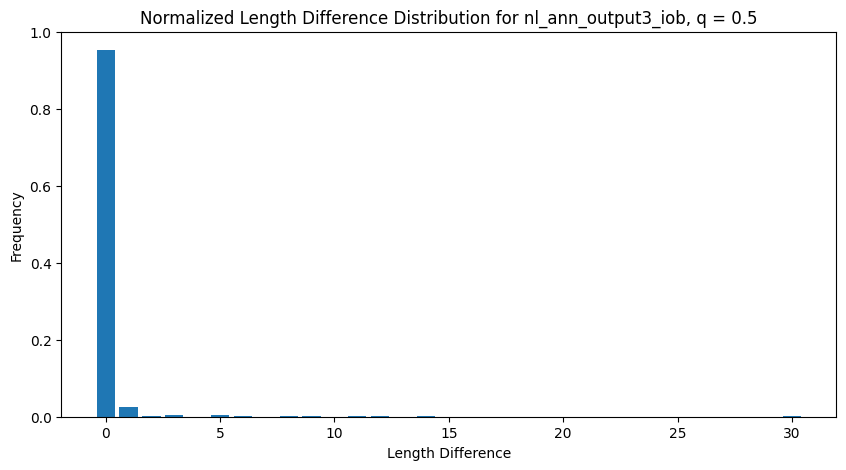

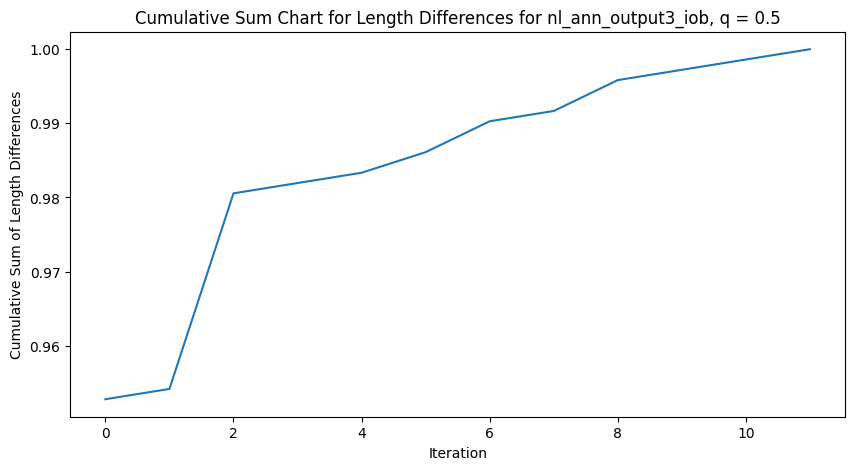

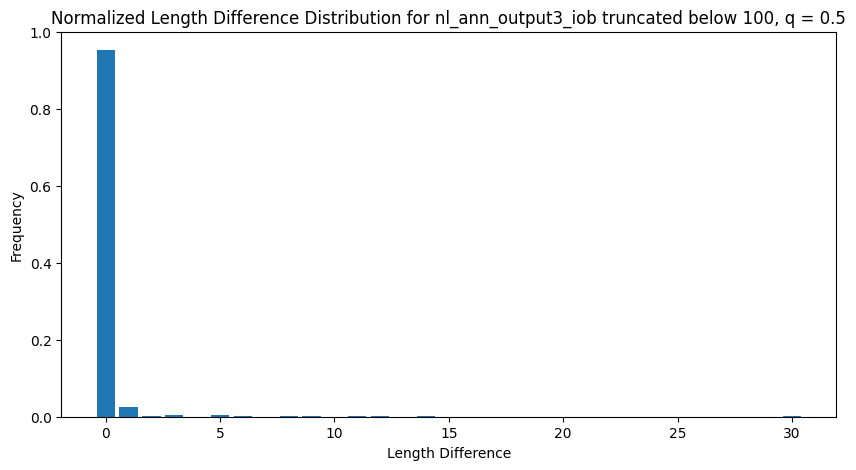

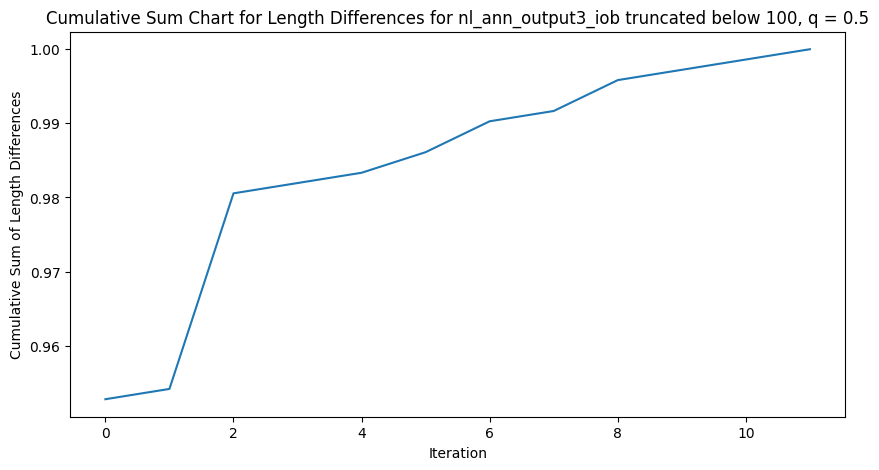

Mean difference for nl_nes_output3_iob, q=0.5: 0.22083333333333333
Median of the difference for nl_nes_output3_iob, q=0.5: 0.0


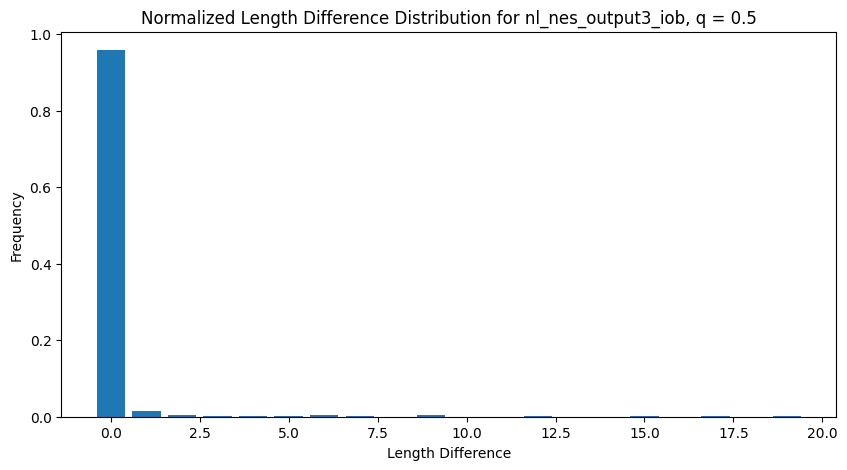

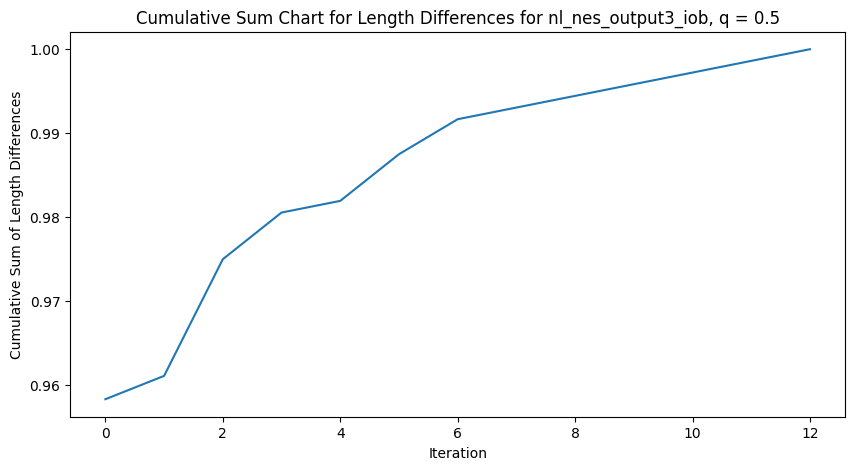

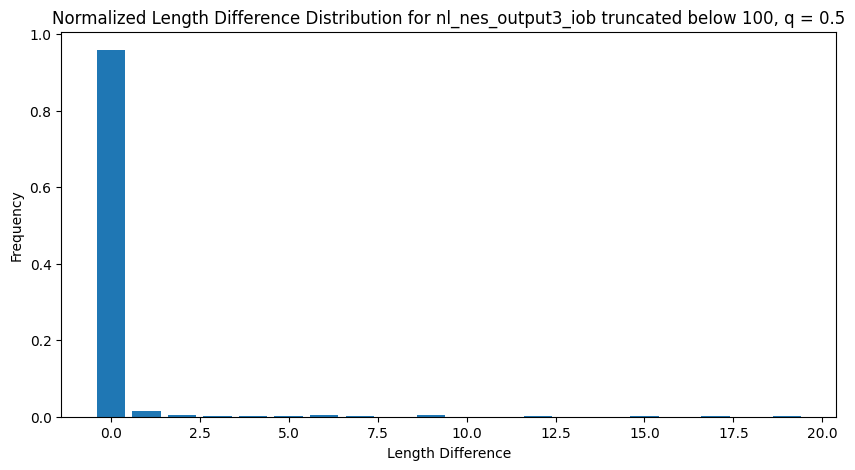

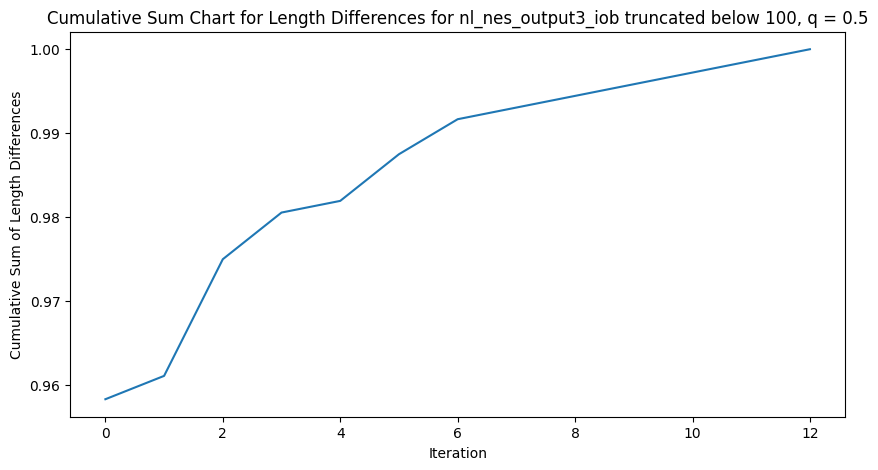

Mean difference for nl_ann_output1, q=0.75: 4.123119015047879
Median of the difference for nl_ann_output1, q=0.75: 3.0


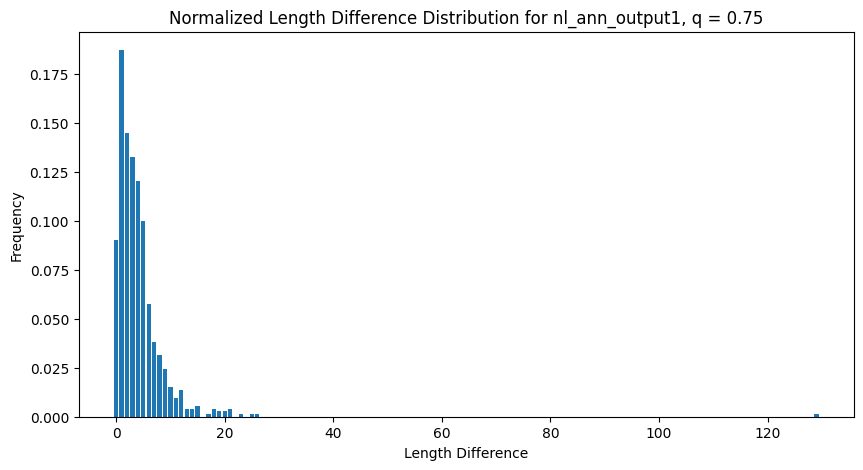

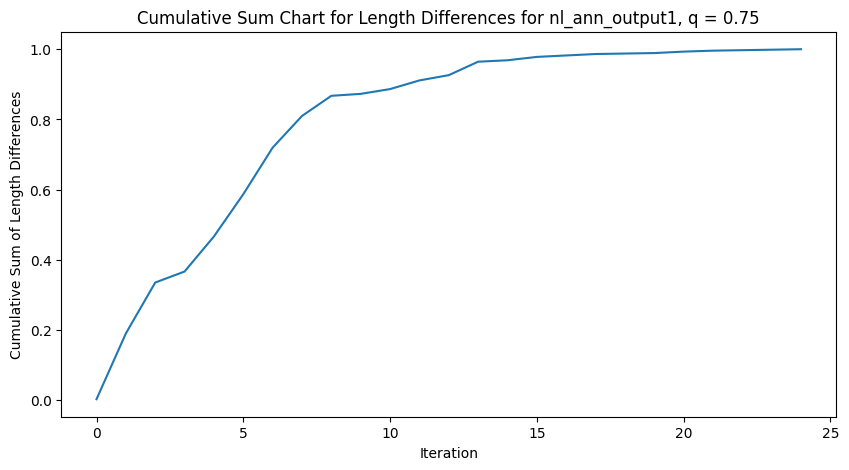

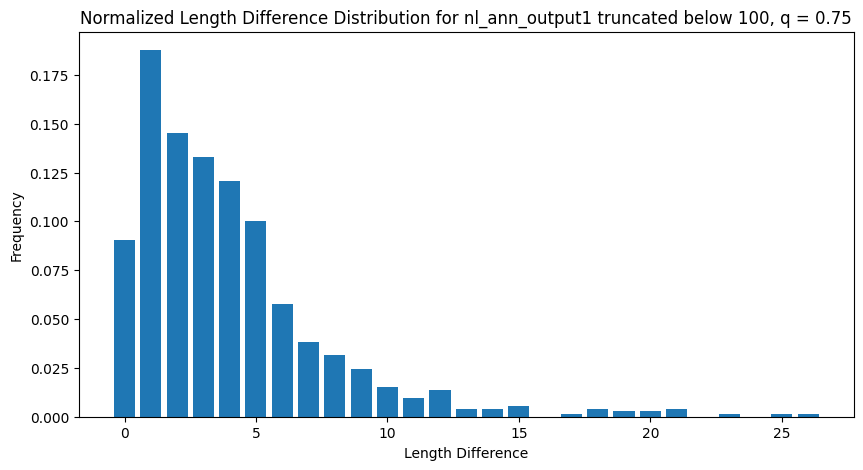

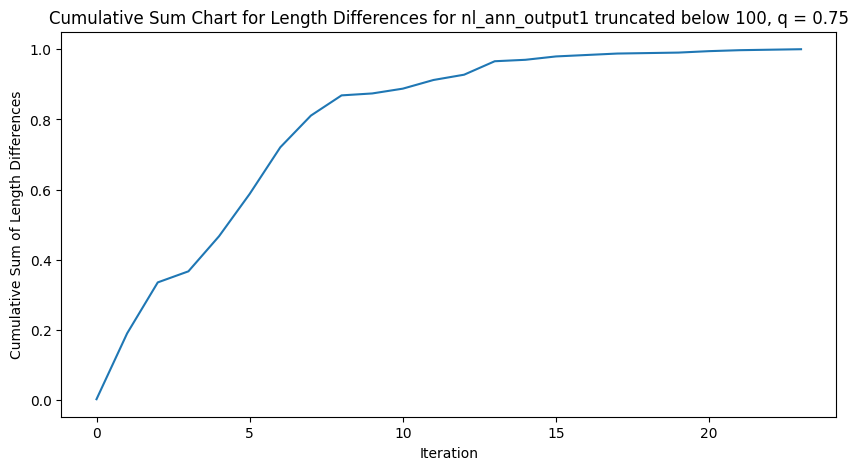

Mean difference for nl_nes_output1, q=0.75: 4.376196990424076
Median of the difference for nl_nes_output1, q=0.75: 3.0


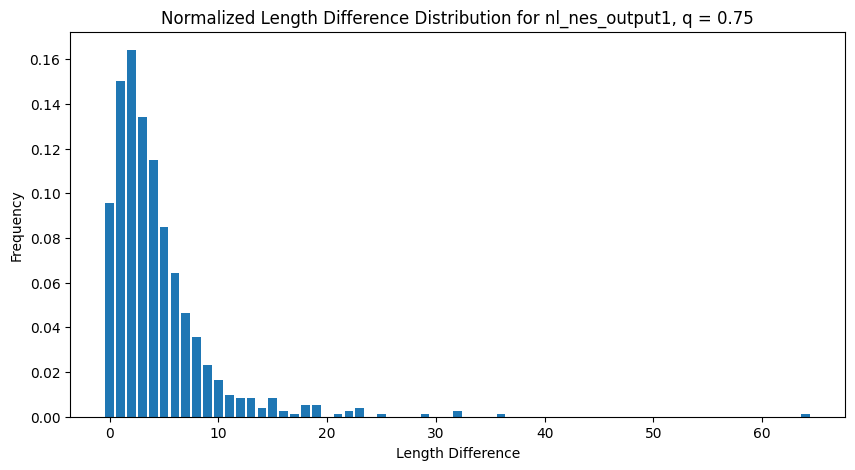

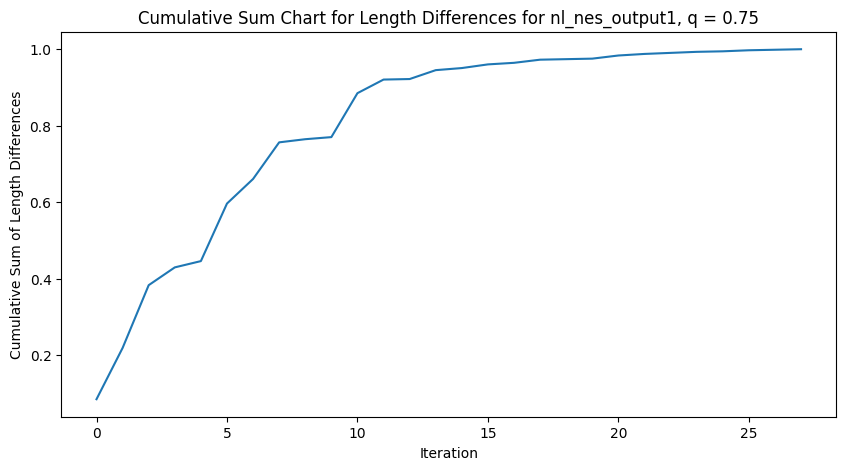

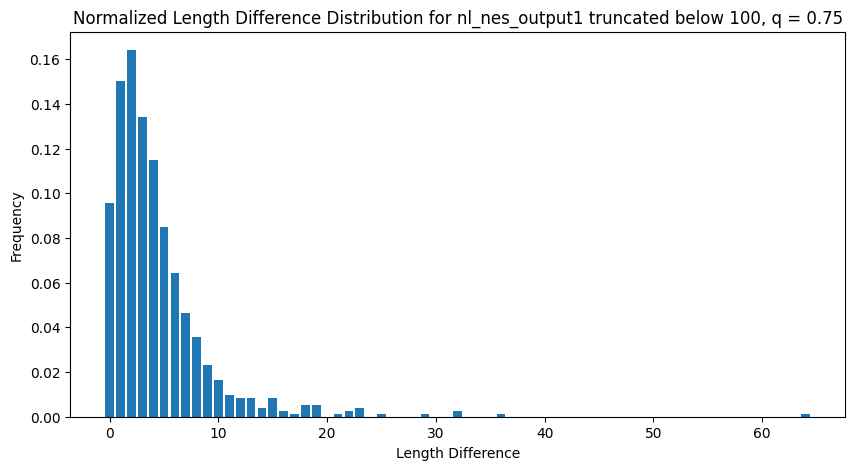

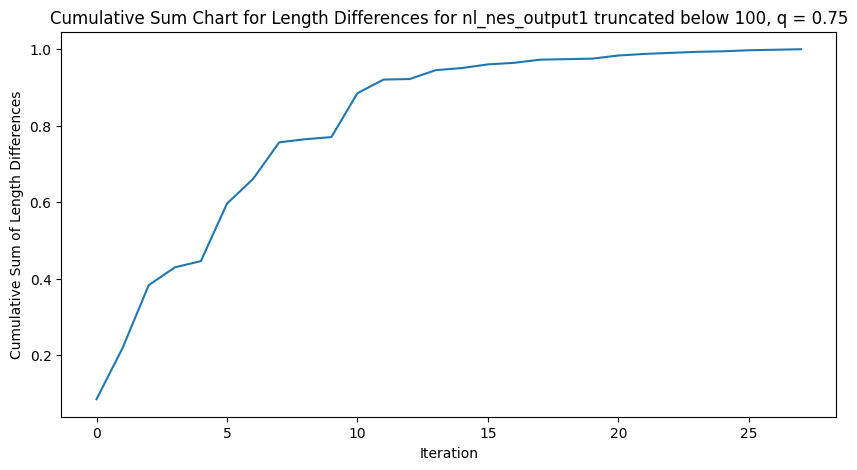

Mean difference for nl_ann_output3_iob, q=0.75: 0.4897400820793434
Median of the difference for nl_ann_output3_iob, q=0.75: 0.0


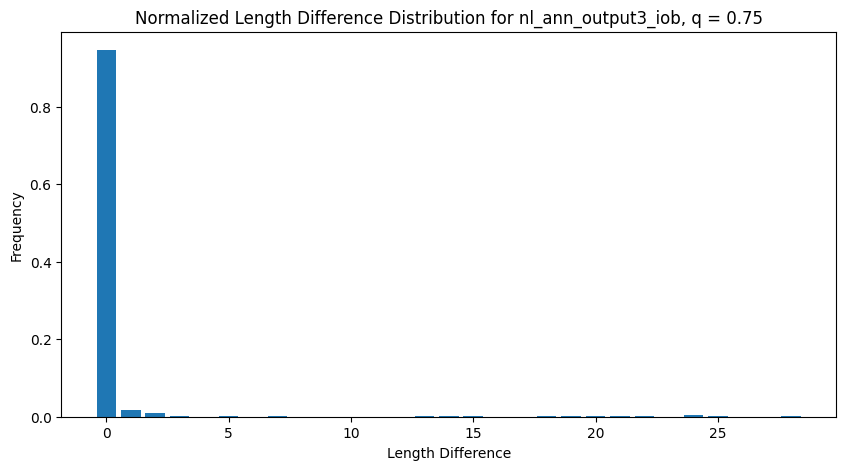

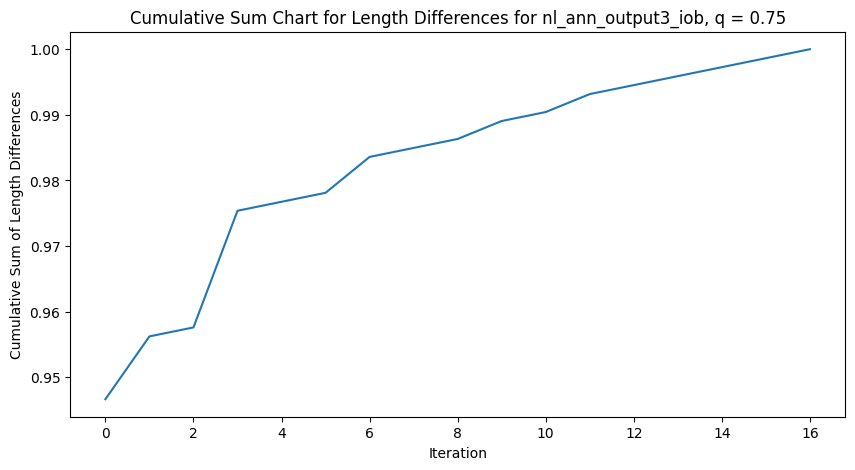

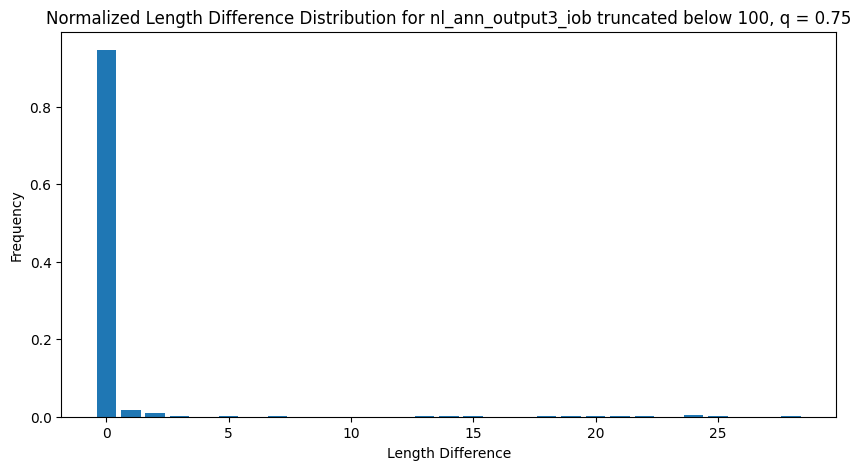

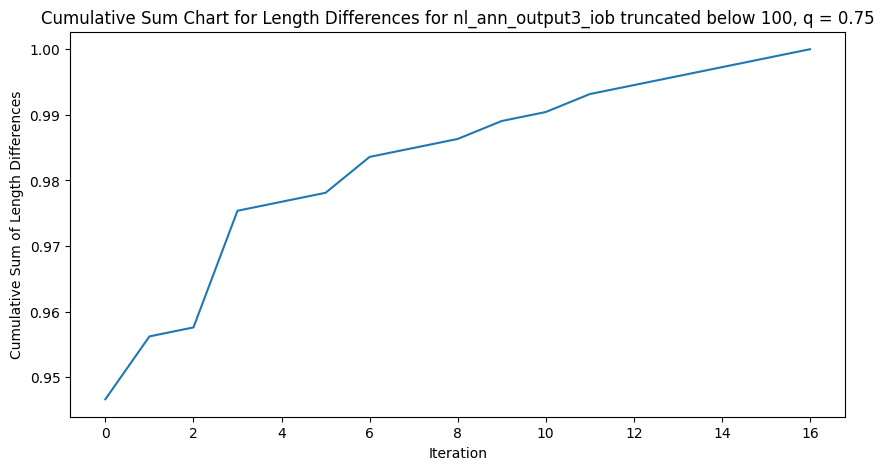

Mean difference for nl_nes_output3_iob, q=0.75: 0.21203830369357046
Median of the difference for nl_nes_output3_iob, q=0.75: 0.0


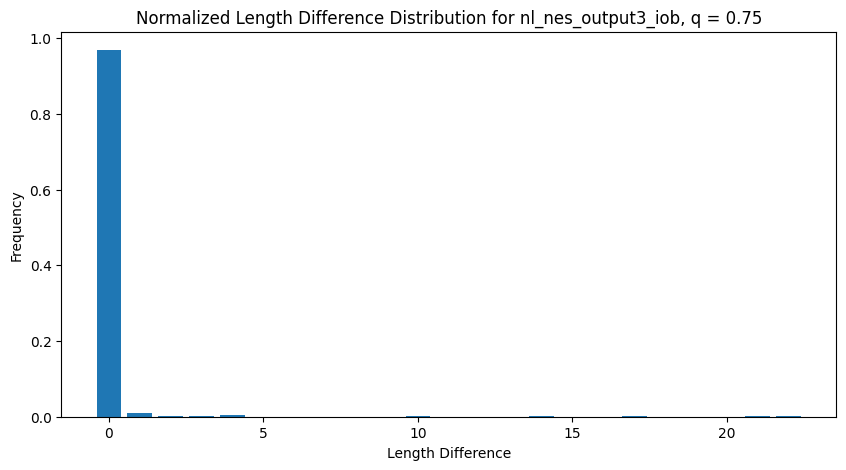

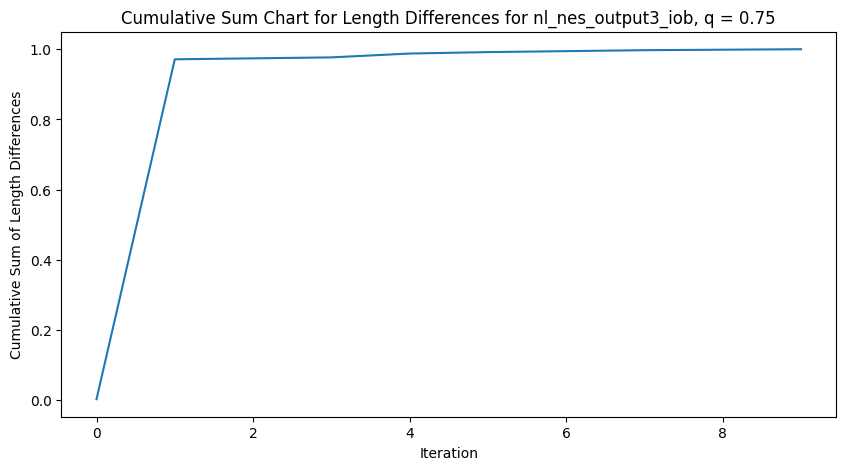

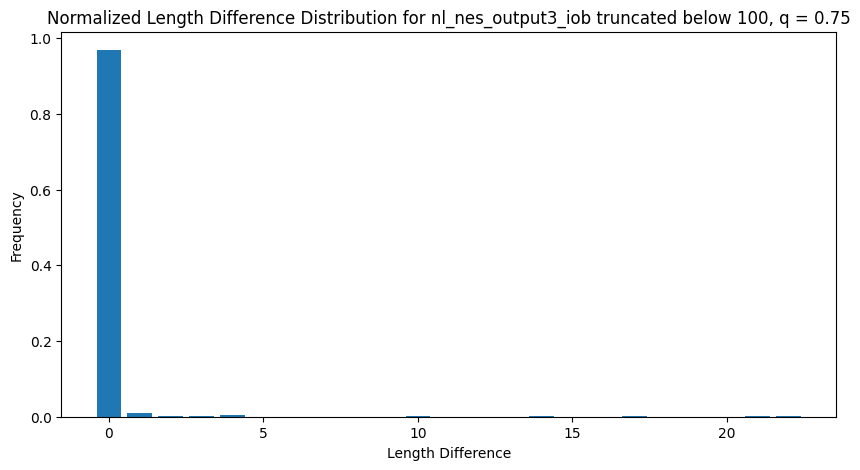

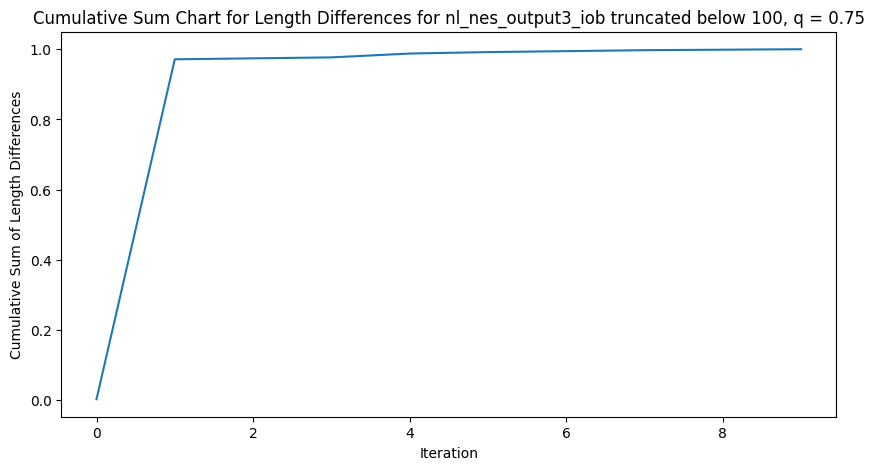

Mean difference for nl_ann_output1, q=1: 11.490470139771283
Median of the difference for nl_ann_output1, q=1: 5.0


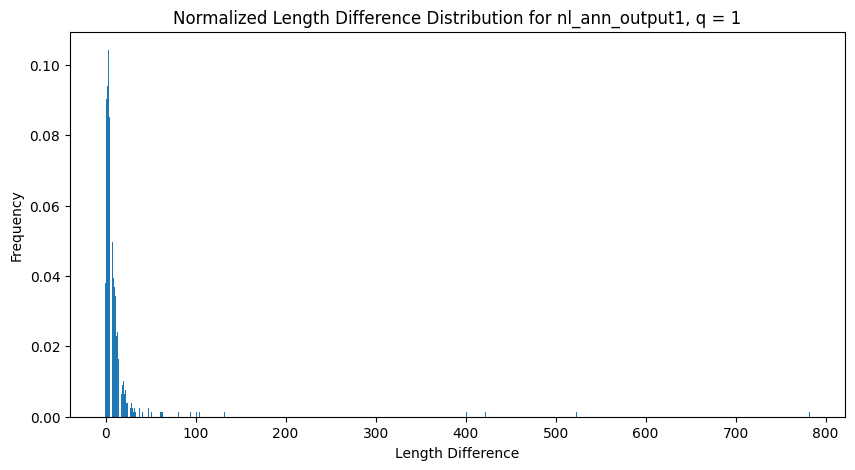

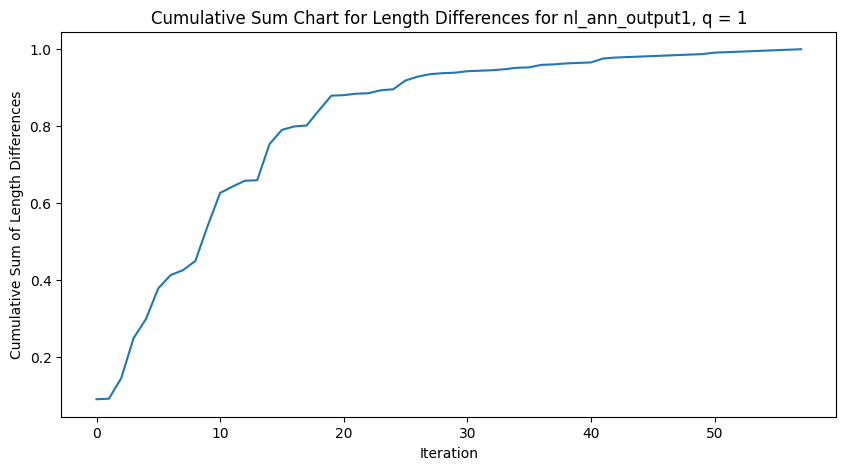

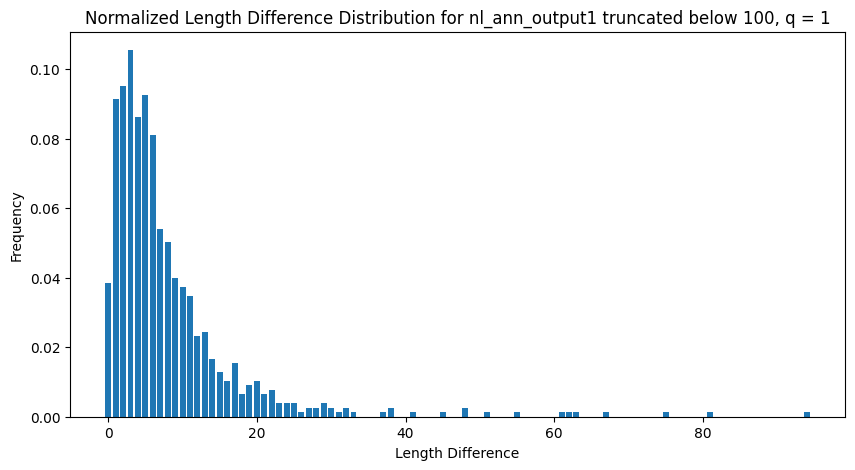

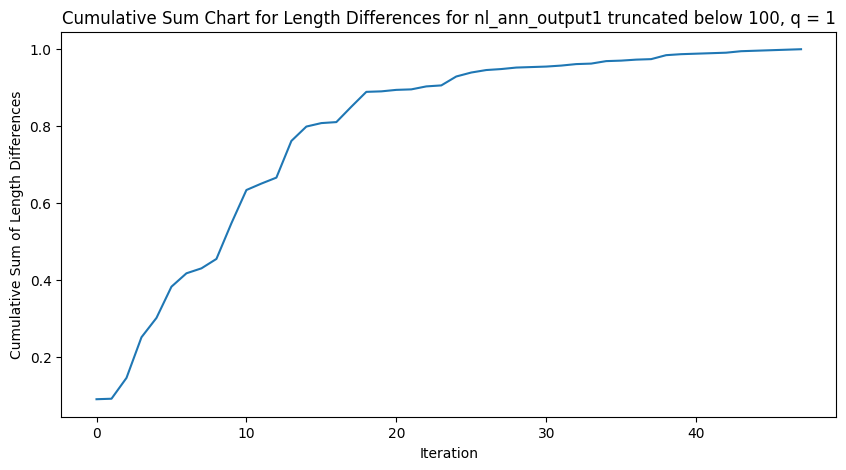

Mean difference for nl_nes_output1, q=1: 10.501905972045744
Median of the difference for nl_nes_output1, q=1: 5.0


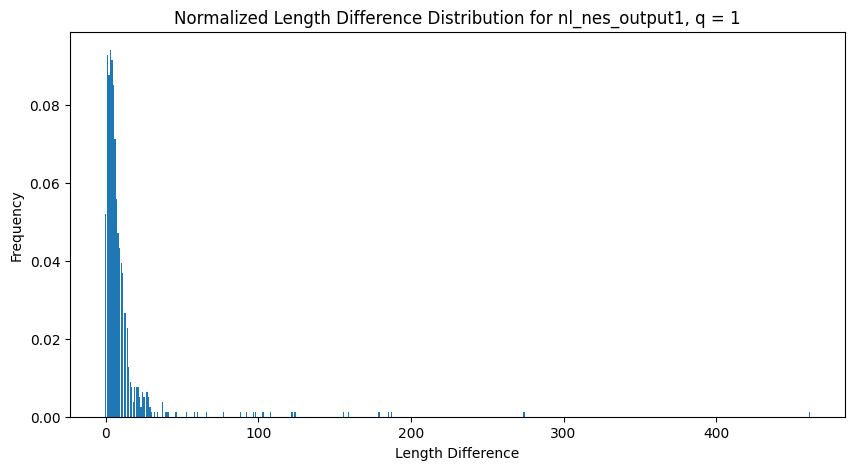

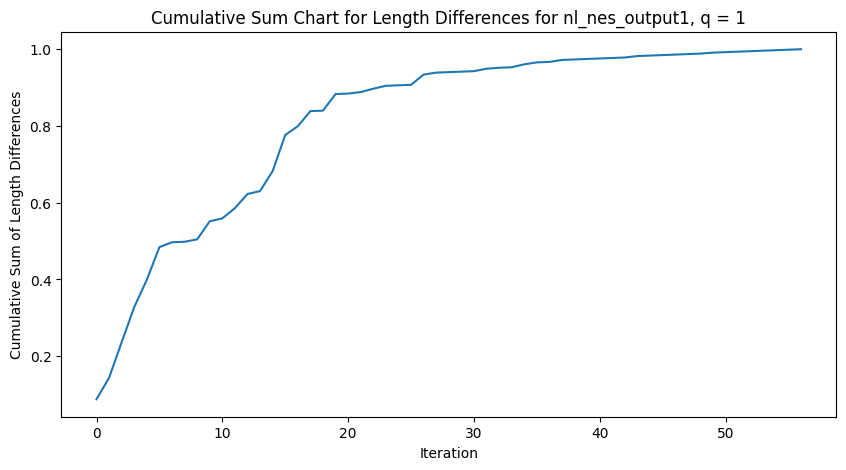

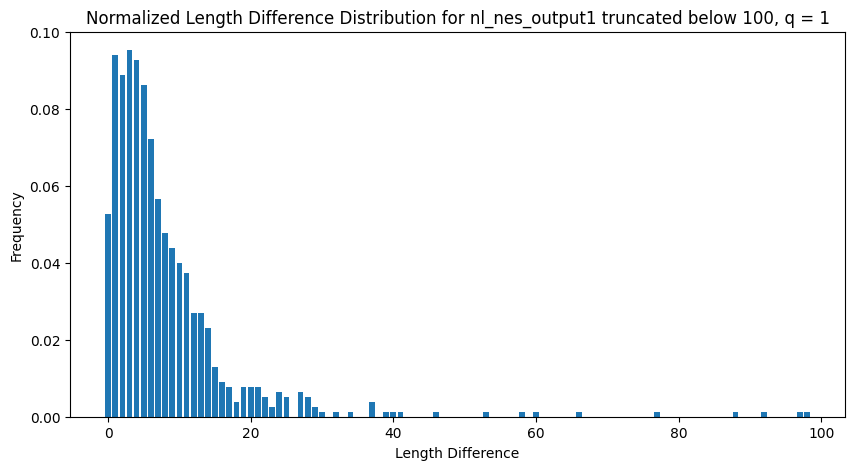

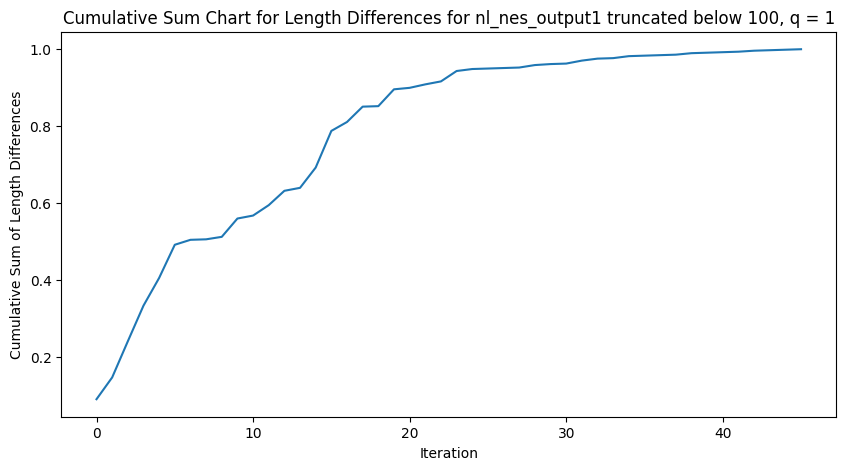

Mean difference for nl_ann_output3_iob, q=1: 0.7001270648030495
Median of the difference for nl_ann_output3_iob, q=1: 0.0


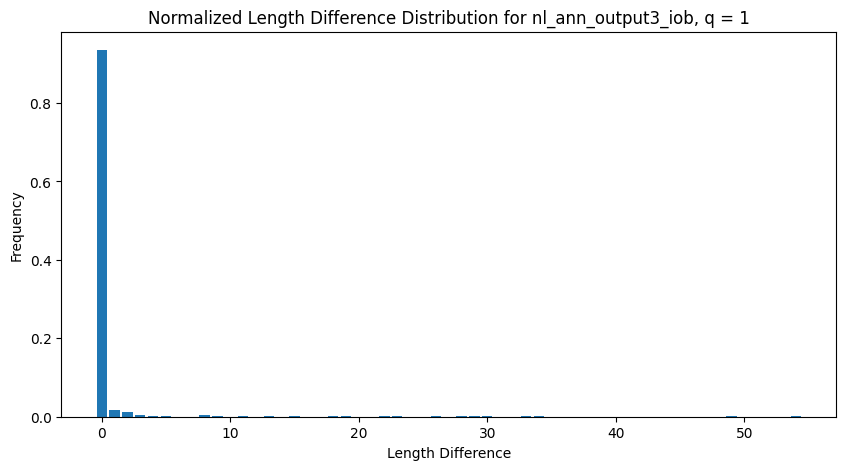

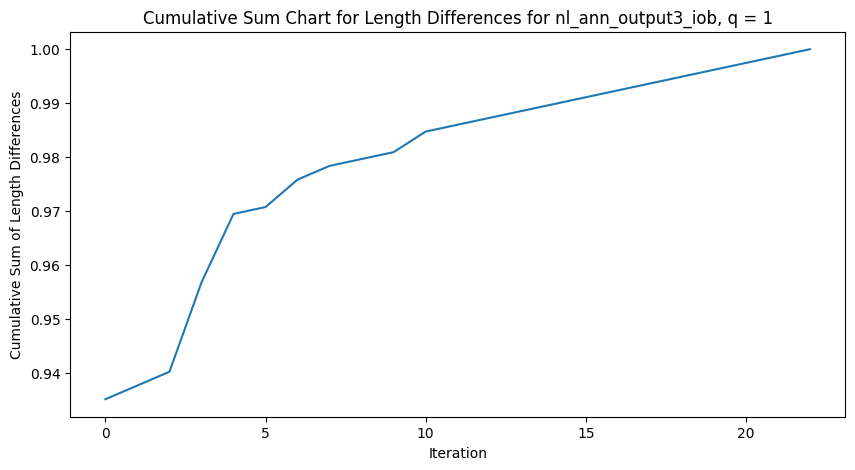

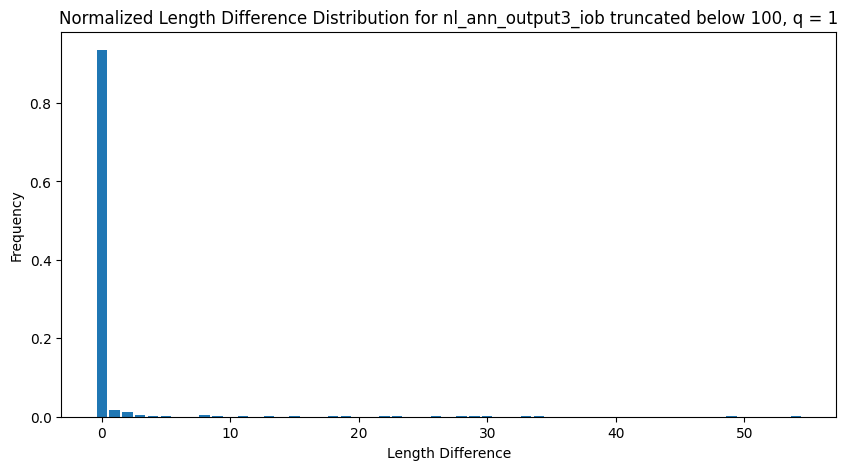

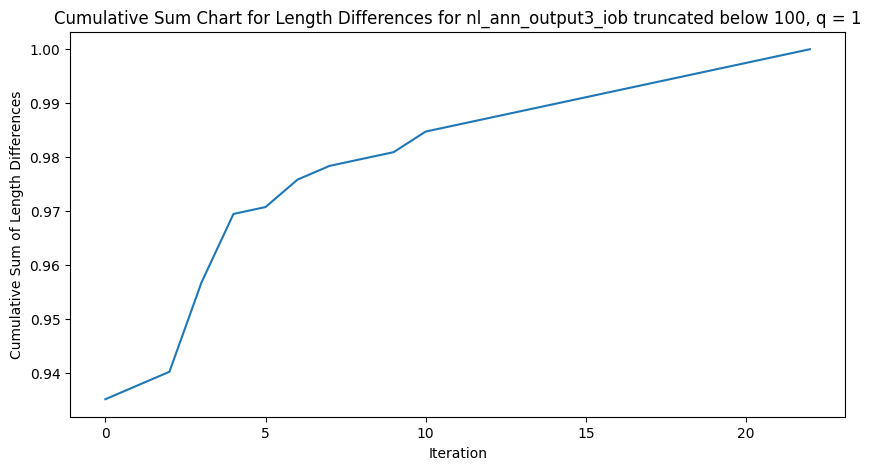

Mean difference for nl_nes_output3_iob, q=1: 0.47395171537484115
Median of the difference for nl_nes_output3_iob, q=1: 0.0


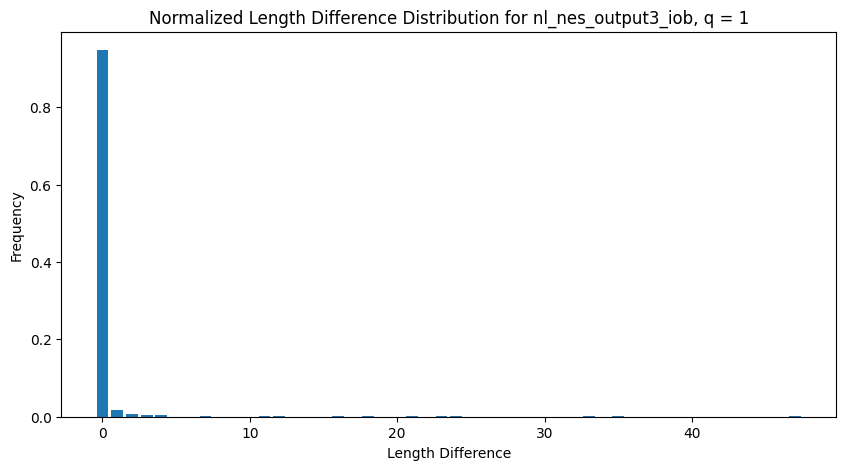

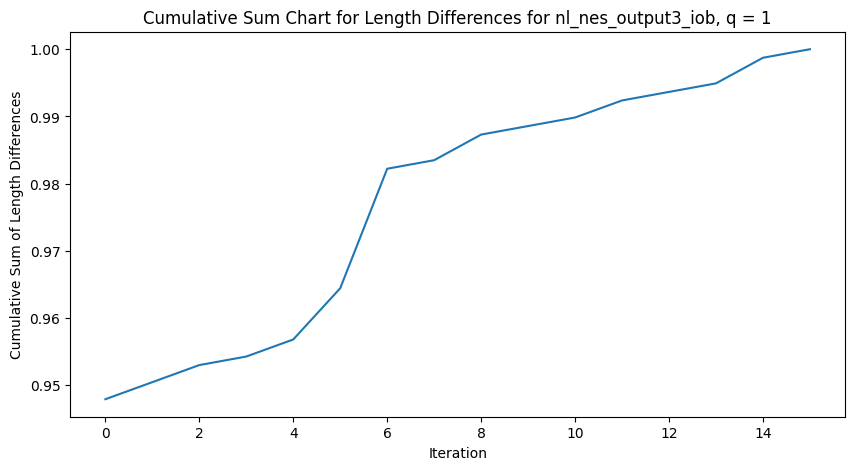

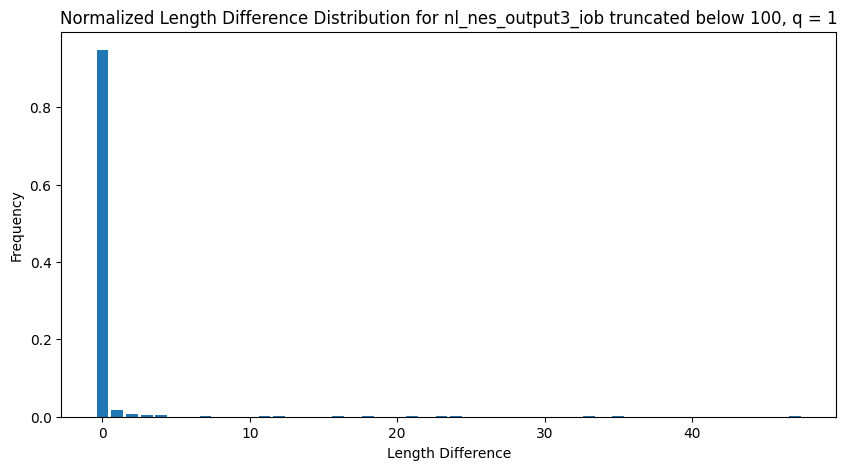

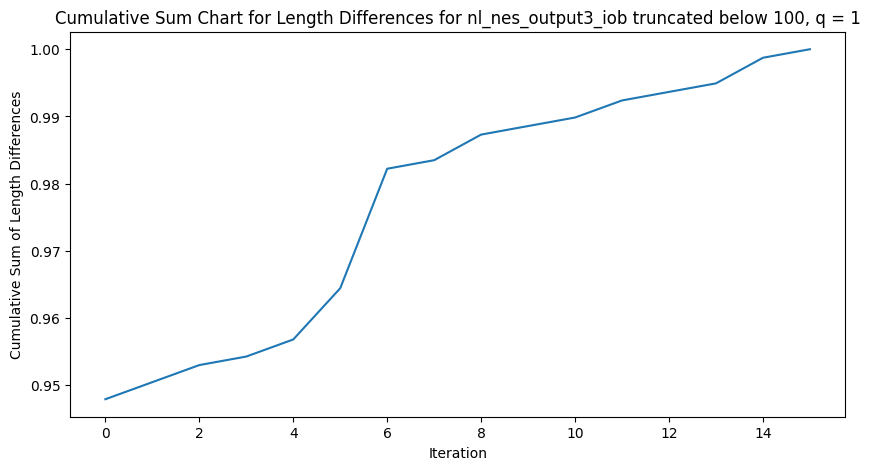

In [142]:
ground_truth_key_names = ["ann", "nes", "ann", "nes", "ann", "nes"]
quantiles = [None, 0.25, 0.5, 0.75, 1]
for lang in langs:
    for quantile in quantiles:
        df = dataframes[lang]
        pred_key_names = [f"{lang}_ann_output1", f"{lang}_nes_output1", f"{lang}_ann_output3_iob",f"{lang}_nes_output3_iob"]
        for ground_truth_key_name, pred_key_name in zip(ground_truth_key_names, pred_key_names):
            df = dataframes[lang]
            if quantile:
                df = create_df_quantile(dataframes, lang, quantile=quantile)
            total_len = len(df["words"])
            len_diff = []
            for i in range(total_len):
                len_diff.append(abs(len(df[ground_truth_key_name][i]) - len(df[pred_key_name][i])))
            len_diff_below_100 = [diff for diff in len_diff if diff < 100]
            print(f"Mean difference for {pred_key_name}, q={quantile}: {np.mean(len_diff)}")
            print(f"Median of the difference for {pred_key_name}, q={quantile}: {np.median(len_diff)}")
            print_len_diff_distribution(len_diff, pred_key_name, quantile)
            print_len_diff_distribution(len_diff_below_100, pred_key_name + " truncated below 100", quantile)

## Error comparison between IOB formats and ground truth

In [117]:
# ALWAYS TAKING THE LONGEST SEQUENCE
ground_truth_key_names = ["ann", "nes", "ann", "nes", "ann", "nes"]

def get_scores(dataframes, lang, quantile=None):
    pred_key_names = [f"{lang}_ann_output1", f"{lang}_nes_output1", f"{lang}_ann_output3_iob",f"{lang}_nes_output3_iob"]
    acc_scores = {}
    recall_scores = {}
    precision_scores = {}
    print(f"_____________________{lang}: {quantile}_____________________")
    for ground_truth_key_name, pred_key_name in zip(ground_truth_key_names, pred_key_names):
        df = dataframes[lang]
        if quantile:
            seq_lengths = []
            #pred_seq_lengths = []
            for i in range(len(dataframes[lang][ground_truth_key_name].tolist())):
                seq_lengths.append(len(dataframes[lang][ground_truth_key_name][i]))
            df = dataframes[lang][dataframes[lang][ground_truth_key_name].str.len() < np.quantile(seq_lengths, quantile)]
            quantile_low = quantile-0.25
            if quantile_low > 0:
                df_low = dataframes[lang][dataframes[lang][ground_truth_key_name].str.len() < np.quantile(seq_lengths, quantile_low)]
                df = df.drop(df_low.index)
            df = df.reset_index(drop=True)
        total_len = len(df["words"])
        acc_score = []
        recall_score = []
        precision_score = []
        for i in range(total_len):
            if len(df[ground_truth_key_name][i]) < len(df[pred_key_name][i]):
                ext_truth = df[ground_truth_key_name][i] + [0]*(len(df[pred_key_name][i]) - len(df[ground_truth_key_name][i]))
                ext_preds = df[pred_key_name][i]
            elif len(df[ground_truth_key_name][i]) > len(df[pred_key_name][i]):
                ext_preds = df[pred_key_name][i] + [0]*(len(df[ground_truth_key_name][i]) - len(df[pred_key_name][i]))
                ext_truth = df[ground_truth_key_name][i]
            else:
                ext_preds = df[pred_key_name][i]
                ext_truth = df[ground_truth_key_name][i]
            assert len(ext_preds) == len(ext_truth)
            acc_score.append(metrics.accuracy_score(ext_truth, ext_preds))
            recall_score.append(metrics.recall_score(ext_truth, ext_preds, average="macro"))
            precision_score.append(metrics.precision_score(ext_truth, ext_preds, average="macro"))
        acc_scores[pred_key_name] = sum(acc_score) / total_len
        recall_scores[pred_key_name] = sum(recall_score) / total_len
        precision_scores[pred_key_name] = sum(precision_score) / total_len
        print("-------------------------------------")
        print(f"SCORES FOR {pred_key_name}")
        print(".....................................")
        print(f"ACCURACY: {acc_scores[pred_key_name]}")
        print(f"RECALL: {recall_scores[pred_key_name]}")
        print(f"PRECISION: {precision_scores[pred_key_name]}")
        print(f"F1: {2*recall_scores[pred_key_name]*precision_scores[pred_key_name]/(recall_scores[pred_key_name]+precision_scores[pred_key_name])}")

    

    

In [118]:
for lang in langs:
    get_scores(dataframes, lang)

_____________________en: None_____________________
-------------------------------------
SCORES FOR en_ann_output1
.....................................
ACCURACY: 0.4645603118406688
RECALL: 0.2782372402076859
PRECISION: 0.2316754606120646
F1: 0.2528304969886662
-------------------------------------
SCORES FOR en_nes_output1
.....................................
ACCURACY: 0.4734352463518732
RECALL: 0.2854683199982043
PRECISION: 0.25478185249730106
F1: 0.2692535832518959
-------------------------------------
SCORES FOR en_ann_output3_iob
.....................................
ACCURACY: 0.7885581213901718
RECALL: 0.6054549596851743
PRECISION: 0.6562737647013325
F1: 0.6298409445229749
-------------------------------------
SCORES FOR en_nes_output3_iob
.....................................
ACCURACY: 0.7848490697190255
RECALL: 0.6270636634988879
PRECISION: 0.6665872057346542
F1: 0.6462216741942284
_____________________fr: None_____________________
-------------------------------------
SCORES 

# Impact of sequence length

In [119]:
for lang in langs:
    for quantile in [0.25, 0.5, 0.75, 1]:
        get_scores(dataframes, lang, quantile=quantile)

_____________________en: 0.25_____________________
-------------------------------------
SCORES FOR en_ann_output1
.....................................
ACCURACY: 0.5020772203384013
RECALL: 0.42342837689399476
PRECISION: 0.3336986905254681
F1: 0.3732464495885442
-------------------------------------
SCORES FOR en_nes_output1
.....................................
ACCURACY: 0.5742160675350698
RECALL: 0.4694224735348685
PRECISION: 0.41752950900411334
F1: 0.4419579385333769
-------------------------------------
SCORES FOR en_ann_output3_iob
.....................................
ACCURACY: 0.8254235832739618
RECALL: 0.7386685078071632
PRECISION: 0.7518189865295187
F1: 0.7451857342392543
-------------------------------------
SCORES FOR en_nes_output3_iob
.....................................
ACCURACY: 0.8499607693344718
RECALL: 0.7810030072635117
PRECISION: 0.787181229651694
F1: 0.7840799481937464
_____________________en: 0.5_____________________
-------------------------------------
SCORES F